# Early Prediction Of Kidney Disfunction In Diabetes Patients Based On Fasting Blood Sugar and Creatinine Status:

## Downloading and importing necessary libraries: 

In [3]:
#!pip install missingno
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install re
#!pip install seaborn
#!pip install scikit-learn
#!pip install dataframe-image

In [4]:
import pandas as pd
import numpy as np
import math 

import re
import gc

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as misgo
import dataframe_image as dfi 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

## Data frame:

In [6]:
dataframe = pd.read_csv("Raw_Data.csv") 
dataframe.head(5)

BARADMISSIONID Patient Sex Marital Status Creatinine Result NORMALITYFLAG  \
0        20223452           F            NaN               8.3             H   
1        20223452           F         Single               0.8             N   
2        20223452           F        Widowed               0.6             N   
3        20223452           F        Widowed              1.12             H   
4        20223452           F        Married              0.24             L   

  Fasting Blood sugar  Result NORMALITYFLAG.1 HB A1C Result NORMALITYFLAG.2  \
0                         108               N         5.80%               N   
1                         319               H            10               H   
2                         192               N          10.5               H   
3                         214               H           7.5               H   
4                         131               H         9.00%               N   

  HDL Result NORMALITYFLAG.3 LDL Result NORMALITYFLAG.4  
0         51               N         64               N  
1         51               N         64               N  
2         46               N         64               N  
3         44               N         64               N  
4         42               N         64               N

Exporting the first Ten rows as png image: 

In [8]:
df = dataframe.head(10)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

dfi.export(df, "First Ten Rows Before Cleaning.png", table_conversion="matplotlib", dpi=300)

Exporting the last Ten rows as png image: 

In [10]:
df = dataframe.tail(10)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

dfi.export(df, "Last Ten Rows Before Cleaning.png", table_conversion="matplotlib", dpi=300)

Exploring entries info and dtypes: 

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BARADMISSIONID               499 non-null    int64 
 1   Patient Sex                  499 non-null    object
 2   Marital Status               366 non-null    object
 3   Creatinine Result            498 non-null    object
 4   NORMALITYFLAG                497 non-null    object
 5   Fasting Blood sugar  Result  497 non-null    object
 6   NORMALITYFLAG.1              496 non-null    object
 7   HB A1C Result                498 non-null    object
 8   NORMALITYFLAG.2              496 non-null    object
 9   HDL Result                   493 non-null    object
 10  NORMALITYFLAG.3              498 non-null    object
 11  LDL Result                   493 non-null    object
 12  NORMALITYFLAG.4              496 non-null    object
dtypes: int64(1), object(12)
memory usag

## Data Cleaning: 

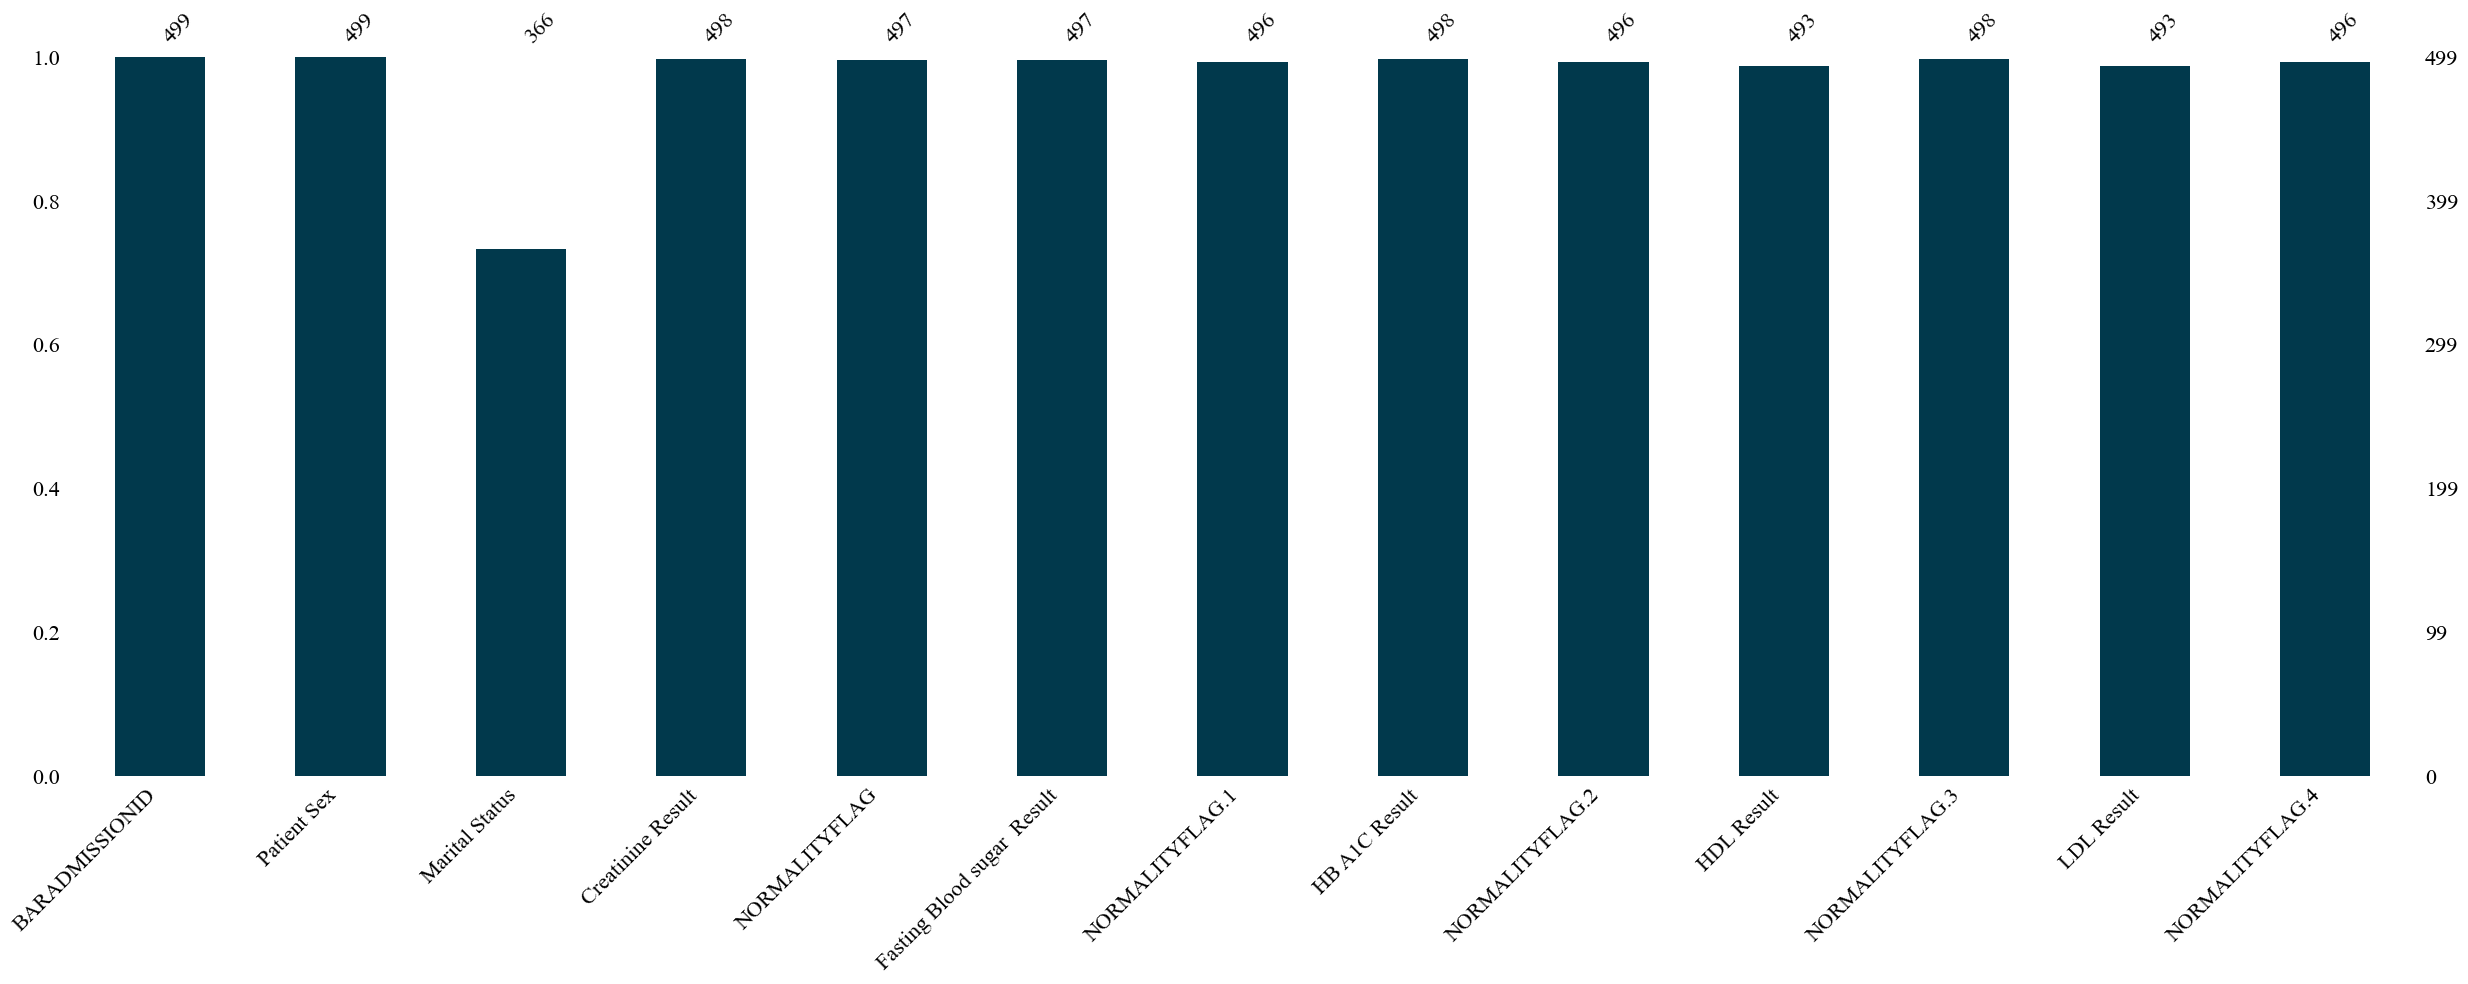

In [14]:
misgo.bar(dataframe, color='#01394c')
plt.tight_layout()
plt.savefig("misgo_bar_plot.png", dpi=300)

### Columns rename:

In [16]:
ModifiedDataFrame = dataframe.copy()

In [17]:
ModifiedDataFrame.columns=['ID', 'Sex','Marital status', 'Creatinine (mg/dL)', 'Creatinine status', 
                  'Fasting Blood Sugar (mg/dL)', 'FBS status','Hb_A1c (mg/dL)', 'Hb_A1c status', 'HDL (mg/dL)', 
                  'HDL status', 'LDL (mg/dL)', 'LDL status']

### Exploring of the head and tail of the data fram:

In [19]:
ModifiedDataFrame.head(10)

ID  \
0  20223452   
1  20223452   
2  20223452   
3  20223452   
4  20223452   
5  20223452   
6  20223452   
7  20223452   
8  20223452   
9  20223452   

  Sex  \
0   F   
1   F   
2   F   
3   F   
4   F   
5   F   
6   F   
7   F   
8   F   
9   F   

  Marital status  \
0            NaN   
1         Single   
2        Widowed   
3        Widowed   
4        Married   
5        Married   
6        Widowed   
7        Widowed   
8        Married   
9            NaN   

  Creatinine (mg/dL)  \
0                8.3   
1                0.8   
2                0.6   
3               1.12   
4               0.24   
5               1.21   
6               0.17   
7                1.7   
8                0.6   
9                0.9   

  Creatinine status  \
0                 H   
1                 N   
2                 N   
3                 H   
4                 L   
5                 H   
6                 L   
7                 H   
8                 N   
9                 N   

  Fasting Blood Sugar (mg/dL)  \
0                         108   
1                         319   
2                         192   
3                         214   
4                         131   
5                          86   
6                         131   
7                         181   
8                         204   
9                         241   

  FBS status  \
0          N   
1          H   
2          N   
3          H   
4          H   
5          N   
6          N   
7          H   
8          H   
9          N   

  Hb_A1c (mg/dL)  \
0          5.80%   
1             10   
2           10.5   
3            7.5   
4          9.00%   
5            7.7   
6            9.1   
7            8.9   
8           10.3   
9            7.3   

  Hb_A1c status  \
0             N   
1             H   
2             H   
3             H   
4             N   
5             N   
6             H   
7             N   
8             H   
9             N   

  HDL (mg/dL)  \
0          51   
1          51   
2          46   
3          44   
4          42   
5          41   
6          40   
7          39   
8          39   
9          38   

  HDL status  \
0          N   
1          N   
2          N   
3          N   
4          N   
5          N   
6          N   
7          N   
8          N   
9          N   

  LDL (mg/dL)  \
0          64   
1          64   
2          64   
3          64   
4          64   
5          64   
6          64   
7          64   
8          64   
9          64   

  LDL status  
0          N  
1          N  
2          N  
3          N  
4          N  
5          N  
6          N  
7          N  
8          N  
9          N

In [20]:
ModifiedDataFrame.tail(10)

ID  \
489  20223452   
490  20223452   
491  20223452   
492  20223452   
493  20223452   
494  20223452   
495  20223452   
496  20223452   
497  20223452   
498  20223452   

    Sex  \
489   M   
490   M   
491   M   
492   M   
493   M   
494   M   
495   M   
496   M   
497   M   
498   M   

    Marital status  \
489        Married   
490        Married   
491        Married   
492        Married   
493            NaN   
494            NaN   
495            NaN   
496        Married   
497            NaN   
498        Married   

    Creatinine (mg/dL)  \
489                8.8   
490                0.8   
491                0.7   
492                  3   
493                0.9   
494                0.5   
495                0.7   
496               0.99   
497                0.7   
498                0.9   

    Creatinine status  \
489                 H   
490                 N   
491                 N   
492                 N   
493                 N   
494                 N   
495                 L   
496                 N   
497                 N   
498                 N   

    Fasting Blood Sugar (mg/dL)  \
489                         213   
490                         132   
491                        82.4   
492                         264   
493                          89   
494                         295   
495                         111   
496                          99   
497                         224   
498                         167   

    FBS status  \
489          N   
490          H   
491          N   
492          H   
493          N   
494          H   
495          N   
496          N   
497          N   
498          H   

    Hb_A1c (mg/dL)  \
489             11   
490           12.5   
491         10.80%   
492             10   
493            6.9   
494           12.2   
495            6.9   
496             6%   
497            9.4   
498            5.2   

    Hb_A1c status  \
489             H   
490             H   
491             N   
492             N   
493             H   
494             H   
495             H   
496             N   
497             N   
498             N   

    HDL (mg/dL)  \
489          44   
490          42   
491          39   
492          37   
493          32   
494          29   
495          62   
496        83.4   
497        33.2   
498          78   

    HDL status  \
489          N   
490          N   
491          N   
492          N   
493          N   
494          N   
495          N   
496          N   
497          N   
498          N   

    LDL (mg/dL)  \
489         161   
490         161   
491         161   
492         161   
493         161   
494         161   
495         161   
496         161   
497         161   
498         161   

    LDL status  
489          H  
490          H  
491          H  
492          H  
493          H  
494          H  
495          H  
496          H  
497          H  
498          H

### Entery renaming | ID column:

In [22]:
NewValue = []
for i in range(len(dataframe)):
    NewValue.append('2024' + str(i))
ModifiedDataFrame['ID'] = NewValue

In [23]:
df = ModifiedDataFrame.head(10)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

dfi.export(df, "First Ten Rows After Renaming.png", table_conversion="matplotlib", dpi=300)

### Entery examining | Sex column:

In [25]:
print("Value counts for 'Sex column':")
print(ModifiedDataFrame['Sex'].value_counts(dropna=False))

Value counts for 'Sex column':
Sex
F         251
M         241
Female      4
women       1
female      1
girl        1
Name: count, dtype: int64


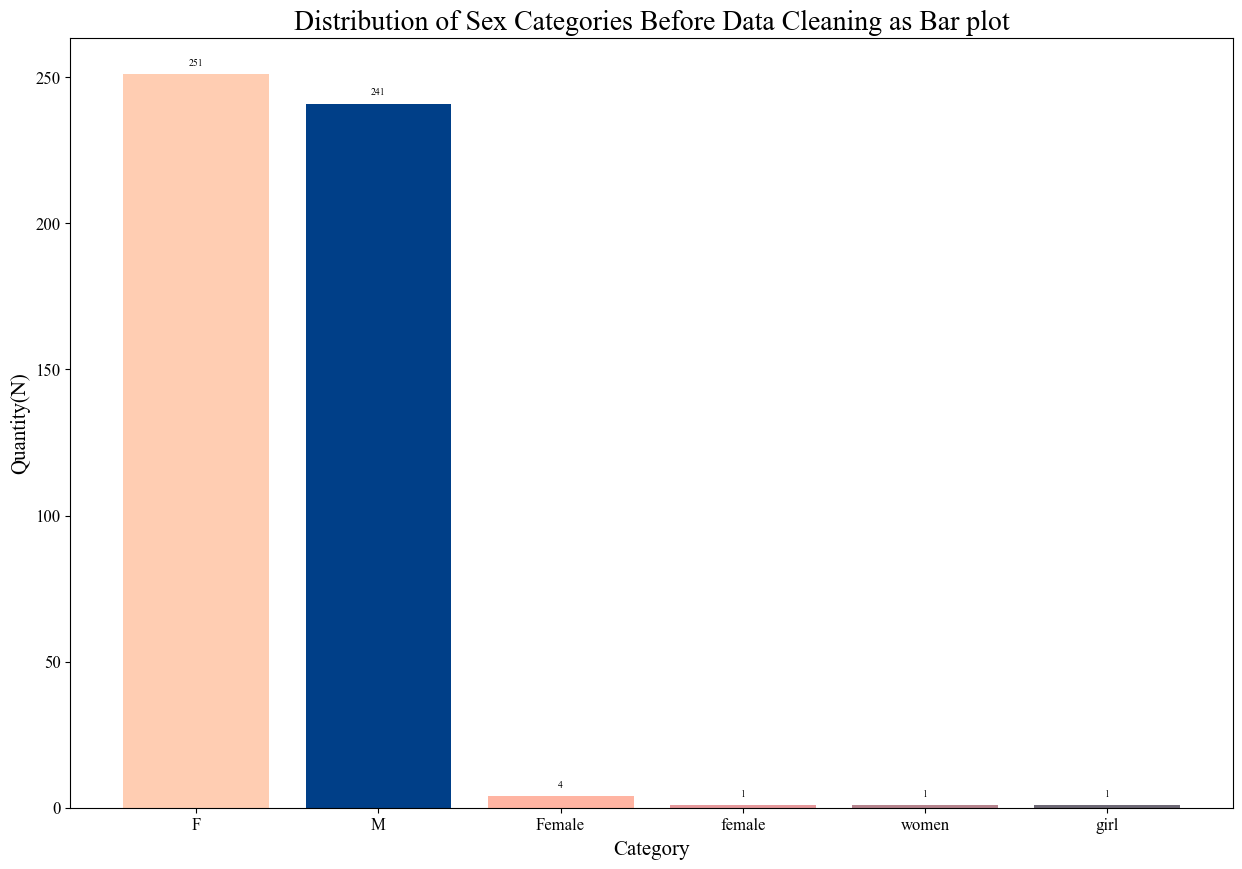

In [26]:
Keyword = [251, 241, 4, 1, 1, 1]
Value = ['F', 'M', 'Female', 'female', 'women', 'girl']

plt.figure(figsize=(15, 10))
ColorGroup = ['#ffcdb2', '#003f88', '#ffb4a2', '#e5989b', '#b5838d', '#6d6875']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 3, str(value), ha='center', fontsize=7)
 

plt.title('Distribution of Sex Categories Before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=20)
plt.xlabel('Category',fontname='Times New Roman', fontsize=15)
plt.ylabel('Quantity(N)',fontname='Times New Roman', fontsize=15)
plt.savefig("Distribution of Sex Categories Before Data Cleaning as Bar plot.png", dpi=300)
plt.show()

### Entery examining | Marital status column:

In [28]:
print("Value counts for 'Marital status':")
print(ModifiedDataFrame['Marital status'].value_counts(dropna=False))

Value counts for 'Marital status':
Marital status
Married        294
NaN            133
Widowed         50
Single           8
M (MARRIED)      4
Divorced         3
U+1F600          3
Divorce          1
M                1
w                1
Polygamous       1
Name: count, dtype: int64


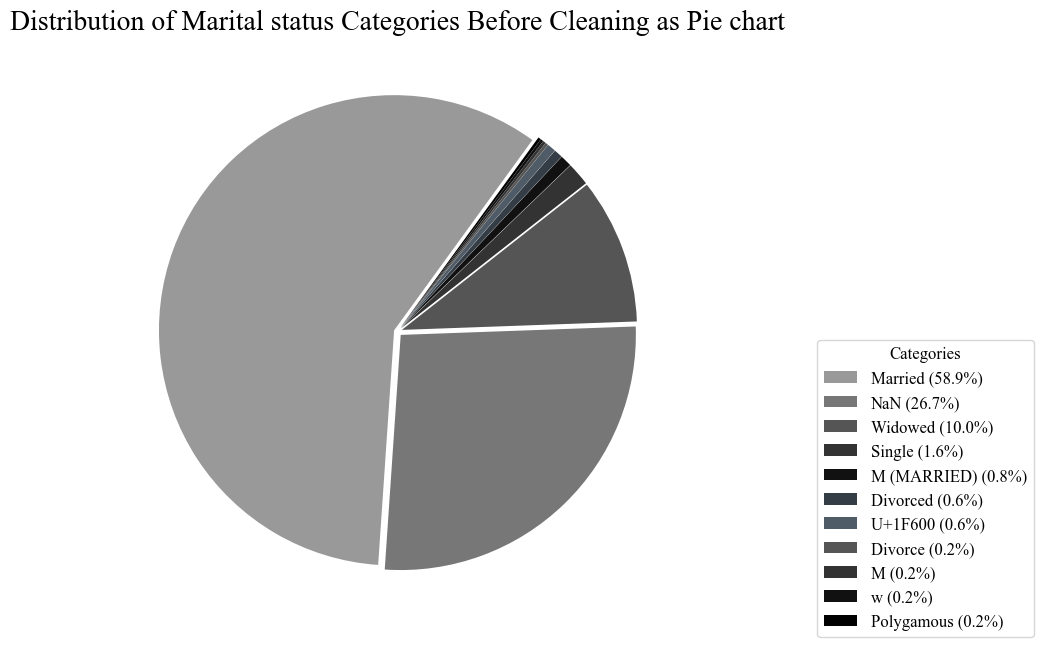

In [29]:
Keyword = [294, 133, 50, 8, 4, 3, 3, 1, 1, 1, 1]
Value = ['Married', 'NaN', 'Widowed', 'Single', 'M (MARRIED)', 'Divorced', 'U+1F600', 'Divorce', 'M', 'w', 'Polygamous']
Explode = [0.015, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))

Colors_list = [
    '#999999',  '#777777',  '#555555', '#333333',
    '#111111',  '#343d46',  '#4f5b66', '#555555', 
    '#333333',  '#111111',  '#000000'    
]

plt.pie(Keyword, explode=Explode, startangle=54, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
    
plt.legend(legend_labels, title="Categories", loc="upper left", bbox_to_anchor=(1.2, 0.5), fontsize=12, ncol=1)
plt.title("Distribution of Marital status Categories Before Cleaning as Pie chart", fontname='Times New Roman', fontsize=20)
plt.tight_layout()
plt.savefig("Distribution of Marital status Categories Before Cleaning as Pie chart.png", dpi=300, bbox_inches='tight')
plt.show()

### Entery examining | Creatinine column:

In [31]:
print("Value counts for 'Creatinine (mg/dL)':")
print(ModifiedDataFrame['Creatinine (mg/dL)'].head(5))

Value counts for 'Creatinine (mg/dL)':
0     8.3
1     0.8
2     0.6
3    1.12
4    0.24
Name: Creatinine (mg/dL), dtype: object


#### String checker:

In [33]:
for index, row in ModifiedDataFrame.iterrows():
    value = row['Creatinine (mg/dL)']
    if isinstance(value, str) and re.search(r'[a-zA-Z]', value):
        print(f"String value found at index {index} with value: {value}")
    elif pd.isna(value):  
        print(f"NaN value found at index {index}")

String value found at index 131 with value: 1.1 twice
String value found at index 212 with value: insufficient 
NaN value found at index 225


In [34]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['Creatinine (mg/dL)']
    New_string = str(Value)
    if '%' in New_string:
       print(f"% found at index {index} with value: {Value}")

#### Negative number checker:

In [36]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['Creatinine (mg/dL)']
    try:
        Value_float = float(Value)
        if 0 > Value_float:
            print(f"Negative Value at index {index}: {Value_float}")
    except ValueError:
        pass

Negative Value at index 72: -10.0
Negative Value at index 76: -150.0


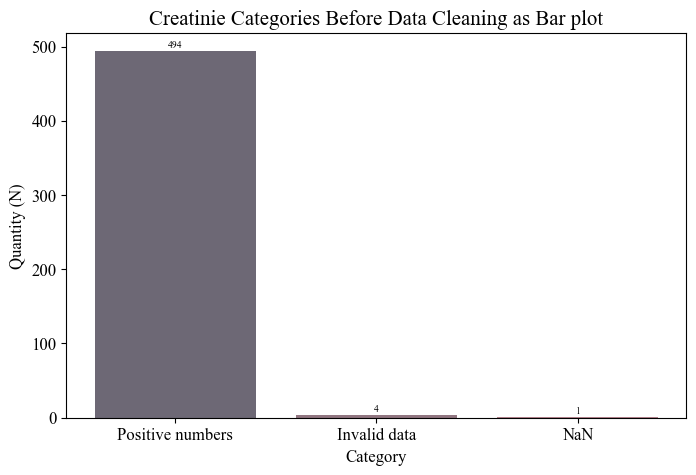

In [37]:
Keyword = [494,  4, 1]
Value = ['Positive numbers', 'Invalid data', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681',  '#b5838d']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('Creatinie Categories Before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("Creatinie Categories Before Data Cleaning as Bar plot.png", dpi=300)
plt.show()

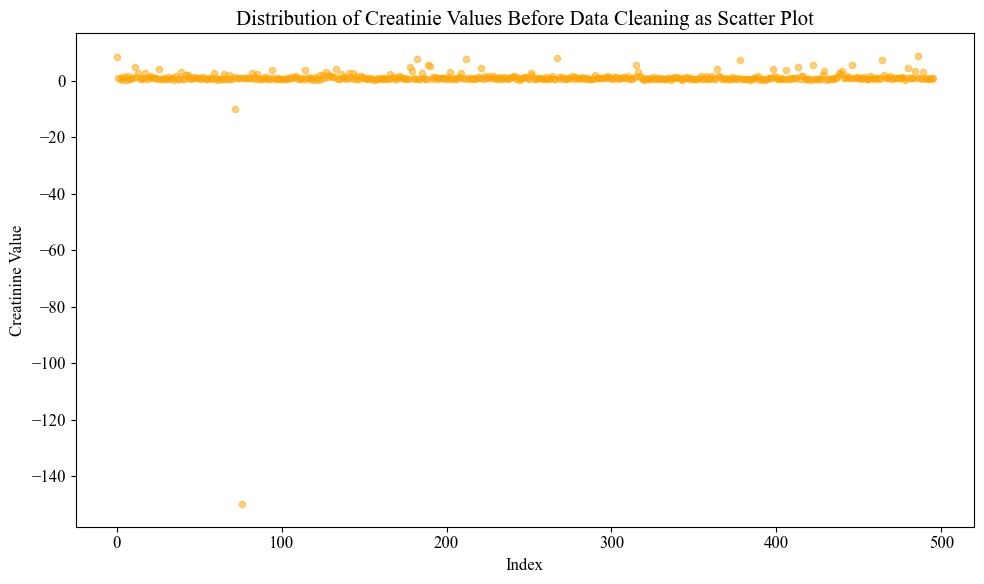

In [38]:
Series = pd.to_numeric(ModifiedDataFrame['Creatinine (mg/dL)'], errors='coerce').dropna()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(Series)), Series, color='#FFA500', alpha=0.5, s=20)

plt.title("Distribution of Creatinie Values Before Data Cleaning as Scatter Plot", fontsize=15, fontname='Times New Roman')
plt.xlabel("Index", fontsize=12, fontname='Times New Roman')
plt.ylabel("Creatinine Value", fontsize=12, fontname='Times New Roman')

plt.tight_layout()
plt.savefig("Distribution of Creatinie Values Before Data Cleaning as Scatter Plot.png", dpi=300)
plt.show()

Mean: 0.8601612903225806
Variance: 47.71242744868


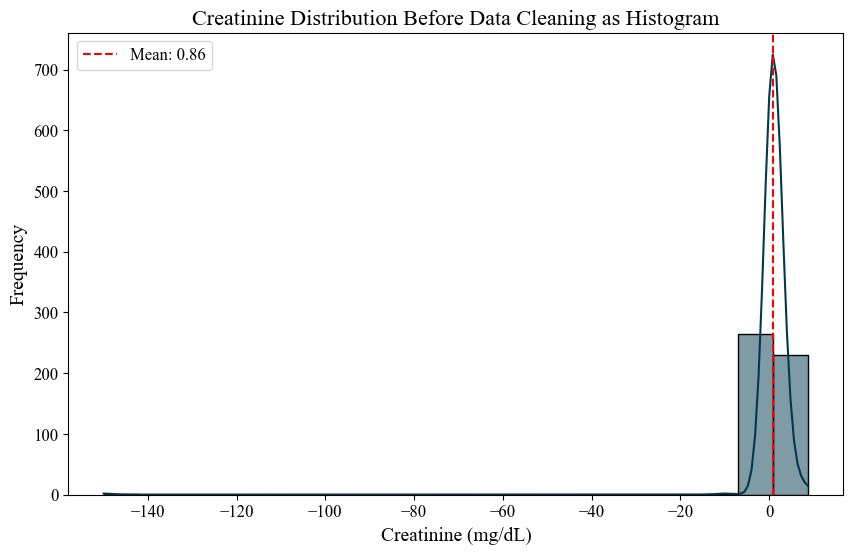

In [39]:
Series = pd.to_numeric(ModifiedDataFrame['Creatinine (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Creatinine Distribution Before Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Creatinine (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Creatinine Distribution Before Data Cleaning as Histogram.png", dpi=300)
plt.show()

### Entery examining | Creatinine status column:

In [41]:
print("Value counts for 'Creatinine status':")
print(ModifiedDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine status':
Creatinine status
N            318
H            121
L             57
NaN            2
not read       1
Name: count, dtype: int64


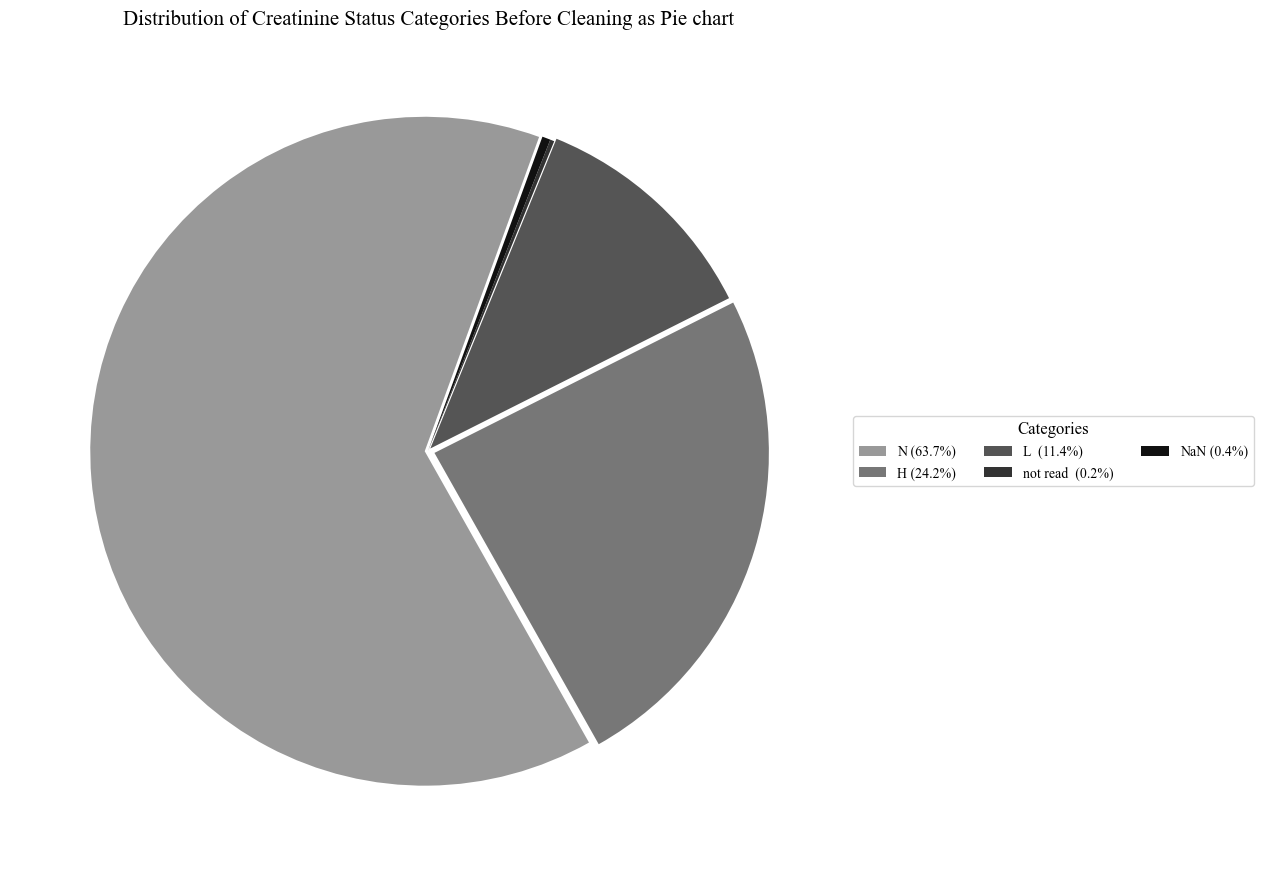

In [42]:
Keyword = [318, 121, 57, 1, 2]
Value = ['N', 'H', 'L ', 'not read ', 'NaN']
Explode = [0.01, 0.02, 0.01, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(12, 10))  
Colors_list =  ['#999999',  '#777777',  '#555555', '#333333','#111111' ]
     
plt.pie(Keyword, explode=Explode, startangle= 70, textprops={'fontsize': 7}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, ncol=3)
plt.title("Distribution of Creatinine Status Categories Before Cleaning as Pie chart",fontname='Times New Roman', fontsize=15, loc='center')
plt.tight_layout() 
plt.savefig("Distribution of Creatinine Status Categories Before Cleaning as Pie chart.png", bbox_inches='tight', dpi=300)
plt.show()

### Entery examining | Fasting Blood Sugar column:

In [44]:
print("Value counts for 'Fasting Blood Sugar (mg/dL)':")
print(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].head())

Value counts for 'Fasting Blood Sugar (mg/dL)':
0    108
1    319
2    192
3    214
4    131
Name: Fasting Blood Sugar (mg/dL), dtype: object


In [45]:
for index, row in ModifiedDataFrame.iterrows():
    value = row['Fasting Blood Sugar (mg/dL)']
    if isinstance(value, str) and re.search(r'[a-zA-Z]', value):
        print(f"String value found at index {index} with value: {value}")
    elif pd.isna(value):  
        print(f"NaN value found at index {index}")

NaN value found at index 72
String value found at index 76 with value: no 
NaN value found at index 225


In [46]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['Fasting Blood Sugar (mg/dL)']
    New_string = str(Value)
    if '%' in New_string:
       print(f"% found at index {index} with value: {Value}")

In [47]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['Fasting Blood Sugar (mg/dL)']
    try:
        Value_float = float(Value)
        if 0 > Value_float:
            print(f"Negative Value at index {index}: {Value_float}")
    except ValueError:
        pass

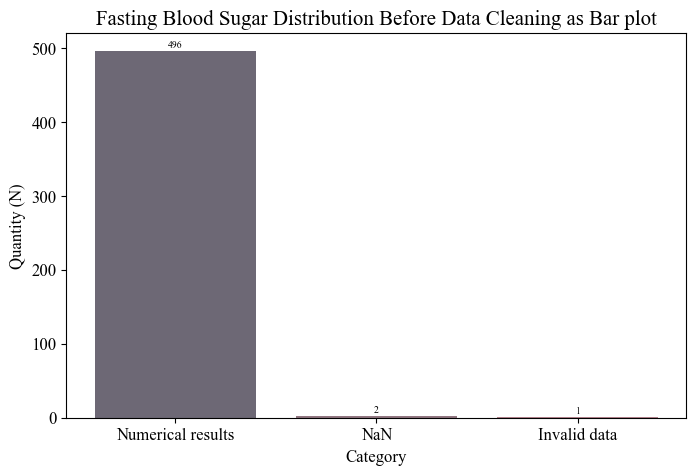

In [48]:
Keyword = [496, 2,  1]
Value = ['Numerical results','NaN', 'Invalid data']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681', '#b5838d' ]

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('Fasting Blood Sugar Distribution Before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("Fasting Blood Sugar Distribution Before Data Cleaning as Bar plot.png", dpi=300)

plt.show()

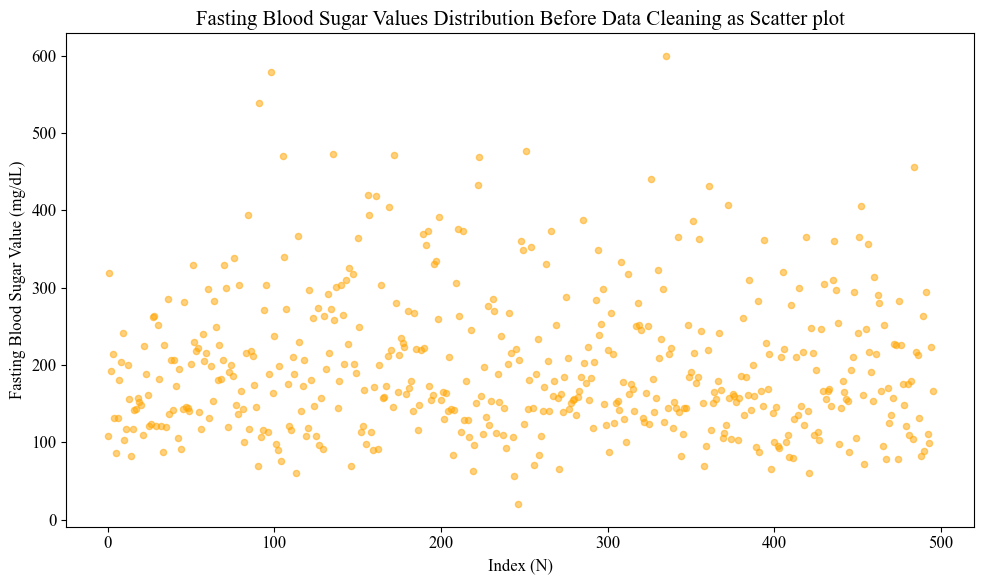

In [49]:
Series = pd.to_numeric(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce').dropna()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(Series)), Series, color='#FFA500', alpha=0.5, s=20)

plt.title("Fasting Blood Sugar Values Distribution Before Data Cleaning as Scatter plot", fontsize=15,fontname='Times New Roman')
plt.xlabel("Index (N)", fontsize=12, fontname='Times New Roman')
plt.ylabel("Fasting Blood Sugar Value (mg/dL)", fontsize=12, fontname='Times New Roman')
plt.tight_layout()
plt.savefig("Fasting Blood Sugar Values Distribution Before Data Cleaning as Scatter plot.png", dpi=300)
plt.show()

Mean: 198.02318548387098
Variance: 8289.339279529157


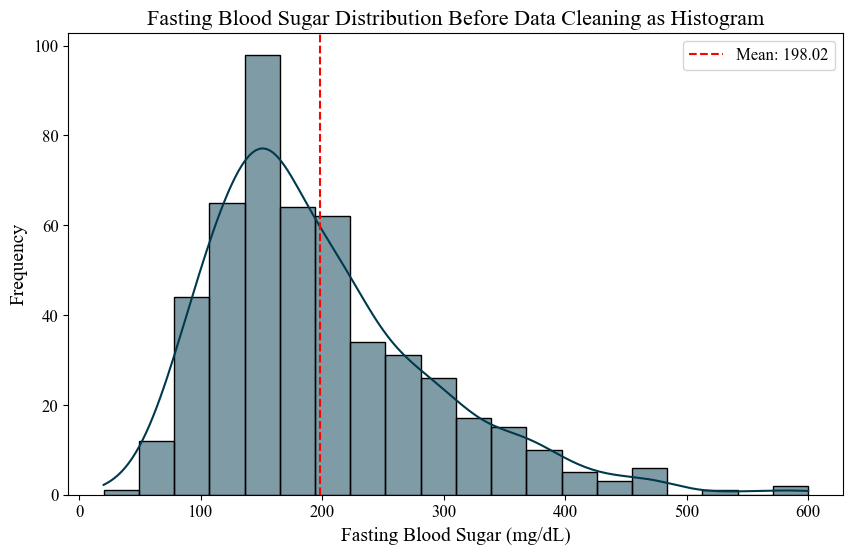

In [50]:
Series = pd.to_numeric(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Fasting Blood Sugar Distribution Before Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Fasting Blood Sugar (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Fasting Blood Sugar Distribution Before Data Cleaning as Histogram.png", dpi=300)
plt.show()

### Entery examining | Fasting blood sugar status column:

In [52]:
print("Value counts for 'FBS status':")
print(ModifiedDataFrame['FBS status'].value_counts(dropna=False))

Value counts for 'FBS status':
FBS status
H      306
N      188
NaN      3
L        2
Name: count, dtype: int64


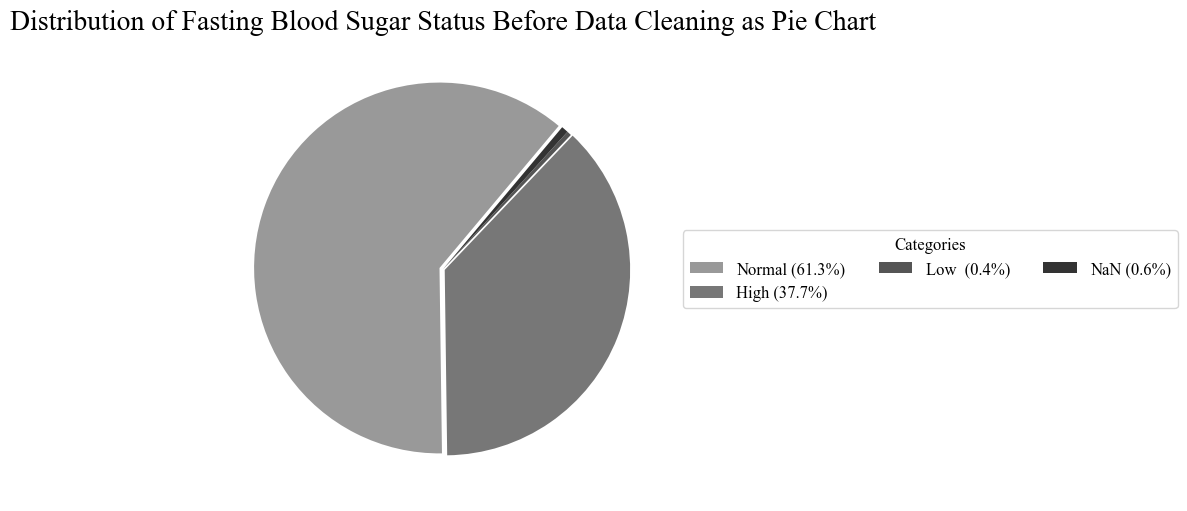

In [53]:
Keyword = [306, 188, 2,3]
Value = ['Normal', 'High', 'Low ', 'NaN']
Explode = [0.02, 0.01, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555', '#333333']
               
plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 7}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of Fasting Blood Sugar Status Before Data Cleaning as Pie Chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Fasting Blood Sugar Status Before Data Cleaning as Pie Chart.png", dpi=300, bbox_inches='tight')
plt.show()

### Entery examining | Hb_A1c column:

In [55]:
print("Value counts for 'Hb_A1c (mg/dL)':")
print(ModifiedDataFrame['Hb_A1c (mg/dL)'].head(5))

Value counts for 'Hb_A1c (mg/dL)':
0    5.80%
1       10
2     10.5
3      7.5
4    9.00%
Name: Hb_A1c (mg/dL), dtype: object


In [56]:
for index, row in ModifiedDataFrame.iterrows():
    value = row['Hb_A1c (mg/dL)']
    if isinstance(value, str) and re.search(r'[a-zA-Z]', value):
        print(f"String value found at index {index} with value: {value}")
    elif pd.isna(value):  
        print(f"NaN value found at index {index}")

String value found at index 71 with value: repeat
String value found at index 72 with value: not read 
String value found at index 76 with value: unknown
NaN value found at index 225
String value found at index 248 with value: rrrrr
String value found at index 367 with value: rrr
String value found at index 410 with value: non


In [57]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['Hb_A1c (mg/dL)']
    New_string = str(Value)
    if '%' in New_string:
       print(f"% found at index {index} with value: {Value}")

% found at index 0 with value: 5.80%
% found at index 4 with value: 9.00%
% found at index 22 with value: 11.50%
% found at index 79 with value: 7.70%
% found at index 115 with value: 6.70%
% found at index 120 with value: 9.00%
% found at index 133 with value: 8%
% found at index 155 with value: 5.30%
% found at index 176 with value: 9.20%
% found at index 199 with value: 9.40%
% found at index 211 with value: 9.90%
% found at index 249 with value: 7.20%
% found at index 253 with value: 6.00%
% found at index 269 with value: 8.60%
% found at index 281 with value: 8.50%
% found at index 290 with value: 6.70%
% found at index 294 with value: 7.40%
% found at index 341 with value: 7.10%
% found at index 347 with value: 8.30%
% found at index 369 with value: 8.80%
% found at index 391 with value: 10.50%
% found at index 392 with value: 9.10%
% found at index 394 with value: 9.90%
% found at index 411 with value: 5.80%
% found at index 448 with value: 9.00%
% found at index 458 with value:

In [58]:
for index, row in ModifiedDataFrame.iterrows():
    Value =  row['Hb_A1c (mg/dL)']
    try:
        Value_float = float(Value)
        if 0 > Value_float:
            print(f"Negative Value at index {index}: {Value_float}")
    except ValueError:
        pass

In [59]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['Hb_A1c (mg/dL)']
    try:
        Value_float = float(Value)
        if 0 > Value_float:
            print(f"Negative Value at index {index}: {Value_float}")
    except ValueError:
        pass

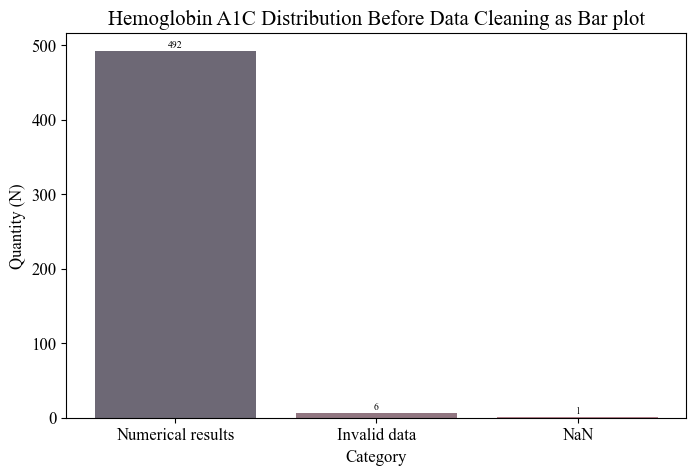

In [60]:
Keyword = [492, 6, 1]
Value = ['Numerical results','Invalid data', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681', '#b5838d' ]

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('Hemoglobin A1C Distribution Before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("Hemoglobin A1C Distribution Before Data Cleaning as Bar plot.png", dpi=300)
plt.show()

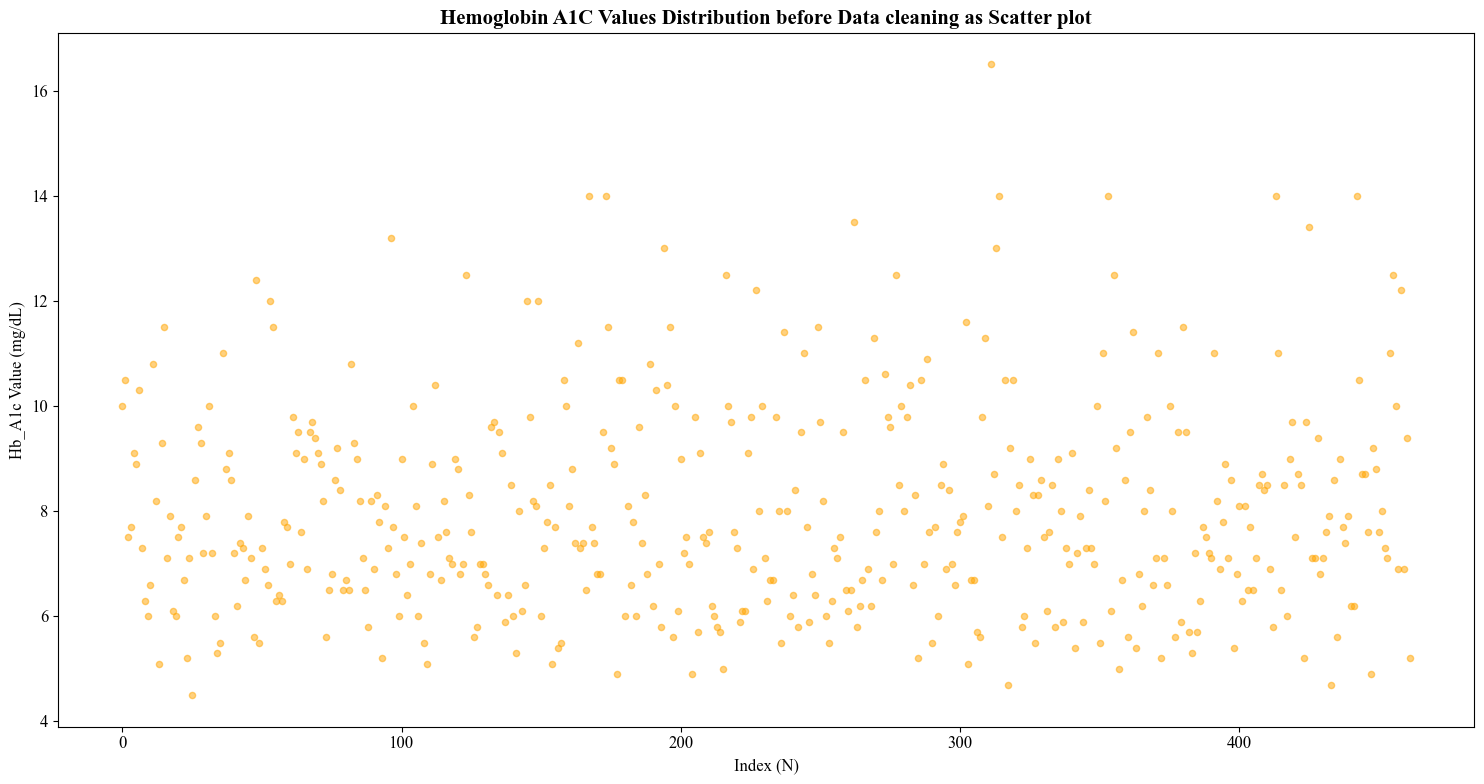

In [61]:
Series = pd.to_numeric(ModifiedDataFrame['Hb_A1c (mg/dL)'], errors='coerce').dropna()

plt.figure(figsize=(15, 8))
plt.scatter(range(len(Series)), Series, color='#FFA500', alpha=0.5, s=20)

plt.title("Hemoglobin A1C Values Distribution before Data cleaning as Scatter plot", fontsize=15, weight='bold',fontname='Times New Roman')
plt.xlabel("Index (N)", fontsize=12, fontname='Times New Roman')
plt.ylabel("Hb_A1c Value (mg/dL)", fontsize=12, fontname='Times New Roman')
plt.tight_layout()
plt.savefig("Hemoglobin A1C Values Distribution before Data cleaning as Scatter plot.png")
plt.show()

Mean: 7.973809523809524
Variance: 3.9560370829459757


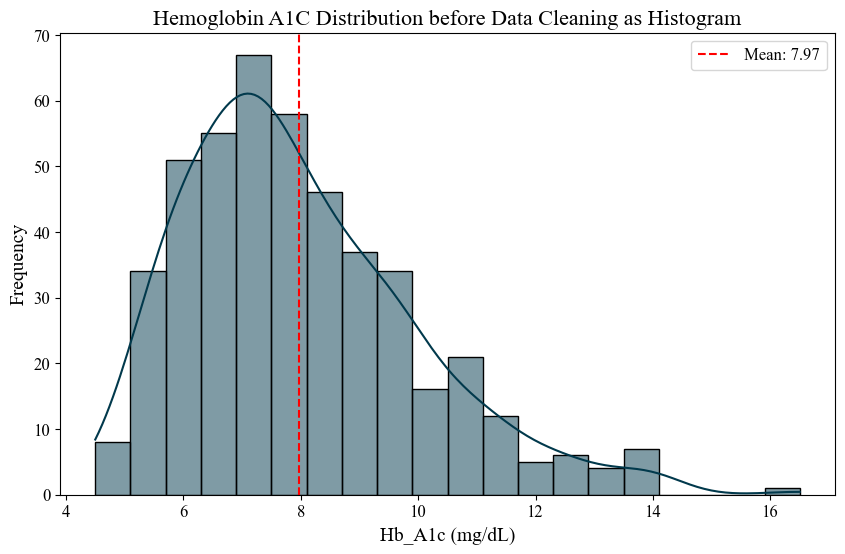

In [62]:
Series = pd.to_numeric(ModifiedDataFrame['Hb_A1c (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Hemoglobin A1C Distribution before Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Hb_A1c (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Hemoglobin A1C Distribution before Data Cleaning as Histogram.png")
plt.show()

### Entery examining | Hb_A1c status column:

In [64]:
print("Value counts for 'Hb_A1c status':")
print(ModifiedDataFrame['Hb_A1c status'].value_counts(dropna=False))

Value counts for 'Hb_A1c status':
Hb_A1c status
H      251
N      245
NaN      3
Name: count, dtype: int64


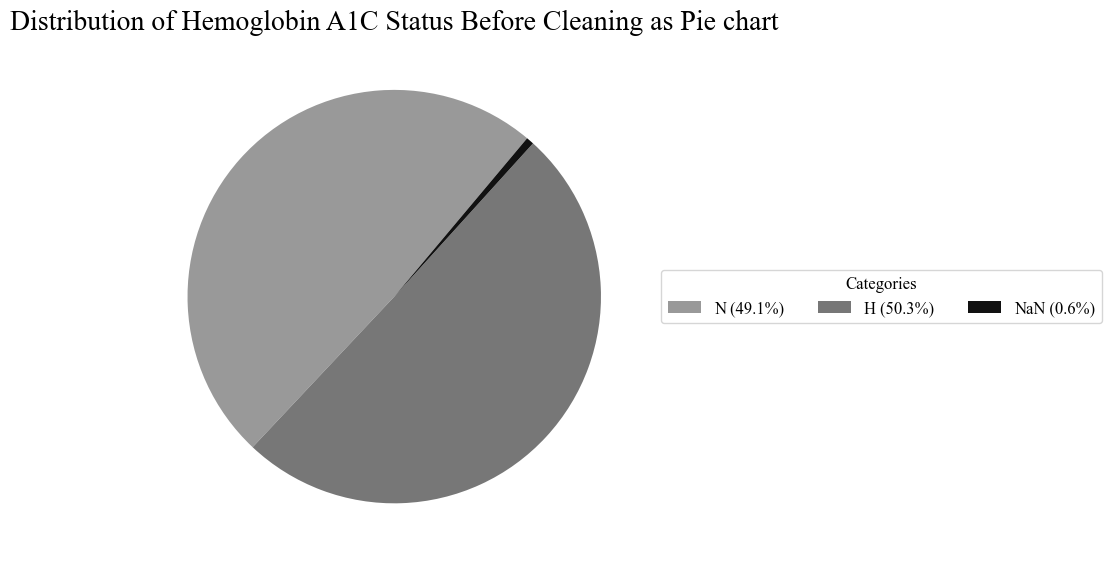

In [65]:
Keyword = [245, 251, 3,]
Value = ['N', 'H', 'NaN']
Explode = [0, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]


legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  

Colors_list = ['#999999',  '#777777',  '#111111']

plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of Hemoglobin A1C Status Before Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Hemoglobin A1C Status Before Cleaning as Pie chart.png", bbox_inches='tight')
plt.show()

### Entery examining | HDL column:

In [67]:
print("Value counts for 'HDL (mg/dL)':")
print(ModifiedDataFrame['HDL (mg/dL)'].head(5))

Value counts for 'HDL (mg/dL)':
0    51
1    51
2    46
3    44
4    42
Name: HDL (mg/dL), dtype: object


In [68]:
for index, row in ModifiedDataFrame.iterrows():
    value = row['HDL (mg/dL)']
    if isinstance(value, str) and re.search(r'[a-zA-Z]', value):
        print(f"String value found at index {index} with value: {value}")
    elif pd.isna(value):  
        print(f"NaN value found at index {index}")

NaN value found at index 71
NaN value found at index 72
String value found at index 73 with value: na
String value found at index 74 with value: na
String value found at index 75 with value: na
NaN value found at index 76
String value found at index 77 with value: na
String value found at index 78 with value: na
String value found at index 224 with value: na
NaN value found at index 225
String value found at index 226 with value: na
String value found at index 227 with value: na
String value found at index 228 with value: na
NaN value found at index 229
String value found at index 230 with value: na
NaN value found at index 231
String value found at index 232 with value: na
String value found at index 372 with value: na


In [69]:
for index, row in ModifiedDataFrame.iterrows():
    value = row['HDL (mg/dL)']
    New_string = str(Value)
    if '%' in New_string:
       print(f"% found at index {index} with value: {Value}")

In [70]:
for index, row in ModifiedDataFrame.iterrows():
    Value =  row['HDL (mg/dL)']
    try:
        Value_float = float(Value)
        if 0 > Value_float:
            print(f"Negative Value at index {index}: {Value_float}")
    except ValueError:
        pass

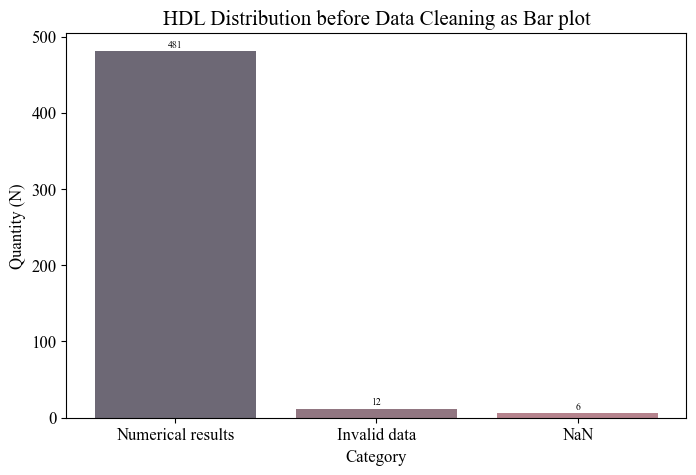

In [71]:
Keyword = [481, 12, 6]
Value = ['Numerical results','Invalid data', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681', '#b5838d' ]

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('HDL Distribution before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("HDL Distribution before Data Cleaning as Bar plot.png")
plt.show()

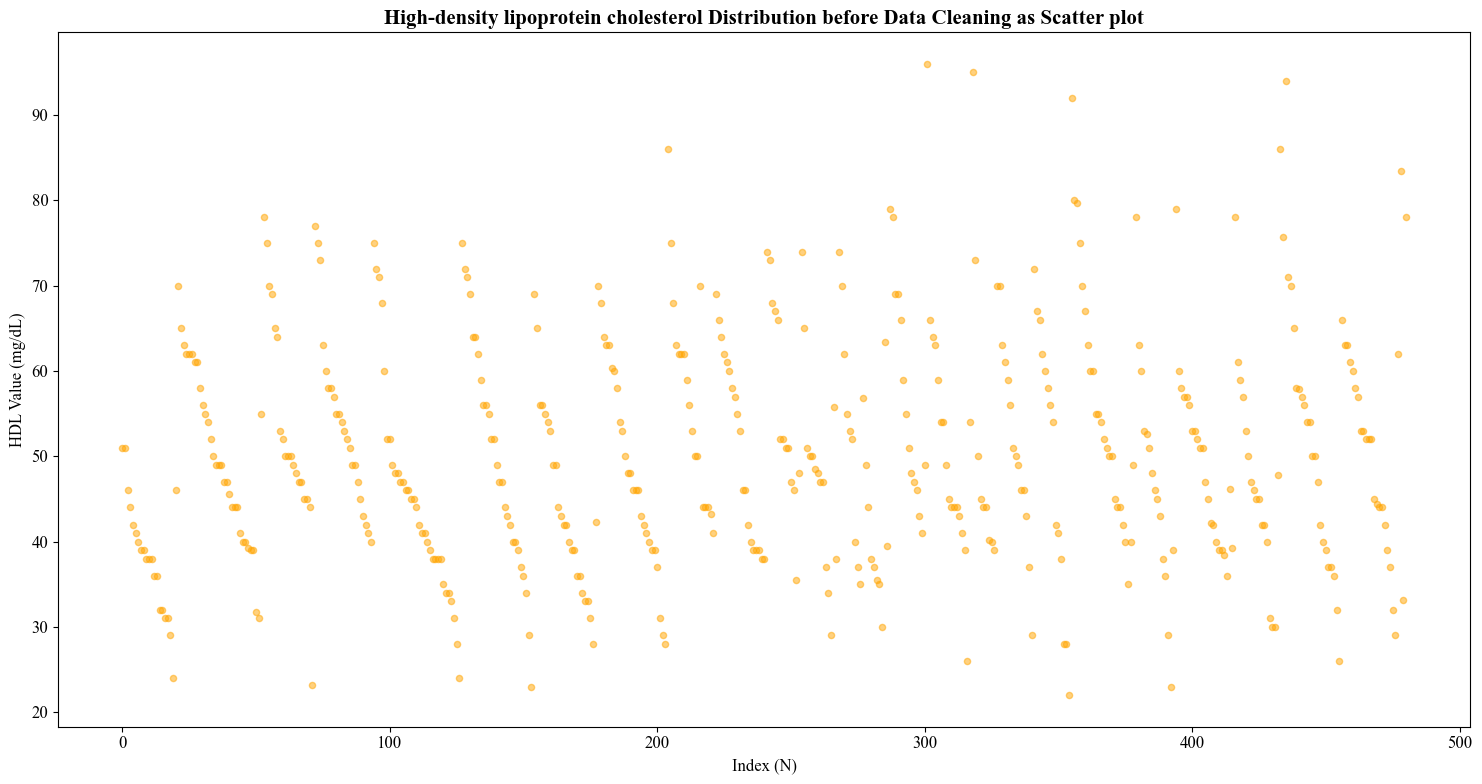

In [72]:
Series = pd.to_numeric(ModifiedDataFrame['HDL (mg/dL)'], errors='coerce').dropna()

plt.figure(figsize=(15, 8))
plt.scatter(range(len(Series)), Series, color='#FFA500', alpha=0.5, s=20)

plt.title("High-density lipoprotein cholesterol Distribution before Data Cleaning as Scatter plot", fontsize=15, weight='bold',fontname='Times New Roman')
plt.xlabel("Index (N)", fontsize=12, fontname='Times New Roman')
plt.ylabel("HDL Value (mg/dL)", fontsize=12, fontname='Times New Roman')
plt.tight_layout()
plt.savefig("High-density lipoprotein cholesterol Distribution before Data Cleaning as Scatter plot.png")
plt.show()

Mean: 50.282120582120584
Variance: 174.05838799376295


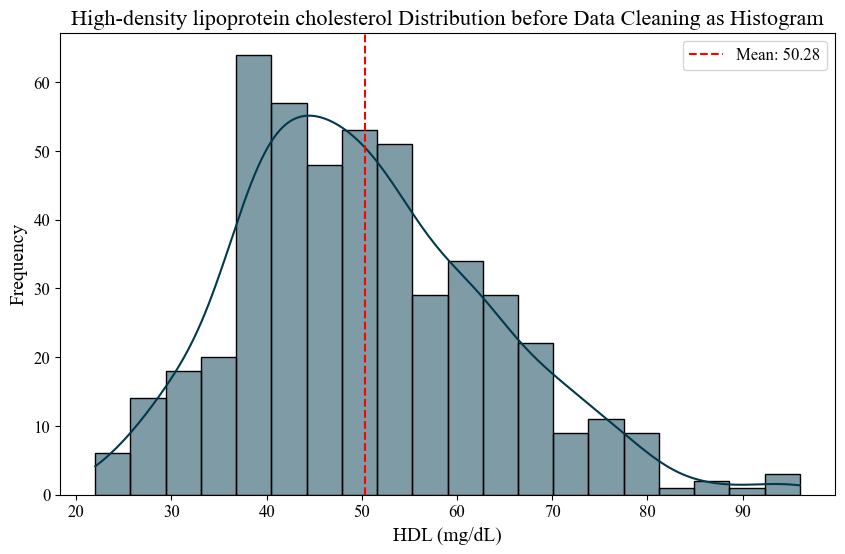

In [73]:
Series = pd.to_numeric(ModifiedDataFrame['HDL (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('High-density lipoprotein cholesterol Distribution before Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('HDL (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("High-density lipoprotein cholesterol Distribution before Data Cleaning as Histogram.png")
plt.show()

### Entery examining | HDL status column:

In [75]:
print("Value counts for 'HDL status':")
print(ModifiedDataFrame['HDL status'].value_counts(dropna=False))

Value counts for 'HDL status':
HDL status
N      456
L       30
H        8
NLH      2
0        2
NaN      1
Name: count, dtype: int64


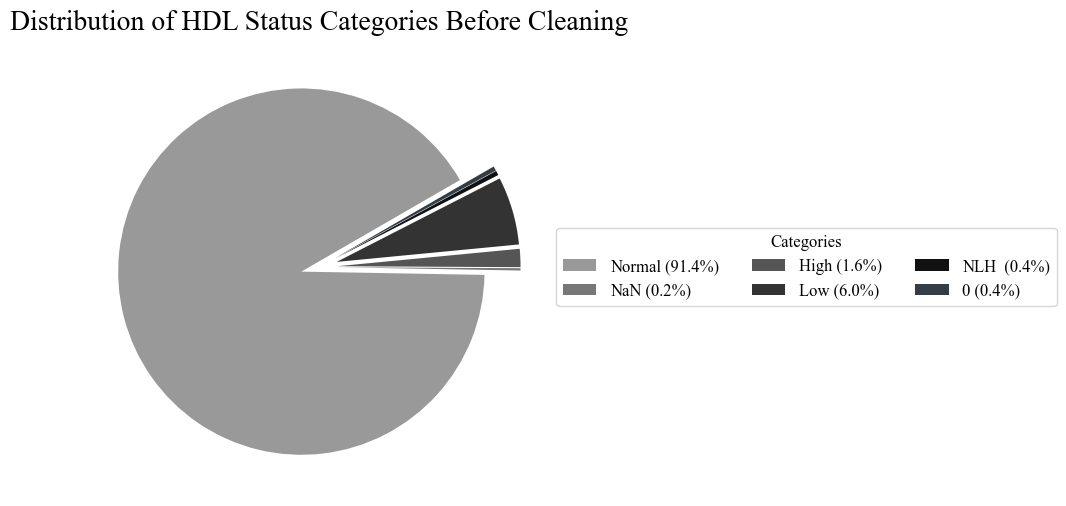

In [76]:
Keyword = [456, 1, 8, 30, 2, 2]
Value = ['Normal', 'NaN', 'High', 'Low', 'NLH ', '0']
Explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555', '#333333', '#111111',  '#343d46']
                 
plt.pie(Keyword, explode=Explode, startangle=30, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of HDL Status Categories Before Cleaning",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of HDL Status Categories Before Cleaning.png", bbox_inches='tight')
plt.show()

### Entery examining | LDL column:

In [78]:
print("Value counts for 'LDL (mg/dL)':")
print(ModifiedDataFrame['LDL (mg/dL)'].head(5))

Value counts for 'LDL (mg/dL)':
0    64
1    64
2    64
3    64
4    64
Name: LDL (mg/dL), dtype: object


In [79]:
for index, row in ModifiedDataFrame.iterrows():
    value = row['LDL (mg/dL)']
    if isinstance(value, str) and re.search(r'[a-zA-Z]', value):
        print(f"String value found at index {index} with value: {value}")
    elif pd.isna(value):  
        print(f"NaN value found at index {index}")

NaN value found at index 71
NaN value found at index 72
String value found at index 73 with value: na
String value found at index 74 with value: na
String value found at index 75 with value: na
NaN value found at index 76
String value found at index 77 with value: na
String value found at index 78 with value: na
String value found at index 224 with value: na
NaN value found at index 225
String value found at index 226 with value: na
String value found at index 227 with value: na
String value found at index 228 with value: na
NaN value found at index 229
String value found at index 230 with value: na
NaN value found at index 231
String value found at index 232 with value: na
String value found at index 233 with value: na
String value found at index 234 with value: na
String value found at index 235 with value: na
String value found at index 236 with value: na
String value found at index 237 with value: na
String value found at index 238 with value: na


In [80]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['LDL (mg/dL)']
    New_string = str(Value)
    if '%' in New_string:
       print(f"% found at index {index} with value: {Value}")

In [81]:
for index, row in ModifiedDataFrame.iterrows():
    Value = row['LDL (mg/dL)']
    try:
        Value_float = float(Value)
        if 0 > Value_float:
            print(f"Negative Value at index {index}: {Value_float}")
    except ValueError:
        pass

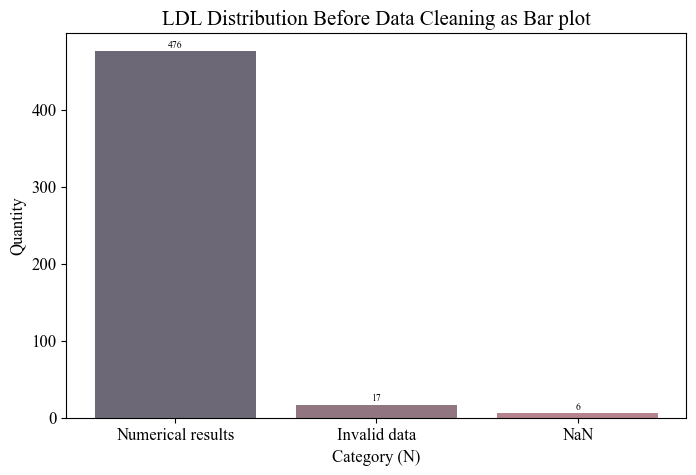

In [82]:
Keyword = [476, 17, 6]
Value = ['Numerical results','Invalid data', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681', '#b5838d' ]

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('LDL Distribution Before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category (N)',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity',fontname='Times New Roman', fontsize=12)
plt.savefig("LDL Distribution Before Data Cleaning as Bar plot.png")
plt.show()

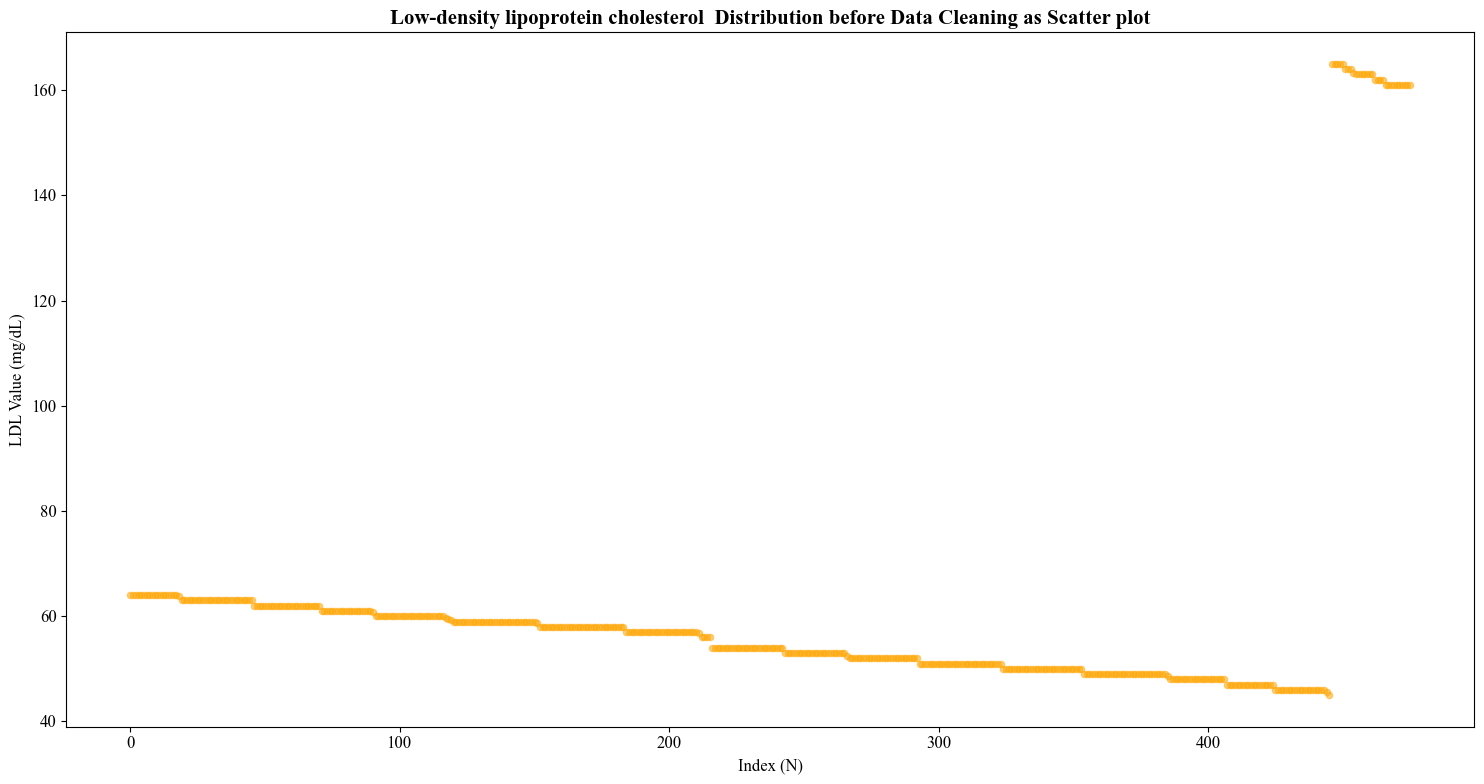

In [83]:
Input_Data = pd.to_numeric(ModifiedDataFrame['LDL (mg/dL)'], errors='coerce').dropna()

plt.figure(figsize=(15, 8))
plt.scatter(range(len(Input_Data)), Input_Data, color='#FFA500', alpha=0.5, s=20)

plt.title("Low-density lipoprotein cholesterol  Distribution before Data Cleaning as Scatter plot", fontsize=15, weight='bold',fontname='Times New Roman')
plt.xlabel("Index (N)", fontsize=12, fontname='Times New Roman')
plt.ylabel("LDL Value (mg/dL)", fontsize=12, fontname='Times New Roman')

plt.tight_layout()
plt.savefig("Low-density lipoprotein cholesterol Distribution before Data Cleaning as Scatter plot.png")
plt.show()

Mean: 61.79915966386555
Variance: 713.9985677134013


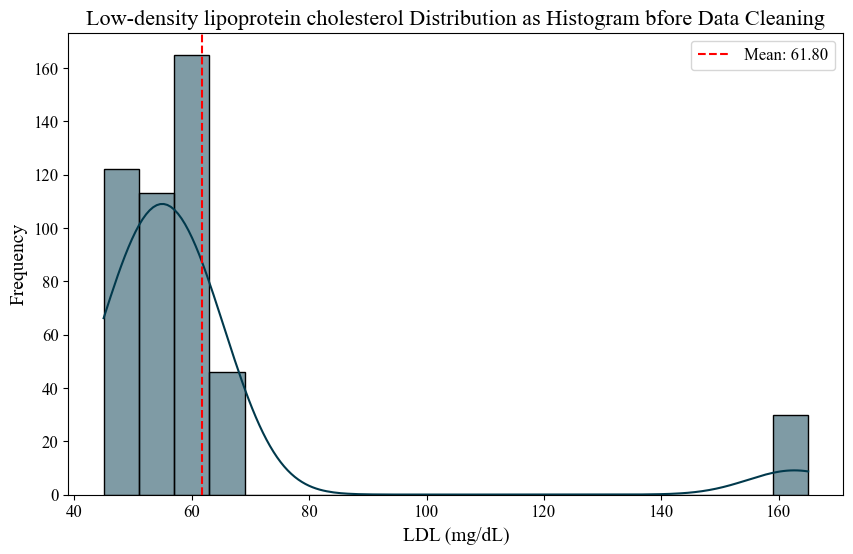

In [84]:
Series = pd.to_numeric(ModifiedDataFrame['LDL (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Low-density lipoprotein cholesterol Distribution as Histogram bfore Data Cleaning', fontsize=16, fontname='Times New Roman')
plt.xlabel('LDL (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Low-density lipoprotein cholesterol Distribution as Histogram bfore Data Cleaning.png")
plt.show()

### Entery examining | LDL status column:


In [86]:
print("Value counts for 'LDL status':")
print(ModifiedDataFrame['LDL status'].value_counts(dropna=False))

Value counts for 'LDL status':
LDL status
N      467
H       26
NaN      3
0        3
Name: count, dtype: int64


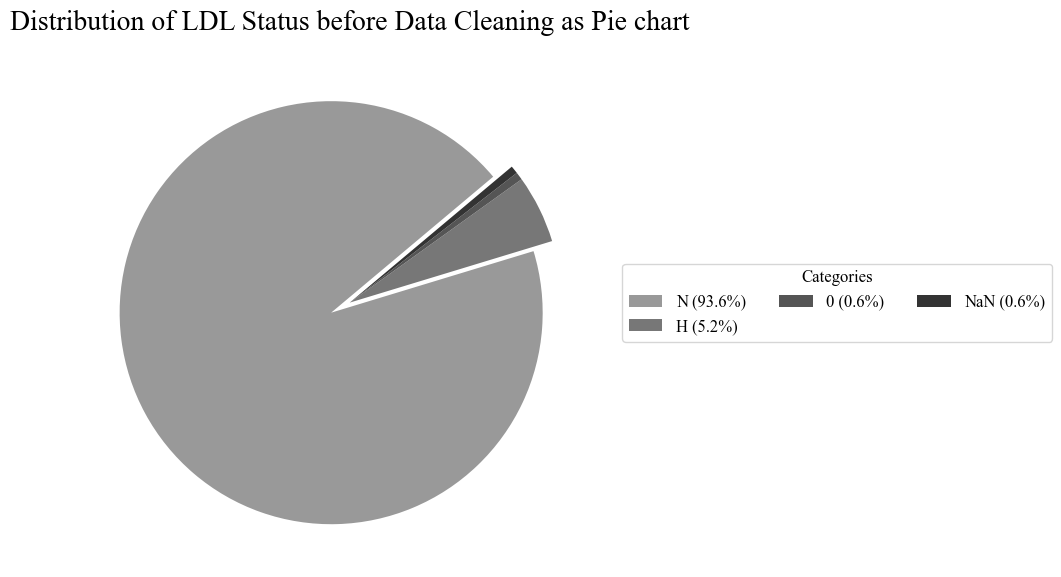

In [87]:
Keyword = [467, 26, 3, 3]
Value = ['N', 'H', '0', 'NaN']
Explode = [0.1, 0 , 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  

Colors_list = ['#999999',  '#777777',  '#555555', '#333333']
    
plt.pie(Keyword, explode=Explode, startangle=40, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of LDL Status before Data Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of LDL Status before Data Cleaning as Pie chart.png", bbox_inches='tight')
plt.show()

## DATA mapping:

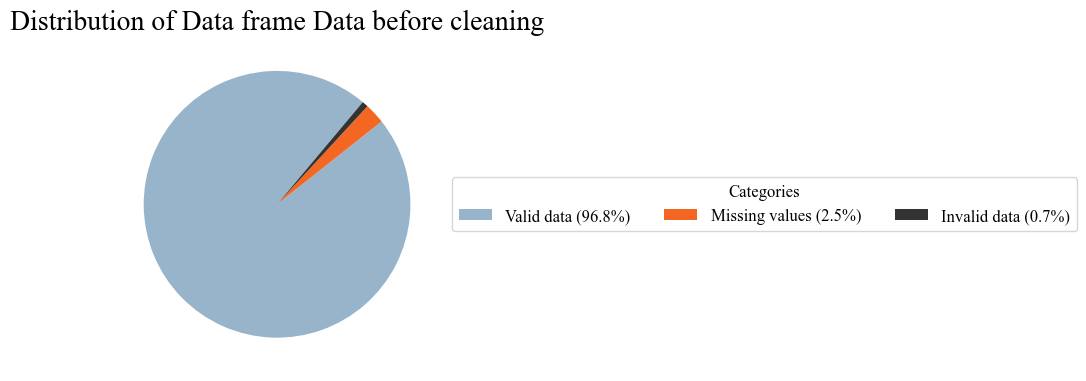

In [89]:
Keyword = [6278, 161, 48]
Value = ['Valid data', 'Missing values', 'Invalid data']
Explode = [0, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  

Colors_list = ['#98b4ca', '#f46723', '#333333']

plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of Data frame Data before cleaning",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Data frame Data before cleaning.png", bbox_inches='tight')
plt.show()

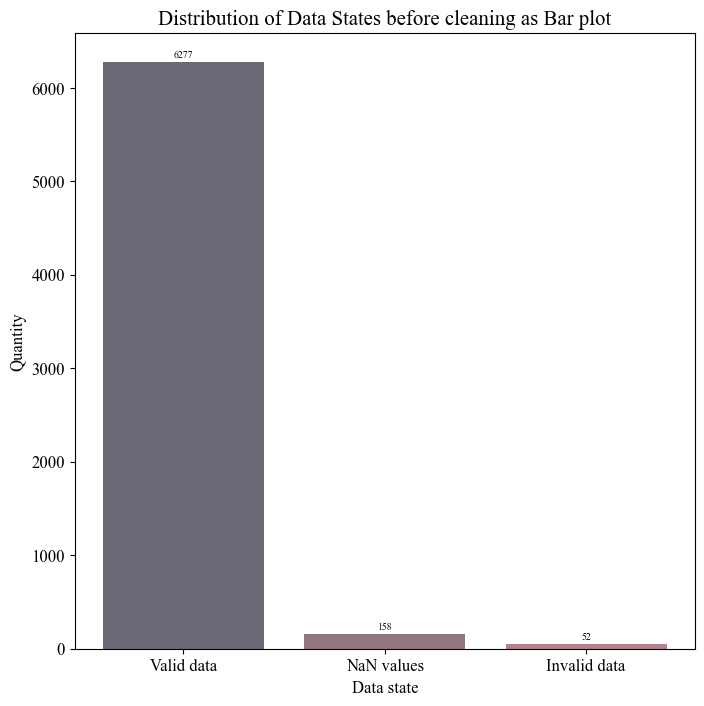

In [90]:
Keyword = [6277, 158, 52]
Value = ['Valid data', 'NaN values', 'Invalid data']

plt.figure(figsize=(8, 8))
Colors_list = ['#A8E6A8', '#ffff80', '#A63D00']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 50, str(value), ha='center', fontsize=7)
 
plt.title("Distribution of Data States before cleaning as Bar plot",fontname='Times New Roman', fontsize=15)
plt.xlabel('Data state',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity',fontname='Times New Roman', fontsize=12)
plt.savefig("Distribution of Data States before cleaning as Bar plot.png")

plt.show()

## CLeaning:

In [92]:
ModifiedDataFrame.head()

ID  \
0  20240   
1  20241   
2  20242   
3  20243   
4  20244   

  Sex  \
0   F   
1   F   
2   F   
3   F   
4   F   

  Marital status  \
0            NaN   
1         Single   
2        Widowed   
3        Widowed   
4        Married   

  Creatinine (mg/dL)  \
0                8.3   
1                0.8   
2                0.6   
3               1.12   
4               0.24   

  Creatinine status  \
0                 H   
1                 N   
2                 N   
3                 H   
4                 L   

  Fasting Blood Sugar (mg/dL)  \
0                         108   
1                         319   
2                         192   
3                         214   
4                         131   

  FBS status  \
0          N   
1          H   
2          N   
3          H   
4          H   

  Hb_A1c (mg/dL)  \
0          5.80%   
1             10   
2           10.5   
3            7.5   
4          9.00%   

  Hb_A1c status  \
0             N   
1             H   
2             H   
3             H   
4             N   

  HDL (mg/dL)  \
0          51   
1          51   
2          46   
3          44   
4          42   

  HDL status  \
0          N   
1          N   
2          N   
3          N   
4          N   

  LDL (mg/dL)  \
0          64   
1          64   
2          64   
3          64   
4          64   

  LDL status  
0          N  
1          N  
2          N  
3          N  
4          N

### Sex:

In [94]:
ModifiedDataFrame = ModifiedDataFrame.replace(to_replace=["Female", "female", "women", "girl"], value= "F")

In [95]:
Sexvalue_counts = ModifiedDataFrame['Sex'].value_counts()
Sexvalue_counts

Sex
F    258
M    241
Name: count, dtype: int64

### Marital status:

In [97]:
ModifiedDataFrame.replace(to_replace = ["Married", "M (MARRIED)"], value = "M",inplace=True)
ModifiedDataFrame.replace(to_replace = ["Widowed", "w"], value = "W",inplace=True)
ModifiedDataFrame.replace(to_replace = ["Divorced", "Divorce "], value = "D",inplace=True)
ModifiedDataFrame.replace(to_replace = ["Single"], value = "S",inplace=True)

In [98]:
ModifiedDataFrame.loc[ModifiedDataFrame['Marital status'] == 'U+1F600']

ID  \
72    202472   
76    202476   
225  2024225   

    Sex  \
72    F   
76    F   
225   F   

    Marital status  \
72         U+1F600   
76         U+1F600   
225        U+1F600   

    Creatinine (mg/dL)  \
72                 -10   
76                -150   
225                NaN   

    Creatinine status  \
72                NaN   
76          not read    
225               NaN   

    Fasting Blood Sugar (mg/dL)  \
72                          NaN   
76                          no    
225                         NaN   

    FBS status  \
72         NaN   
76         NaN   
225        NaN   

    Hb_A1c (mg/dL)  \
72       not read    
76         unknown   
225            NaN   

    Hb_A1c status  \
72            NaN   
76            NaN   
225           NaN   

    HDL (mg/dL)  \
72          NaN   
76          NaN   
225         NaN   

    HDL status  \
72         NLH   
76         NLH   
225        NaN   

    LDL (mg/dL)  \
72          NaN   
76          NaN   
225         NaN   

    LDL status  
72         NaN  
76         NaN  
225        NaN

In [99]:
ModifiedDataFrame.drop(index=[72, 76, 225], inplace=True)

In [100]:
ModifiedDataFrame.loc[ModifiedDataFrame['Marital status'] == 'U+1F600']

Empty DataFrame
Columns: [ID, Sex, Marital status, Creatinine (mg/dL), Creatinine status, Fasting Blood Sugar (mg/dL), FBS status, Hb_A1c (mg/dL), Hb_A1c status, HDL (mg/dL), HDL status, LDL (mg/dL), LDL status]
Index: []

In [101]:
ModifiedDataFrame.loc[ModifiedDataFrame['Marital status'] == 'Polygamous']

ID  \
381  2024381   

    Sex  \
381   M   

    Marital status  \
381     Polygamous   

    Creatinine (mg/dL)  \
381               7.22   

    Creatinine status  \
381                 H   

    Fasting Blood Sugar (mg/dL)  \
381                         103   

    FBS status  \
381          N   

    Hb_A1c (mg/dL)  \
381           12.5   

    Hb_A1c status  \
381             N   

    HDL (mg/dL)  \
381          60   

    HDL status  \
381          N   

    LDL (mg/dL)  \
381          49   

    LDL status  
381          N

In [102]:
ModifiedDataFrame.replace('Polygamous', np.nan, inplace=True)

In [103]:
Main_data = ['W','S','M','D']
ModifiedDataFrame.loc[~ModifiedDataFrame['Marital status'].isin(Main_data), 'Marital status'] = np.nan

In [104]:
ModifiedDataFrame['Marital status'].isna().sum()

134

In [105]:
MaritalStatus_counts = ModifiedDataFrame['Marital status'].value_counts()
MaritalStatus_counts

Marital status
M    299
W     51
S      8
D      4
Name: count, dtype: int64

In [106]:
ModifiedDataFrame.reset_index(drop=True, inplace=True)

### Creatinine: 

In [108]:
ModifiedDataFrame.replace(to_replace = ["1.1 twice"], value = "1.1",inplace=True)

In [109]:
ModifiedDataFrame.loc[ModifiedDataFrame['Creatinine (mg/dL)'] == 'insufficient ',: ]

ID  \
210  2024212   

    Sex  \
210   F   

    Marital status  \
210              M   

    Creatinine (mg/dL)  \
210      insufficient    

    Creatinine status  \
210                 N   

    Fasting Blood Sugar (mg/dL)  \
210                         376   

    FBS status  \
210          H   

    Hb_A1c (mg/dL)  \
210             10   

    Hb_A1c status  \
210             N   

    HDL (mg/dL)  \
210          86   

    HDL status  \
210          N   

    LDL (mg/dL)  \
210          57   

    LDL status  
210          N

In [110]:
ModifiedDataFrame.replace('insufficient ', np.nan, inplace=True)
ModifiedDataFrame.loc[ModifiedDataFrame['Creatinine (mg/dL)'] == 'insufficient ',: ]

Empty DataFrame
Columns: [ID, Sex, Marital status, Creatinine (mg/dL), Creatinine status, Fasting Blood Sugar (mg/dL), FBS status, Hb_A1c (mg/dL), Hb_A1c status, HDL (mg/dL), HDL status, LDL (mg/dL), LDL status]
Index: []

In [111]:
Creatinine_counts = ModifiedDataFrame['Creatinine (mg/dL)'].value_counts()
# Creatinine_counts

In [112]:
FullDataFrame = ModifiedDataFrame.copy()
ModifiedDataFrame['Creatinine (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['Creatinine (mg/dL)'], errors='coerce')
SeriesOfData = ModifiedDataFrame['Creatinine (mg/dL)'].dropna()

Mean = ModifiedDataFrame['Creatinine (mg/dL)'].mean()
STD = ModifiedDataFrame['Creatinine (mg/dL)'].std()
ZScore = (SeriesOfData- Mean) / STD

print("Mean:",Mean)
print("standard deviation:",STD)
outliers = np.abs(SeriesOfData[abs(ZScore) > 3])
print("Outliers: \n", outliers)

NumberOfOutliers = len(outliers)
print("Number of rows containing outliers:", NumberOfOutliers)

valid_indices = ModifiedDataFrame.index.intersection(outliers.index)
ModifiedDataFrame = ModifiedDataFrame[~ModifiedDataFrame.index.isin(outliers.index)]

FullDataFrame.loc[FullDataFrame.index.intersection(outliers.index), 'Creatinine (mg/dL)'] = np.nan 

Mean: 1.1873535353535354
standard deviation: 1.1801201073946466
Outliers: 
 0      8.30
177    4.80
181    7.50
188    5.57
189    5.07
212    7.80
267    8.10
315    5.50
378    7.22
422    5.70
446    5.50
464    7.20
486    8.80
Name: Creatinine (mg/dL), dtype: float64
Number of rows containing outliers: 13


In [113]:
print("Value counts for 'Creatinine (mg/dL)':")
print(FullDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine (mg/dL)':
Creatinine status
N    318
H    121
L     57
Name: count, dtype: int64


In [114]:
print("Value counts for 'Creatinine (mg/dL)':")
print(ModifiedDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine (mg/dL)':
Creatinine status
N    316
H    110
L     57
Name: count, dtype: int64


### Creatinine status:

In [116]:
ModifiedDataFrame['Creatinine status'].isna().sum()

0

##### Before the correction: 

In [118]:
print("Value counts for 'Creatinine status':")
print(FullDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine status':
Creatinine status
N    318
H    121
L     57
Name: count, dtype: int64


In [119]:
def categorize_status(level, Gender):
    if Gender == "M":
        if level <= 0.7:
            return 'Low'
        elif 0.7 < level < 1.2:
            return 'Normal'
        elif level >= 1.2:
            return 'High'
    elif Gender == "F":
        if level <= 0.5:
            return 'Low'
        elif 0.5 < level < 0.9:
            return 'Normal'
        elif level >= 0.9:
            return 'High'
    
    print(f"Returning None for level={level}, Gender={Gender}")
    return np.nan 

FullDataFrame['Creatinine (mg/dL)'] = pd.to_numeric(FullDataFrame['Creatinine (mg/dL)'], errors='coerce')
FullDataFrame['Creatinine status'] = FullDataFrame.apply(    lambda 
                                         row: categorize_status(row['Creatinine (mg/dL)'], row['Sex']), axis=1)

ModifiedDataFrame['Creatinine (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['Creatinine (mg/dL)'], errors='coerce')
ModifiedDataFrame['Creatinine status'] = ModifiedDataFrame.apply(    lambda 
                                         row: categorize_status(row['Creatinine (mg/dL)'], row['Sex']), axis=1)

Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=F


In [120]:
ModifiedDataFrame.replace(to_replace=["H"], value="High", inplace=True)
ModifiedDataFrame.replace(to_replace=["N"], value="Normal", inplace=True)
ModifiedDataFrame.replace(to_replace=["L"], value="Low", inplace=True)

In [121]:
FullDataFrame.replace(to_replace=["H"], value="High", inplace=True)
FullDataFrame.replace(to_replace=["N"], value="Normal", inplace=True)
FullDataFrame.replace(to_replace=["L"], value="Low", inplace=True)

##### After the correction: 

In [123]:
print("Value counts for 'Creatinine status':")
print(FullDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine status':
Creatinine status
Normal    202
High      156
Low       124
NaN        14
Name: count, dtype: int64


In [124]:
print("Value counts for 'Creatinine status':")
print(ModifiedDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine status':
Creatinine status
Normal    202
High      156
Low       124
NaN         1
Name: count, dtype: int64


### Fasting Blood Sugar:

In [126]:
ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].isna().sum()

0

In [127]:
print("Value counts for 'Fasting Blood Sugar (mg/dL)':")
# print(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].value_counts(dropna=False))

Value counts for 'Fasting Blood Sugar (mg/dL)':


In [128]:
ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce')
SeriesOfData = ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].dropna()

Mean = ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].mean()
STD = ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].std()
ZScore = (SeriesOfData- Mean) / STD

print("Mean:",Mean)
print("standard deviation:",STD)
outliers = np.abs(SeriesOfData[abs(ZScore) > 3])
print("Outliers: \n", outliers)

NumberOfOutliers = len(outliers)
print("Number of rows containing outliers:", NumberOfOutliers)

ModifiedDataFrame = ModifiedDataFrame[~ModifiedDataFrame.index.isin(outliers.index)]

FullDataFrame.loc[FullDataFrame.index.intersection(outliers.index), 'Fasting Blood Sugar (mg/dL)'] = np.nan

Mean: 198.25776397515529
standard deviation: 91.5686273983646
Outliers: 
 91     539.0
98     579.0
135    473.0
251    477.0
335    600.0
Name: Fasting Blood Sugar (mg/dL), dtype: float64
Number of rows containing outliers: 5


### Fasting Blood Sugar status:

In [130]:
print("Value counts for 'Fasting Blood Sugar (mg/dL)':")
print(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].head(5))

Value counts for 'Fasting Blood Sugar (mg/dL)':
1    319.0
2    192.0
3    214.0
4    131.0
5     86.0
Name: Fasting Blood Sugar (mg/dL), dtype: float64


In [131]:
def categorize_status(level):
    
        if level <= 74:
            return 'Low'
        elif 74 < level < 110:
            return 'Normal'
        elif level >= 110:
            return 'High'
            
        print(f"Returning None for level={level}")
        return np.nan

FullDataFrame['Fasting Blood Sugar (mg/dL)'] = pd.to_numeric(FullDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce')
FullDataFrame['FBS status'] = FullDataFrame['Fasting Blood Sugar (mg/dL)'].apply(categorize_status)

ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce')
ModifiedDataFrame['FBS status'] = ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'].apply(categorize_status)

Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan


In [132]:
print("Value counts for 'FBS status':")
print(ModifiedDataFrame['FBS status'].value_counts(dropna=False))

Value counts for 'FBS status':
FBS status
High      412
Normal     54
Low        12
Name: count, dtype: int64


In [133]:
print("Value counts for 'FBS status':")
print(FullDataFrame['FBS status'].value_counts(dropna=False))

Value counts for 'FBS status':
FBS status
High      423
Normal     56
Low        12
NaN         5
Name: count, dtype: int64


### Hemoglobin A1C:

In [135]:
ModifiedDataFrame['Hb_A1c (mg/dL)'].isna().sum()

0

In [136]:
print("Value counts for 'Hb_A1c (mg/dL)':")
print(FullDataFrame['Hb_A1c (mg/dL)'].head(5))

Value counts for 'Hb_A1c (mg/dL)':
0    5.80%
1       10
2     10.5
3      7.5
4    9.00%
Name: Hb_A1c (mg/dL), dtype: object


#### Values mapping formula:

In [138]:
x = 8 # Percentage value (%)
m = (13.4 - 7.8) / (10.0 - 6.5) 
b = 7.8 - m * 6.5  
glucose_level = m * x + b
glucose_level

10.2

In [139]:
ModifiedDataFrame.loc[ModifiedDataFrame['Hb_A1c (mg/dL)'] == 'rrr',: ]

ID  \
364  2024367   

    Sex  \
364   M   

    Marital status  \
364              M   

     Creatinine (mg/dL)  \
364                 4.2   

    Creatinine status  \
364              High   

     Fasting Blood Sugar (mg/dL)  \
364                        165.0   

    FBS status  \
364       High   

    Hb_A1c (mg/dL)  \
364            rrr   

    Hb_A1c status  \
364        Normal   

    HDL (mg/dL)  \
364          41   

    HDL status  \
364     Normal   

    LDL (mg/dL)  \
364          50   

    LDL status  
364     Normal

In [140]:
ModifiedDataFrame.loc[ModifiedDataFrame['Hb_A1c (mg/dL)'] == 'repeat',: ]

ID  \
71  202471   

   Sex  \
71   F   

   Marital status  \
71              D   

    Creatinine (mg/dL)  \
71                 1.4   

   Creatinine status  \
71              High   

    Fasting Blood Sugar (mg/dL)  \
71                        300.0   

   FBS status  \
71       High   

   Hb_A1c (mg/dL)  \
71         repeat   

   Hb_A1c status  \
71        Normal   

   HDL (mg/dL)  \
71         NaN   

   HDL status  \
71     Normal   

   LDL (mg/dL)  \
71         NaN   

   LDL status  
71     Normal

In [141]:
ModifiedDataFrame.loc[ModifiedDataFrame['Hb_A1c (mg/dL)'] == 'not read',: ]

Empty DataFrame
Columns: [ID, Sex, Marital status, Creatinine (mg/dL), Creatinine status, Fasting Blood Sugar (mg/dL), FBS status, Hb_A1c (mg/dL), Hb_A1c status, HDL (mg/dL), HDL status, LDL (mg/dL), LDL status]
Index: []

In [142]:
ModifiedDataFrame.loc[ModifiedDataFrame['Hb_A1c (mg/dL)'] == 'rrrrr',: ]

ID  \
245  2024248   

    Sex  \
245   F   

    Marital status  \
245              M   

     Creatinine (mg/dL)  \
245                 0.6   

    Creatinine status  \
245            Normal   

     Fasting Blood Sugar (mg/dL)  \
245                        220.4   

    FBS status  \
245       High   

    Hb_A1c (mg/dL)  \
245          rrrrr   

    Hb_A1c status  \
245        Normal   

    HDL (mg/dL)  \
245          53   

    HDL status  \
245     Normal   

    LDL (mg/dL)  \
245          54   

    LDL status  
245     Normal

In [143]:
ModifiedDataFrame.loc[ModifiedDataFrame['Hb_A1c (mg/dL)'] == 'non',: ]

ID  \
407  2024410   

    Sex  \
407   M   

    Marital status  \
407            NaN   

     Creatinine (mg/dL)  \
407                 0.6   

    Creatinine status  \
407               Low   

     Fasting Blood Sugar (mg/dL)  \
407                        100.0   

    FBS status  \
407     Normal   

    Hb_A1c (mg/dL)  \
407            non   

    Hb_A1c status  \
407        Normal   

    HDL (mg/dL)  \
407          23   

    HDL status  \
407        Low   

    LDL (mg/dL)  \
407          48   

    LDL status  
407     Normal

In [144]:
ModifiedDataFrame.loc[ModifiedDataFrame['Hb_A1c (mg/dL)'] == '>14',: ]

ID  \
450  2024453   

    Sex  \
450   M   

    Marital status  \
450              M   

     Creatinine (mg/dL)  \
450                1.09   

    Creatinine status  \
450            Normal   

     Fasting Blood Sugar (mg/dL)  \
450                        242.0   

    FBS status  \
450       High   

    Hb_A1c (mg/dL)  \
450            >14   

    Hb_A1c status  \
450        Normal   

    HDL (mg/dL)  \
450          94   

    HDL status  \
450     Normal   

    LDL (mg/dL)  \
450          46   

    LDL status  
450     Normal

In [145]:
FullDataFrame.replace(to_replace='rrr', value=np.nan, inplace=True)
FullDataFrame.replace(to_replace='repeat', value=np.nan, inplace=True)
FullDataFrame.replace(to_replace='not read', value=np.nan, inplace=True)
FullDataFrame.replace(to_replace='rrrrr', value=np.nan, inplace=True)
FullDataFrame.replace(to_replace='non', value=np.nan, inplace=True)
FullDataFrame.replace(to_replace='>14', value='14', inplace=True)

FullDataFrame.replace(to_replace='5.80%', value='6.67', inplace=True)
FullDataFrame.replace(to_replace='9.00%', value='11.80', inplace=True)
FullDataFrame.replace(to_replace='11.50%', value='15.80', inplace=True)
FullDataFrame.replace(to_replace='7.70%', value='9.71', inplace=True)
FullDataFrame.replace(to_replace='6.70%', value='8.12', inplace=True)
FullDataFrame.replace(to_replace='8.00%', value='10.20', inplace=True)
FullDataFrame.replace(to_replace='5.30%', value='5.88', inplace=True)
FullDataFrame.replace(to_replace='9.20%', value='12.12', inplace=True)
FullDataFrame.replace(to_replace='9.40%', value='12.44', inplace=True)
FullDataFrame.replace(to_replace='9.90%', value='13.24', inplace=True)
FullDataFrame.replace(to_replace='7.20%', value='8.92', inplace=True)
FullDataFrame.replace(to_replace='6.00%', value='7.00', inplace=True)
FullDataFrame.replace(to_replace='8.60%', value='11.16', inplace=True)
FullDataFrame.replace(to_replace='8.50%', value='11.00', inplace=True)
FullDataFrame.replace(to_replace='6.90%', value='8.44', inplace=True)
FullDataFrame.replace(to_replace='7.40%', value='9.24', inplace=True)
FullDataFrame.replace(to_replace='7.10%', value='8.75', inplace=True)
FullDataFrame.replace(to_replace='8.30%', value='10.68', inplace=True)
FullDataFrame.replace(to_replace='8.80%', value='11.48', inplace=True)
FullDataFrame.replace(to_replace='10.50%', value='14.20', inplace=True)
FullDataFrame.replace(to_replace='9.10%', value='11.96', inplace=True)
FullDataFrame.replace(to_replace='8.70%', value='11.32', inplace=True)
FullDataFrame.replace(to_replace='10.80%', value='14.68', inplace=True)
FullDataFrame.replace(to_replace='6%', value='7.00', inplace=True)
FullDataFrame.replace(to_replace='8%', value='10.2', inplace=True)

In [146]:
ModifiedDataFrame.replace(to_replace='rrr', value=np.nan, inplace=True)
ModifiedDataFrame.replace(to_replace='repeat', value=np.nan, inplace=True)
ModifiedDataFrame.replace(to_replace='not read', value=np.nan, inplace=True)
ModifiedDataFrame.replace(to_replace='rrrrr', value=np.nan, inplace=True)
ModifiedDataFrame.replace(to_replace='non', value=np.nan, inplace=True)
ModifiedDataFrame.replace(to_replace='>14', value='14', inplace=True)

ModifiedDataFrame.replace(to_replace='5.80%', value='6.67', inplace=True)
ModifiedDataFrame.replace(to_replace='9.00%', value='11.80', inplace=True)
ModifiedDataFrame.replace(to_replace='11.50%', value='15.80', inplace=True)
ModifiedDataFrame.replace(to_replace='7.70%', value='9.71', inplace=True)
ModifiedDataFrame.replace(to_replace='6.70%', value='8.12', inplace=True)
ModifiedDataFrame.replace(to_replace='8.00%', value='10.20', inplace=True)
ModifiedDataFrame.replace(to_replace='5.30%', value='5.88', inplace=True)
ModifiedDataFrame.replace(to_replace='9.20%', value='12.12', inplace=True)
ModifiedDataFrame.replace(to_replace='9.40%', value='12.44', inplace=True)
ModifiedDataFrame.replace(to_replace='9.90%', value='13.24', inplace=True)
ModifiedDataFrame.replace(to_replace='7.20%', value='8.92', inplace=True)
ModifiedDataFrame.replace(to_replace='6.00%', value='7.00', inplace=True)
ModifiedDataFrame.replace(to_replace='8.60%', value='11.16', inplace=True)
ModifiedDataFrame.replace(to_replace='8.50%', value='11.00', inplace=True)
ModifiedDataFrame.replace(to_replace='6.90%', value='8.44', inplace=True)
ModifiedDataFrame.replace(to_replace='7.40%', value='9.24', inplace=True)
ModifiedDataFrame.replace(to_replace='7.10%', value='8.75', inplace=True)
ModifiedDataFrame.replace(to_replace='8.30%', value='10.68', inplace=True)
ModifiedDataFrame.replace(to_replace='8.80%', value='11.48', inplace=True)
ModifiedDataFrame.replace(to_replace='10.50%', value='14.20', inplace=True)
ModifiedDataFrame.replace(to_replace='9.10%', value='11.96', inplace=True)
ModifiedDataFrame.replace(to_replace='8.70%', value='11.32', inplace=True)
ModifiedDataFrame.replace(to_replace='10.80%', value='14.68', inplace=True)
ModifiedDataFrame.replace(to_replace='6%', value='7.00', inplace=True)
ModifiedDataFrame.replace(to_replace='8%', value='10.2', inplace=True)

In [147]:
ModifiedDataFrame['Hb_A1c (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['Hb_A1c (mg/dL)'], errors='coerce')
SeriesOfData = ModifiedDataFrame['Hb_A1c (mg/dL)'].dropna()

Mean = ModifiedDataFrame['Hb_A1c (mg/dL)'].mean()
STD = ModifiedDataFrame['Hb_A1c (mg/dL)'].std()
ZScore = (SeriesOfData- Mean) / STD

print("Mean:",Mean)
print("standard deviation:",STD)
outliers = np.abs(SeriesOfData[abs(ZScore) > 3])
print("Outliers: \n", outliers)

NumberOfOutliers = len(outliers)
print("Number of rows containing outliers:", NumberOfOutliers)

ModifiedDataFrame = ModifiedDataFrame[~ModifiedDataFrame.index.isin(outliers.index)]

FullDataFrame['Hb_A1c (mg/dL)'] = pd.to_numeric(FullDataFrame['Hb_A1c (mg/dL)'], errors='coerce')
FullDataFrame.loc[FullDataFrame.index.intersection(outliers.index), 'Hb_A1c (mg/dL)'] = np.nan

Mean: 8.118080168776372
standard deviation: 2.1100861945229266
Outliers: 
 22     15.80
330    16.50
488    14.68
Name: Hb_A1c (mg/dL), dtype: float64
Number of rows containing outliers: 3


In [148]:
print("Value counts for 'Hb_A1c':")
print(ModifiedDataFrame['Hb_A1c (mg/dL)'].head(5))

Value counts for 'Hb_A1c':
1    10.0
2    10.5
3     7.5
4    11.8
5     7.7
Name: Hb_A1c (mg/dL), dtype: float64


### Hemoglobin A1C status:

In [150]:
def categorize_status(level):
    if level <= 0:
        return 'low'
    elif 0 < level < 7.6400000000000015:
        return 'Normal'
    elif level >= 7.6400000000000015:
        return 'High'
    print(f"Returning None for level={level}")
    return np.nan

ModifiedDataFrame['Hb_A1c (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['Hb_A1c (mg/dL)'], errors='coerce')
ModifiedDataFrame['Hb_A1c status'] = ModifiedDataFrame['Hb_A1c (mg/dL)'].apply(categorize_status)

FullDataFrame['Hb_A1c (mg/dL)'] = pd.to_numeric(FullDataFrame['Hb_A1c (mg/dL)'], errors='coerce')
FullDataFrame['Hb_A1c status'] = FullDataFrame['Hb_A1c (mg/dL)'].apply(categorize_status)

Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan


In [151]:
print("Value counts for 'Hb_A1c status':")
print(ModifiedDataFrame['Hb_A1c status'].value_counts(dropna=False))

Value counts for 'Hb_A1c status':
Hb_A1c status
Normal    236
High      235
NaN         4
Name: count, dtype: int64


In [152]:
print("Value counts for 'Hb_A1c status':")
print(FullDataFrame['Hb_A1c status'].value_counts(dropna=False))

Value counts for 'Hb_A1c status':
Hb_A1c status
High      246
Normal    243
NaN         7
Name: count, dtype: int64


### HDL:

In [154]:
FullDataFrame['HDL (mg/dL)'].isna().sum()

3

In [155]:
print("Value counts for 'HDL (mg/dL)s':")
print(FullDataFrame['HDL (mg/dL)'].head(5))

Value counts for 'HDL (mg/dL)s':
0    51
1    51
2    46
3    44
4    42
Name: HDL (mg/dL), dtype: object


In [156]:
ModifiedDataFrame['HDL (mg/dL)'] = ModifiedDataFrame['HDL (mg/dL)'].replace(['na', 'NA'], np.nan)
FullDataFrame['HDL (mg/dL)'] = FullDataFrame['HDL (mg/dL)'].replace(['na', 'NA'], np.nan)

In [157]:
ModifiedDataFrame['HDL (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['HDL (mg/dL)'], errors='coerce')
SeriesOfData = ModifiedDataFrame['HDL (mg/dL)'].dropna()

Mean = ModifiedDataFrame['HDL (mg/dL)'].mean()
STD = ModifiedDataFrame['HDL (mg/dL)'].std()
ZScore = (SeriesOfData- Mean) / STD

print("Mean:",Mean)
print("standard deviation:",STD)
outliers = np.abs(SeriesOfData[abs(ZScore) > 3])
print("Outliers: \n", outliers)

NumberOfOutliers = len(outliers)
print("Number of rows containing outliers:", NumberOfOutliers)

ModifiedDataFrame = ModifiedDataFrame[~ModifiedDataFrame.index.isin(outliers.index)]

FullDataFrame.loc[FullDataFrame.index.intersection(outliers.index), 'HDL (mg/dL)'] = np.nan

Mean: 50.30239130434782
standard deviation: 13.033861327717261
Outliers: 
 332    95.0
370    92.0
450    94.0
Name: HDL (mg/dL), dtype: float64
Number of rows containing outliers: 3


### HDL status:

In [159]:
def categorize_status(level, Gender):
    if Gender == "M":
        if level <= 35:
            return 'low'
        elif 35 < level < 65:
            return 'Normal'
        elif level >= 65:
            return 'High'
            
    elif Gender == "F":
        if level <= 35:
            return 'low'
        elif 35 < level < 80:
            return 'Normal'
        elif level >= 80:
            return 'High'
    print(f"Returning None for level={level}, Gender={Gender}")
    return np.nan

FullDataFrame['HDL (mg/dL)'] = pd.to_numeric(FullDataFrame['HDL (mg/dL)'], errors='coerce')
FullDataFrame['HDL status'] = FullDataFrame.apply(    lambda 
                                         row: categorize_status(row['HDL (mg/dL)'], row['Sex']), axis=1)

ModifiedDataFrame['HDL (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['HDL (mg/dL)'], errors='coerce')
ModifiedDataFrame['HDL status'] = ModifiedDataFrame.apply(    lambda 
                                         row: categorize_status(row['HDL (mg/dL)'], row['Sex']), axis=1)

Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=M
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=nan, Gender=F
Returning None for level=

In [160]:
print("Value counts for 'HDL status':")
print(FullDataFrame['HDL status'].value_counts(dropna=False))

Value counts for 'HDL status':
HDL status
Normal    391
low        48
High       39
NaN        18
Name: count, dtype: int64


In [161]:
print("Value counts for 'HDL status':")
print(ModifiedDataFrame['HDL status'].value_counts(dropna=False))

Value counts for 'HDL status':
HDL status
Normal    374
low        45
High       38
NaN        15
Name: count, dtype: int64


### LDL:

In [163]:
FullDataFrame['LDL (mg/dL)'].isna().sum()

3

In [164]:
ModifiedDataFrame['LDL (mg/dL)'] = ModifiedDataFrame['LDL (mg/dL)'].replace(['na', 'NA'], np.nan)
FullDataFrame['LDL (mg/dL)'] = FullDataFrame['LDL (mg/dL)'].replace(['na', 'NA'], np.nan)

In [165]:
ModifiedDataFrame['LDL (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['LDL (mg/dL)'], errors='coerce')
SeriesOfData = ModifiedDataFrame['LDL (mg/dL)'].dropna()

Mean = ModifiedDataFrame['LDL (mg/dL)'].mean()
STD = ModifiedDataFrame['LDL (mg/dL)'].std()
ZScore = (SeriesOfData- Mean) / STD

print("Mean:",Mean)
print("standard deviation:",STD)
outliers = np.abs(SeriesOfData[abs(ZScore) > 3])
print("Outliers: \n", outliers)

NumberOfOutliers = len(outliers)
print("Number of rows containing outliers:", NumberOfOutliers)

ModifiedDataFrame = ModifiedDataFrame[~ModifiedDataFrame.index.isin(outliers.index)]

FullDataFrame.loc[FullDataFrame.index.intersection(outliers.index), 'LDL (mg/dL)'] = np.nan

Mean: 61.73185840707964
standard deviation: 26.533126232494453
Outliers: 
 466    165.0
467    165.0
468    165.0
469    165.0
470    165.0
471    164.0
472    164.0
473    164.0
474    163.2
475    163.0
476    163.0
477    163.0
478    163.0
479    163.0
480    163.0
481    163.0
482    162.0
483    162.0
484    162.0
485    162.0
487    161.0
489    161.0
490    161.0
491    161.0
492    161.0
493    161.0
494    161.0
495    161.0
Name: LDL (mg/dL), dtype: float64
Number of rows containing outliers: 28


### LDL status:

In [167]:
def categorize_status(level): 
        if level <= 0:
            return 'low'
        elif 0 < level < 130:
            return 'Normal'
        elif level >= 130:
            return 'High'
            
        print(f"Returning None for level={level}")
        return np.nan 
   

ModifiedDataFrame['LDL (mg/dL)'] = pd.to_numeric(ModifiedDataFrame['LDL (mg/dL)'], errors='coerce')
ModifiedDataFrame['LDL status'] = ModifiedDataFrame['LDL (mg/dL)'].apply(categorize_status)

FullDataFrame['LDL (mg/dL)'] = pd.to_numeric(FullDataFrame['LDL (mg/dL)'], errors='coerce')
FullDataFrame['LDL status'] = FullDataFrame['LDL (mg/dL)'].apply(categorize_status)

Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None for level=nan
Returning None

In [168]:
ModifiedDataFrame['LDL status'] = ModifiedDataFrame['LDL status'].replace(['0', '0 '], np.nan)
FullDataFrame['LDL status'] = FullDataFrame['LDL status'].replace(['0', '0 '], np.nan)

In [169]:
print("Value counts for 'LDL status':")
print(ModifiedDataFrame['LDL status'].value_counts(dropna=False))

Value counts for 'LDL status':
LDL status
Normal    424
NaN        20
Name: count, dtype: int64


In [170]:
print("Value counts for 'LDL status':")
print(FullDataFrame['LDL status'].value_counts(dropna=False))

Value counts for 'LDL status':
LDL status
Normal    446
NaN        48
High        2
Name: count, dtype: int64


In [171]:
ModifiedDataFrame.isna().sum()

ID                               0
Sex                              0
Marital status                 114
Creatinine (mg/dL)               1
Creatinine status                1
Fasting Blood Sugar (mg/dL)      0
FBS status                       0
Hb_A1c (mg/dL)                   4
Hb_A1c status                    4
HDL (mg/dL)                     15
HDL status                      15
LDL (mg/dL)                     20
LDL status                      20
dtype: int64

In [172]:
FullDataFrame.isna().sum()

ID                               0
Sex                              0
Marital status                 134
Creatinine (mg/dL)              14
Creatinine status               14
Fasting Blood Sugar (mg/dL)      5
FBS status                       5
Hb_A1c (mg/dL)                   7
Hb_A1c status                    7
HDL (mg/dL)                     18
HDL status                      18
LDL (mg/dL)                     48
LDL status                      48
dtype: int64

In [173]:
ModifiedDataFrame.reset_index(drop=True, inplace=True)
FullDataFrame.reset_index(drop=True, inplace=True)

In [174]:
ModifiedDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           444 non-null    object 
 1   Sex                          444 non-null    object 
 2   Marital status               330 non-null    object 
 3   Creatinine (mg/dL)           443 non-null    float64
 4   Creatinine status            443 non-null    object 
 5   Fasting Blood Sugar (mg/dL)  444 non-null    float64
 6   FBS status                   444 non-null    object 
 7   Hb_A1c (mg/dL)               440 non-null    float64
 8   Hb_A1c status                440 non-null    object 
 9   HDL (mg/dL)                  429 non-null    float64
 10  HDL status                   429 non-null    object 
 11  LDL (mg/dL)                  424 non-null    float64
 12  LDL status                   424 non-null    object 
dtypes: float64(5), objec

In [175]:
FullDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           496 non-null    object 
 1   Sex                          496 non-null    object 
 2   Marital status               362 non-null    object 
 3   Creatinine (mg/dL)           482 non-null    float64
 4   Creatinine status            482 non-null    object 
 5   Fasting Blood Sugar (mg/dL)  491 non-null    float64
 6   FBS status                   491 non-null    object 
 7   Hb_A1c (mg/dL)               489 non-null    float64
 8   Hb_A1c status                489 non-null    object 
 9   HDL (mg/dL)                  478 non-null    float64
 10  HDL status                   478 non-null    object 
 11  LDL (mg/dL)                  448 non-null    float64
 12  LDL status                   448 non-null    object 
dtypes: float64(5), objec

## Data preparation:

In [177]:
ModifiedDataFrame.reset_index(drop=True, inplace=True)
print(f"Number of rows: {ModifiedDataFrame.shape[0]}")
print(ModifiedDataFrame.index)

Number of rows: 444
RangeIndex(start=0, stop=444, step=1)


In [178]:
FullDataFrame.reset_index(drop=True, inplace=True)
print(f"Number of rows: {FullDataFrame.shape[0]}")
print(ModifiedDataFrame.index)

Number of rows: 496
RangeIndex(start=0, stop=444, step=1)


### Scenario 1 _Omitting the outliers and NaN values:

In [180]:
ModifiedDataFrame.isna().sum()

ID                               0
Sex                              0
Marital status                 114
Creatinine (mg/dL)               1
Creatinine status                1
Fasting Blood Sugar (mg/dL)      0
FBS status                       0
Hb_A1c (mg/dL)                   4
Hb_A1c status                    4
HDL (mg/dL)                     15
HDL status                      15
LDL (mg/dL)                     20
LDL status                      20
dtype: int64

In [181]:
ModifiedDataFrame.shape

(444, 13)

In [182]:
ModifiedDataFrame = ModifiedDataFrame.copy().dropna()

In [183]:
ModifiedDataFrame.isna().sum()

ID                             0
Sex                            0
Marital status                 0
Creatinine (mg/dL)             0
Creatinine status              0
Fasting Blood Sugar (mg/dL)    0
FBS status                     0
Hb_A1c (mg/dL)                 0
Hb_A1c status                  0
HDL (mg/dL)                    0
HDL status                     0
LDL (mg/dL)                    0
LDL status                     0
dtype: int64

In [184]:
ModifiedDataFrame.shape

(310, 13)

In [185]:
ModifiedDataFrame.reset_index(drop=True).head(10)

ID  \
0   20241   
1   20242   
2   20243   
3   20244   
4   20245   
5   20246   
6   20247   
7   20248   
8  202410   
9  202411   

  Sex  \
0   F   
1   F   
2   F   
3   F   
4   F   
5   F   
6   F   
7   F   
8   F   
9   F   

  Marital status  \
0              S   
1              W   
2              W   
3              M   
4              M   
5              W   
6              W   
7              M   
8              M   
9              M   

   Creatinine (mg/dL)  \
0                0.80   
1                0.60   
2                1.12   
3                0.24   
4                1.21   
5                0.17   
6                1.70   
7                0.60   
8                0.80   
9                4.69   

  Creatinine status  \
0            Normal   
1            Normal   
2              High   
3               Low   
4              High   
5               Low   
6              High   
7            Normal   
8            Normal   
9              High   

   Fasting Blood Sugar (mg/dL)  \
0                        319.0   
1                        192.0   
2                        214.0   
3                        131.0   
4                         86.0   
5                        131.0   
6                        181.0   
7                        204.0   
8                        103.5   
9                        117.0   

  FBS status  \
0       High   
1       High   
2       High   
3       High   
4     Normal   
5       High   
6       High   
7       High   
8     Normal   
9       High   

   Hb_A1c (mg/dL)  \
0            10.0   
1            10.5   
2             7.5   
3            11.8   
4             7.7   
5             9.1   
6             8.9   
7            10.3   
8             6.3   
9             6.0   

  Hb_A1c status  \
0          High   
1          High   
2        Normal   
3          High   
4          High   
5          High   
6          High   
7          High   
8        Normal   
9        Normal   

   HDL (mg/dL)  \
0         51.0   
1         46.0   
2         44.0   
3         42.0   
4         41.0   
5         40.0   
6         39.0   
7         39.0   
8         38.0   
9         38.0   

  HDL status  \
0     Normal   
1     Normal   
2     Normal   
3     Normal   
4     Normal   
5     Normal   
6     Normal   
7     Normal   
8     Normal   
9     Normal   

   LDL (mg/dL)  \
0         64.0   
1         64.0   
2         64.0   
3         64.0   
4         64.0   
5         64.0   
6         64.0   
7         64.0   
8         64.0   
9         64.0   

  LDL status  
0     Normal  
1     Normal  
2     Normal  
3     Normal  
4     Normal  
5     Normal  
6     Normal  
7     Normal  
8     Normal  
9     Normal

### Scenario 2 _Filling NaN values with mean values:

Mean: 1.0387551867219917
Variance: 0.5405377403576589


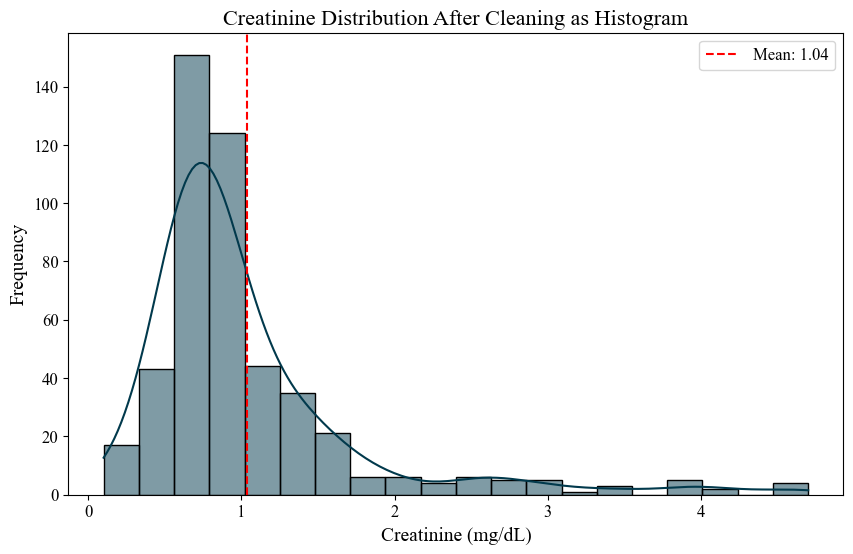

In [187]:
Series = pd.to_numeric(FullDataFrame['Creatinine (mg/dL)'], errors='coerce').dropna()

Mean_Creatinine = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Creatinine)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Creatinine Distribution After Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Creatinine (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Creatinine, color='red', linestyle='--', label=f'Mean: {Mean_Creatinine:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Creatinine Distribution After Cleaning as Histogram", dpi=300)

plt.show()

Mean: 194.60590631364562
Variance: 7185.826434432015


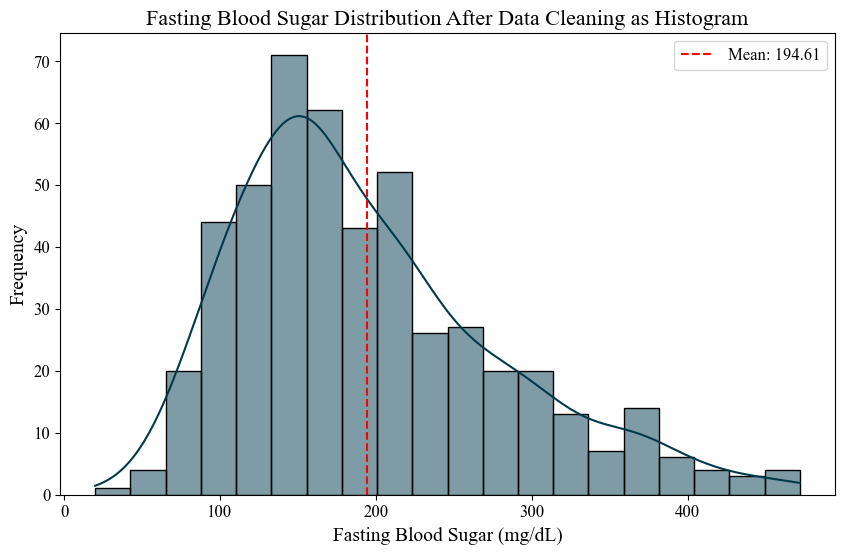

In [188]:
Series = pd.to_numeric(FullDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce').dropna()

Mean_FBS = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_FBS)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Fasting Blood Sugar Distribution After Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Fasting Blood Sugar (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_FBS, color='red', linestyle='--', label=f'Mean: {Mean_FBS:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Fasting Blood Sugar Distribution After Data Cleaning as Histogram")

plt.show()

Mean: 8.086625766871165
Variance: 4.187379779744541


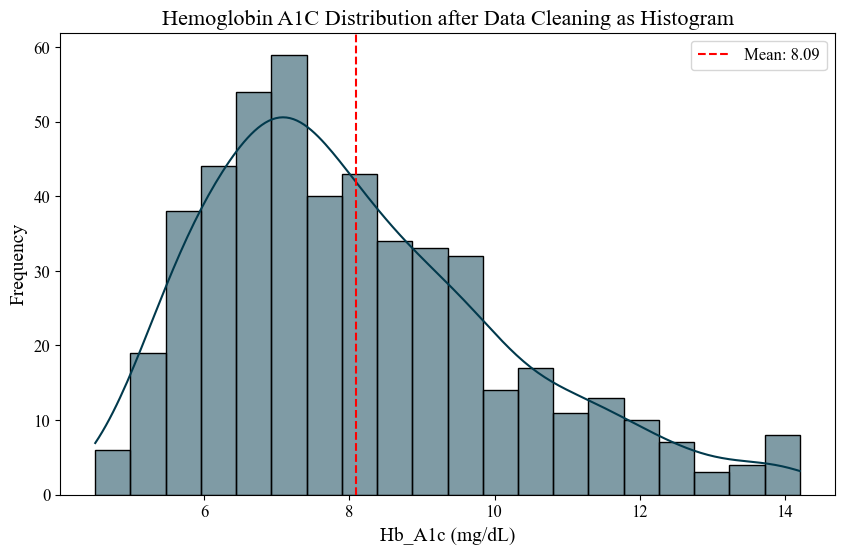

In [189]:
Series = pd.to_numeric(FullDataFrame['Hb_A1c (mg/dL)'], errors='coerce').dropna()

Mean_Hb_A1c = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Hb_A1c)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Hemoglobin A1C Distribution after Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Hb_A1c (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Hb_A1c, color='red', linestyle='--', label=f'Mean: {Mean_Hb_A1c:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Hemoglobin A1C Distribution after Data Cleaning as Histogram")

plt.show()

Mean: 50.009832635983265
Variance: 163.2311609782199


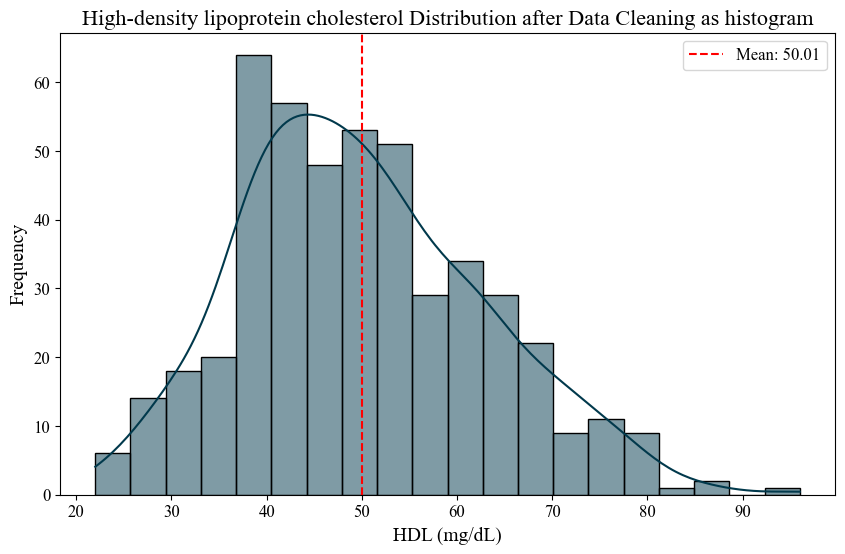

In [190]:
Series = pd.to_numeric(FullDataFrame['HDL (mg/dL)'], errors='coerce').dropna()

Mean_HDL = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_HDL)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('High-density lipoprotein cholesterol Distribution after Data Cleaning as histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('HDL (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_HDL, color='red', linestyle='--', label=f'Mean: {Mean_HDL:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("High-density lipoprotein cholesterol Distribution after Data Cleaning as histogram")

plt.show()

Mean: 55.48928571428571
Variance: 80.23406839245764


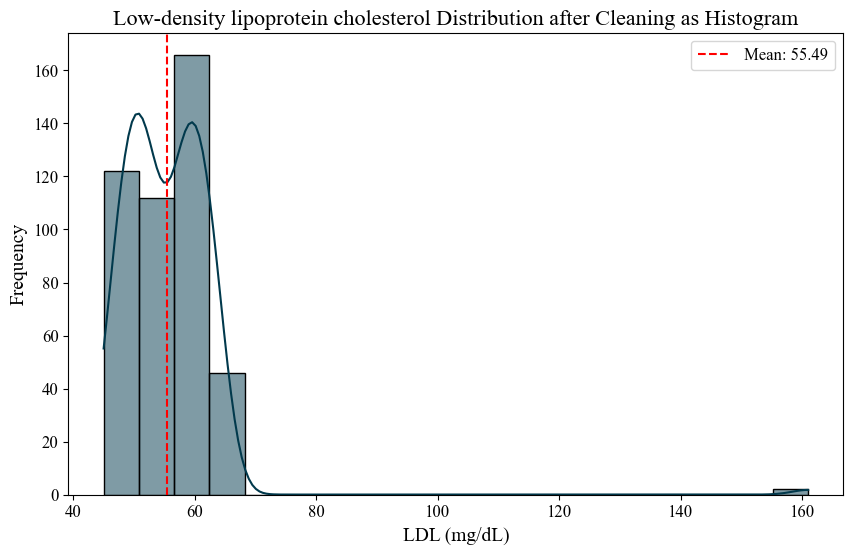

In [191]:
Series = pd.to_numeric(FullDataFrame['LDL (mg/dL)'], errors='coerce').dropna()

Mean_LDL = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_LDL)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Low-density lipoprotein cholesterol Distribution after Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('LDL (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_LDL, color='red', linestyle='--', label=f'Mean: {Mean_LDL:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Low-density lipoprotein cholesterol Distribution after Cleaning as Histogram")

plt.show()

In [192]:
FullDataFrame.isna().sum()

ID                               0
Sex                              0
Marital status                 134
Creatinine (mg/dL)              14
Creatinine status               14
Fasting Blood Sugar (mg/dL)      5
FBS status                       5
Hb_A1c (mg/dL)                   7
Hb_A1c status                    7
HDL (mg/dL)                     18
HDL status                      18
LDL (mg/dL)                     48
LDL status                      48
dtype: int64

In [193]:
FullDataFrame['Marital status'] = FullDataFrame['Marital status'].fillna('M')

In [194]:
FullDataFrame['Creatinine (mg/dL)'] = pd.to_numeric(FullDataFrame['Creatinine (mg/dL)']).fillna(Mean_Creatinine)

In [195]:
FullDataFrame['Creatinine status'] = FullDataFrame['Creatinine status'].fillna('Normal')
FullDataFrame.replace(to_replace = ["NaN"], value = 'Normal',inplace=True)

In [196]:
FullDataFrame['Fasting Blood Sugar (mg/dL)'] = pd.to_numeric(FullDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce').fillna(Mean_FBS)

In [197]:
FullDataFrame['FBS status'] = FullDataFrame['FBS status'].fillna('Normal')
FullDataFrame.replace(to_replace = ["NaN"], value = 'Normal',inplace=True)

In [198]:
FullDataFrame['Hb_A1c (mg/dL)'] = pd.to_numeric(FullDataFrame['Hb_A1c (mg/dL)'], errors='coerce').fillna(Mean_Hb_A1c)

In [199]:
FullDataFrame['Hb_A1c status'] = FullDataFrame['Hb_A1c status'].fillna('Normal')
FullDataFrame.replace(to_replace = ["NaN"], value = 'Normal',inplace=True)

In [200]:
FullDataFrame['HDL (mg/dL)'] = pd.to_numeric(FullDataFrame['HDL (mg/dL)'], errors='coerce').fillna(Mean_HDL)

In [201]:
FullDataFrame['HDL status'] = FullDataFrame['HDL status'].fillna('Normal')
FullDataFrame.replace(to_replace = ["NaN"], value = 'Normal',inplace=True)

In [202]:
FullDataFrame['LDL (mg/dL)'] = pd.to_numeric(FullDataFrame['LDL (mg/dL)'], errors='coerce').fillna(Mean_HDL)

In [203]:
FullDataFrame['LDL status'] = FullDataFrame['LDL status'].fillna('Normal')
FullDataFrame.replace(to_replace = ["NaN"], value = 'Normal',inplace=True)

In [204]:
gc.collect()

12983

### Scenario 1_Exploratory Data Analysis:

 #### Sex column:

In [207]:
print("Value counts for 'Sex':")
print(ModifiedDataFrame['Sex'].value_counts(dropna=False))

Value counts for 'Sex':
Sex
F    168
M    142
Name: count, dtype: int64


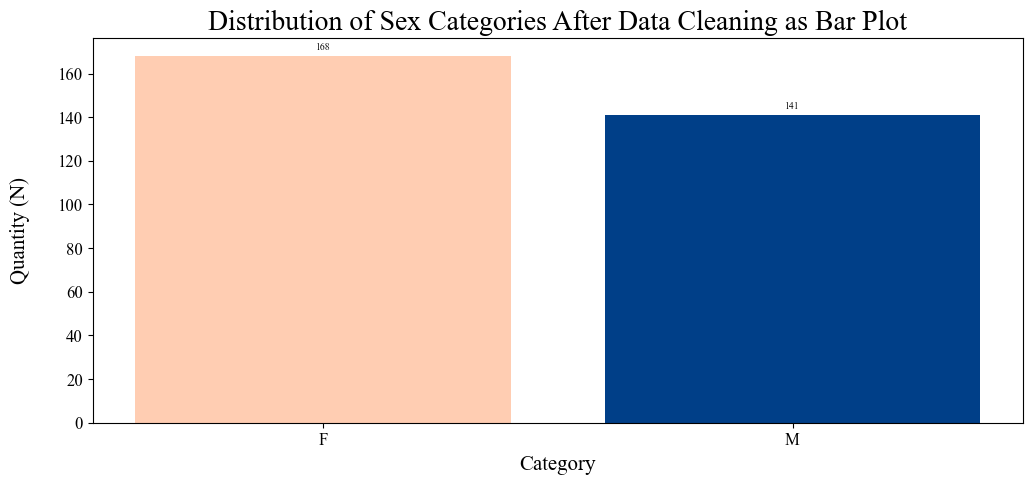

In [208]:
Keyword = [168,141]
Value = ['F', 'M',]

plt.figure(figsize=(12, 5))
ColorGroup = ['#ffcdb2', '#003f88']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 3, str(value), ha='center', fontsize=7)
 

plt.title('Distribution of Sex Categories After Data Cleaning as Bar Plot',fontname='Times New Roman', fontsize=20)
plt.xlabel('Category',fontname='Times New Roman', fontsize=15)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=15,labelpad=20)

plt.savefig("Distribution of Sex Categories After Data Cleaning.png", dpi=300)

plt.show()

#### Marital status column:

In [210]:
print("Value counts for 'Marital status':")
print(ModifiedDataFrame['Marital status'].value_counts(dropna=False))

Value counts for 'Marital status':
Marital status
M    254
W     46
S      7
D      3
Name: count, dtype: int64


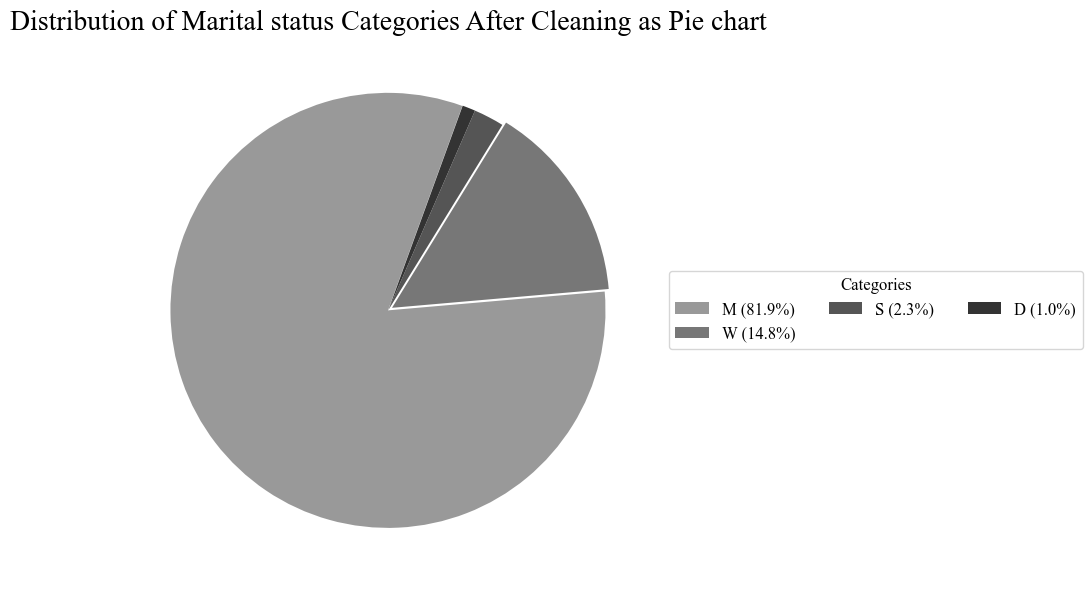

In [211]:
Keyword = [254 , 46, 7, 3]
Value = ['M', 'W', 'S', 'D']
Explode = [0.002, 0.02, 0,0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555', '#333333', '#111111']

plt.pie(Keyword, explode=Explode, startangle=70, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of Marital status Categories After Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Marital status Categories After Cleaning as Pie chart -309.png", dpi=300, bbox_inches='tight')

plt.show()

#### Creatinine column:

In [213]:
print("Value counts for 'Creatinine (mg/dL)':")
print(ModifiedDataFrame ['Creatinine (mg/dL)'].head(5))

Value counts for 'Creatinine (mg/dL)':
0    0.80
1    0.60
2    1.12
3    0.24
4    1.21
Name: Creatinine (mg/dL), dtype: float64


In [214]:
ModifiedDataFrame ['Creatinine (mg/dL)'].isna().sum()

0

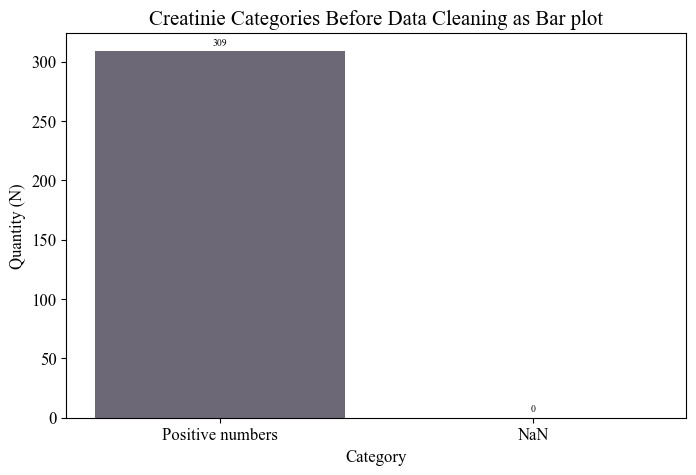

In [215]:
Keyword = [309, 0]
Value = ['Positive numbers', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 

plt.title('Creatinie Categories Before Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("Creatinie Categories Before Data Cleaning as Bar plot.png", dpi=300)

plt.show()

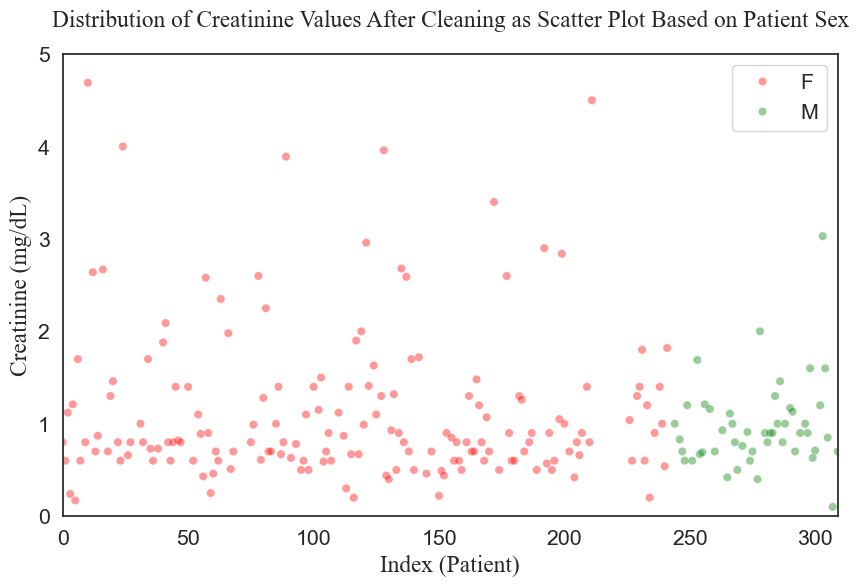

In [216]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(ModifiedDataFrame) - 1

ax = sns.scatterplot(data=ModifiedDataFrame , x=ModifiedDataFrame .index, y='Creatinine (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)


ax.set_title('Distribution of Creatinine Values After Cleaning as Scatter Plot Based on Patient Sex', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Creatinine (mg/dL)', fontname='Times New Roman')

plt.xlim([0, index])
plt.ylim(top=5, bottom=0)
plt.legend()
plt.savefig("Distribution of Creatinie Values After Cleaning as Scatter Plot Based on Patient Sex-309", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3681525468.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['Creatinine (mg/dL)'].apply(categorize_threshold)


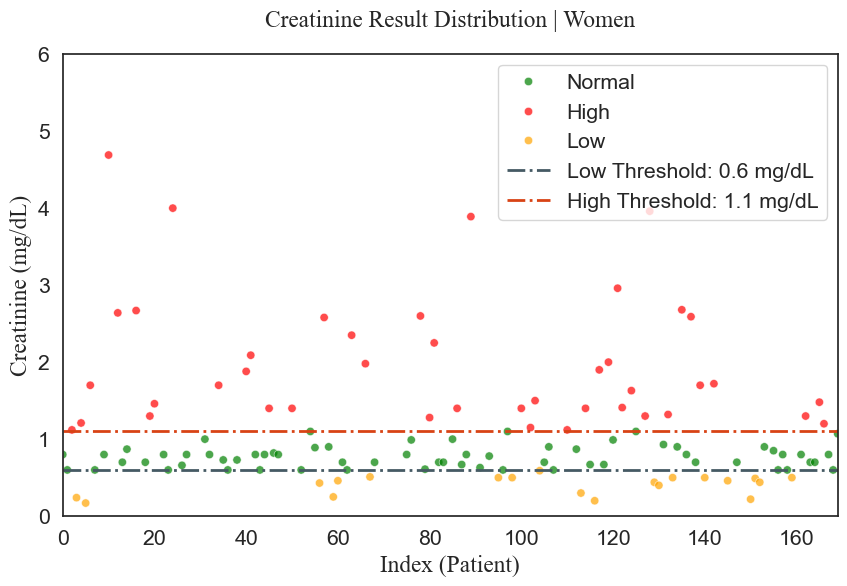

In [217]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

ModifiedDataFrame_FemalData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'F']

low_threshold = 0.6
high_threshold = 1.1

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['Creatinine (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}

ax = sns.scatterplot(data=ModifiedDataFrame_FemalData, x=ModifiedDataFrame_FemalData.index, y='Creatinine (mg/dL)',
                     hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#455A64', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')
plt.axhline(y=high_threshold, color='#D84315', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')

ax.set_title('Creatinine Result Distribution | Women', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Creatinine (mg/dL)', fontname='Times New Roman')

plt.xlim([0, len(ModifiedDataFrame_FemalData) + 1])
plt.ylim(top=6, bottom=0)
plt.legend()
plt.savefig("Creatinine Result Distribution Women310.png", dpi=300)
plt.show()

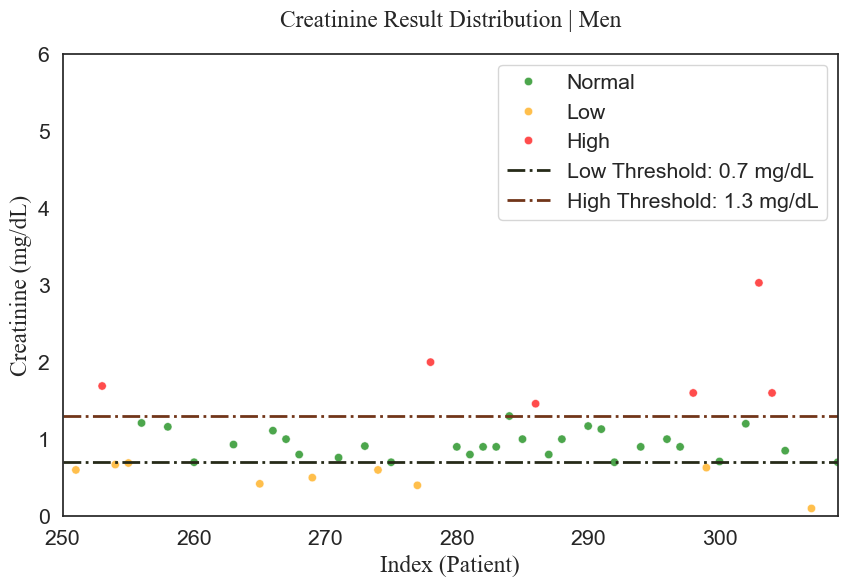

In [218]:
sns.set_theme(style="white", font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

index = len(ModifiedDataFrame) - 1

if 'Creatinine (mg/dL)' not in ModifiedDataFrame.columns:
    raise ValueError("Column 'Creatinine (mg/dL)' not found in the DataFrame!")

ModifiedDataFrame_MenData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'M'].copy()  # Avoid SettingWithCopyWarning

low_threshold = 0.7
high_threshold = 1.3

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_MenData.loc[:, 'Threshold'] = ModifiedDataFrame_MenData['Creatinine (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=ModifiedDataFrame_MenData, x=ModifiedDataFrame_MenData.index, y='Creatinine (mg/dL)',
                     hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')

ax.set_title('Creatinine Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Creatinine (mg/dL)', fontname='Times New Roman')

plt.xlim([250, max(250, index)])
plt.ylim([0, 6])
plt.legend()
plt.savefig("Creatinine Result Distribution Men310.png", dpi=300)
plt.show()

Mean: 1.0456774193548386
Variance: 0.5273980833072338


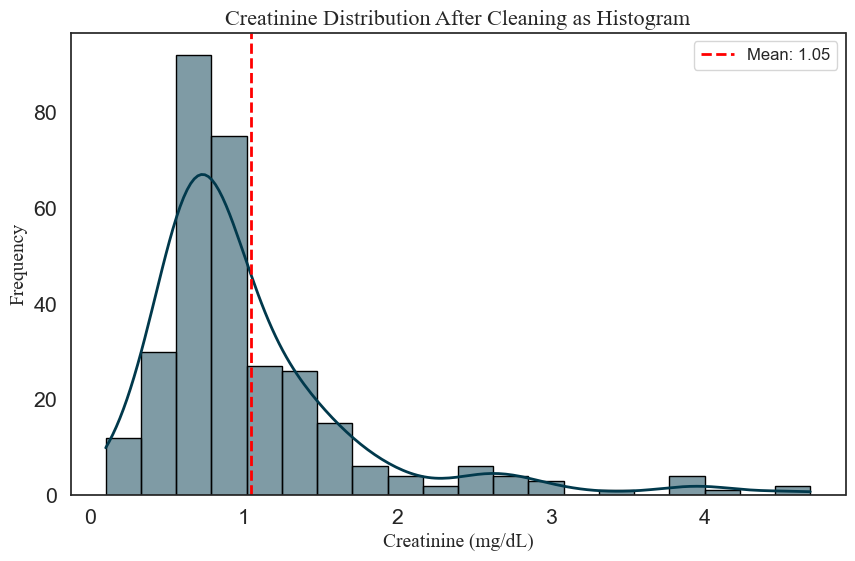

In [219]:
Series = pd.to_numeric(ModifiedDataFrame['Creatinine (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Creatinine Distribution After Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Creatinine (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Creatinine Distribution After Cleaning as Histogram", dpi=300)
plt.show()

In [220]:
print("Value counts for 'Creatinine status':")
print(ModifiedDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine status':
Creatinine status
Normal    122
High      106
Low        82
Name: count, dtype: int64


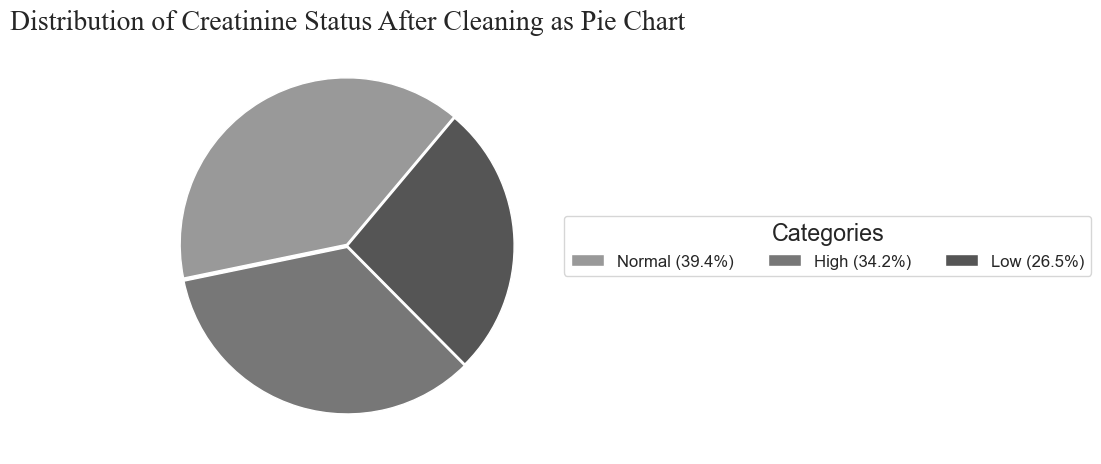

In [221]:
Keyword = [122, 106, 82]
Value = ['Normal', 'High', 'Low']
Explode = [0.01, 0.01, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]


legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555']
               
plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of Creatinine Status After Cleaning as Pie Chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Creatinine Status After Cleaning as Pie Chart -309", dpi=300, bbox_inches='tight')
plt.show()

#### Fasting Blood Sugar:

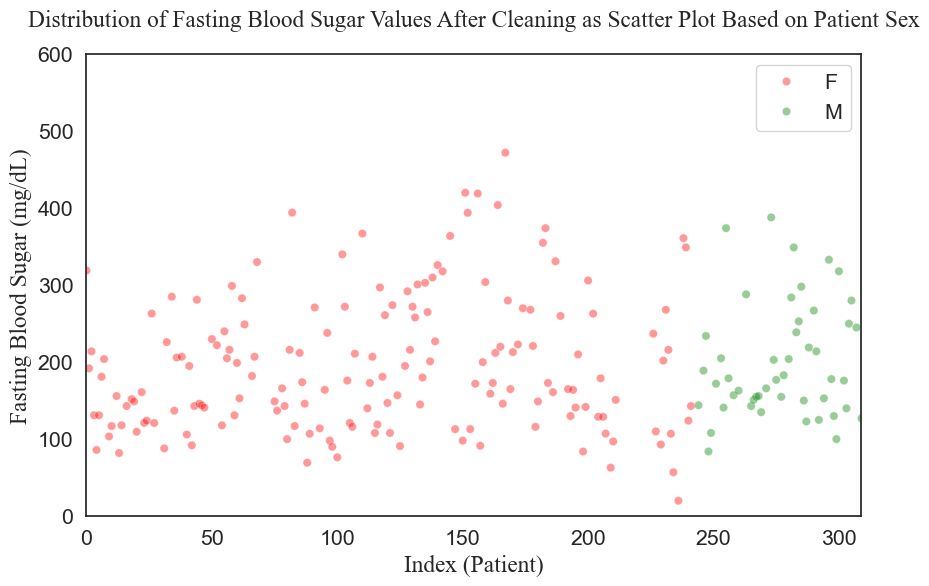

In [223]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(ModifiedDataFrame) - 1

ax = sns.scatterplot(data=ModifiedDataFrame, x=ModifiedDataFrame.index, y='Fasting Blood Sugar (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of Fasting Blood Sugar Values After Cleaning as Scatter Plot Based on Patient Sex', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Fasting Blood Sugar (mg/dL)', fontname='Times New Roman')

plt.xlim([0, index])
plt.ylim(top=600, bottom=0)
plt.legend()
plt.savefig("Distribution of Fasting Blood Sugar Values After Cleaning as Scatter Plot Based on Patient Sex-309", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3270354748.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)


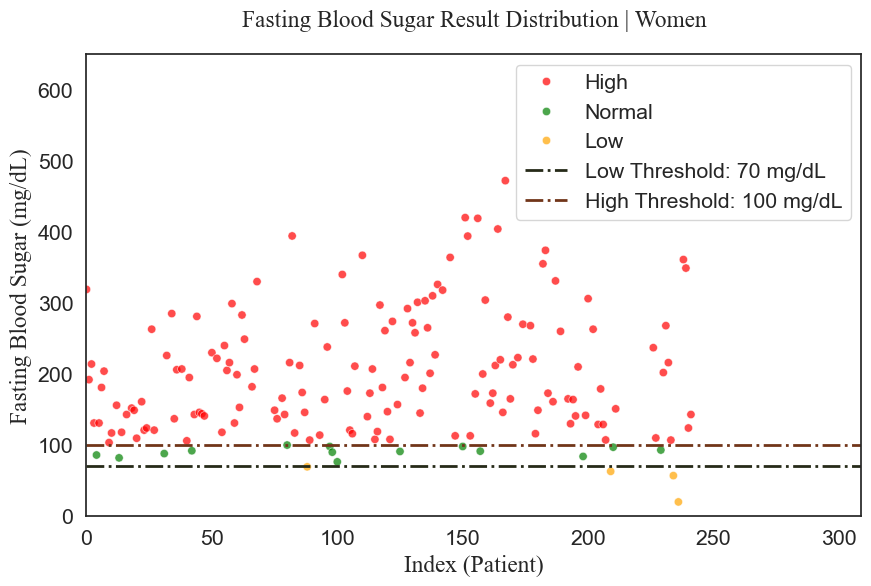

In [224]:
sns.set_theme(style="white", font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

ModifiedDataFrame_FemalData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'F']

low_threshold = 70
high_threshold = 100

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'} 

ax = sns.scatterplot(data=ModifiedDataFrame_FemalData, x=ModifiedDataFrame_FemalData.index, y='Fasting Blood Sugar (mg/dL)',
                     hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('Fasting Blood Sugar Result Distribution | Women', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Fasting Blood Sugar (mg/dL)', fontname='Times New Roman')

plt.xlim([0, index])
plt.ylim(top= 650, bottom=0)
plt.legend()
plt.savefig("Fasting Blood_Sugar Result_Distribution Women310.png", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3908320327.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)


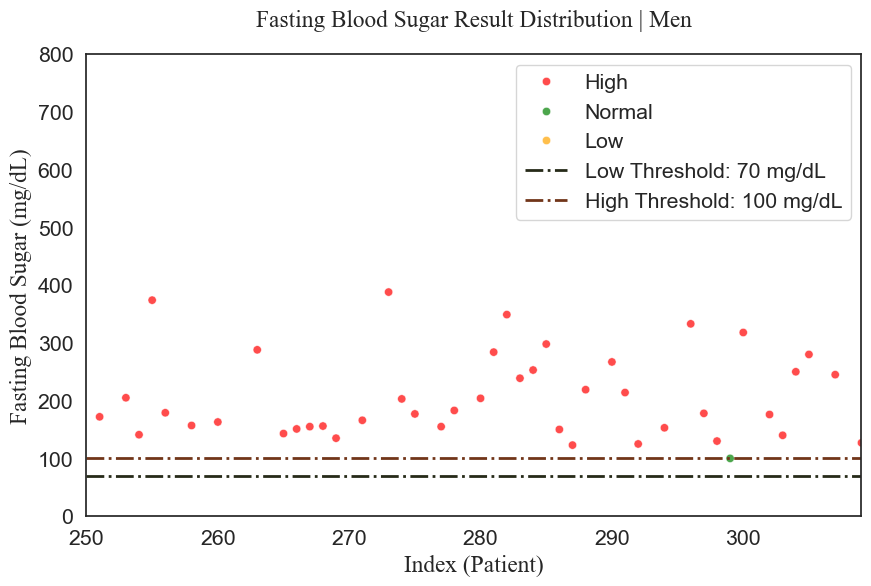

In [225]:
sns.set_theme(style="white", font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

ModifiedDataFrame_MenData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'M']

low_threshold = 70
high_threshold = 100

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=ModifiedDataFrame_MenData, x=ModifiedDataFrame_MenData.index, y='Fasting Blood Sugar (mg/dL)',
                     hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL') 

ax.set_title('Fasting Blood Sugar Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Fasting Blood Sugar (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim([0, 800])  
plt.legend()
plt.savefig("Fasting Blood Sugar Result Distribution Men310.png", dpi=300)
plt.show()

Mean: 193.45290322580647
Variance: 6961.299910637848


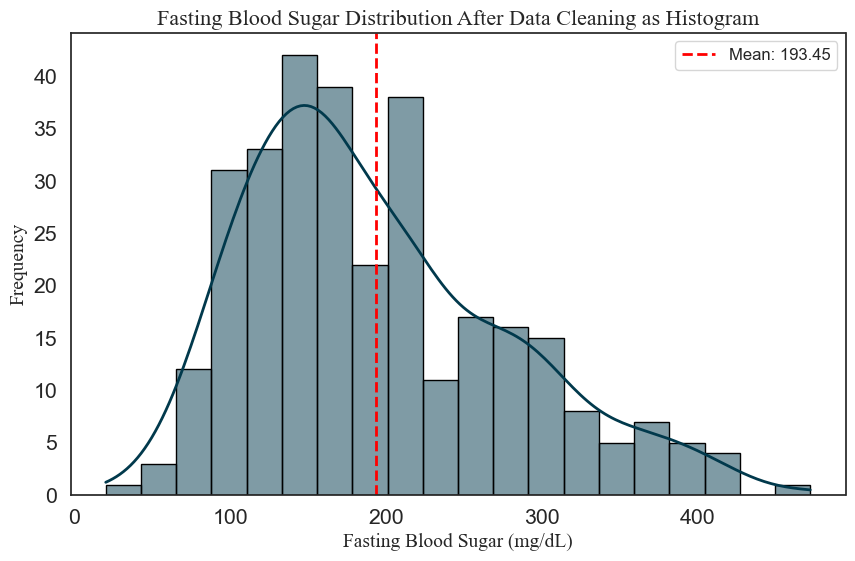

In [226]:
Series = pd.to_numeric(ModifiedDataFrame['Fasting Blood Sugar (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Fasting Blood Sugar Distribution After Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Fasting Blood Sugar (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Fasting Blood Sugar Distribution After Data Cleaning as Histogram", dpi=300)
plt.show()

In [227]:
ModifiedDataFrame['FBS status'].value_counts()

FBS status
High      264
Normal     38
Low         8
Name: count, dtype: int64

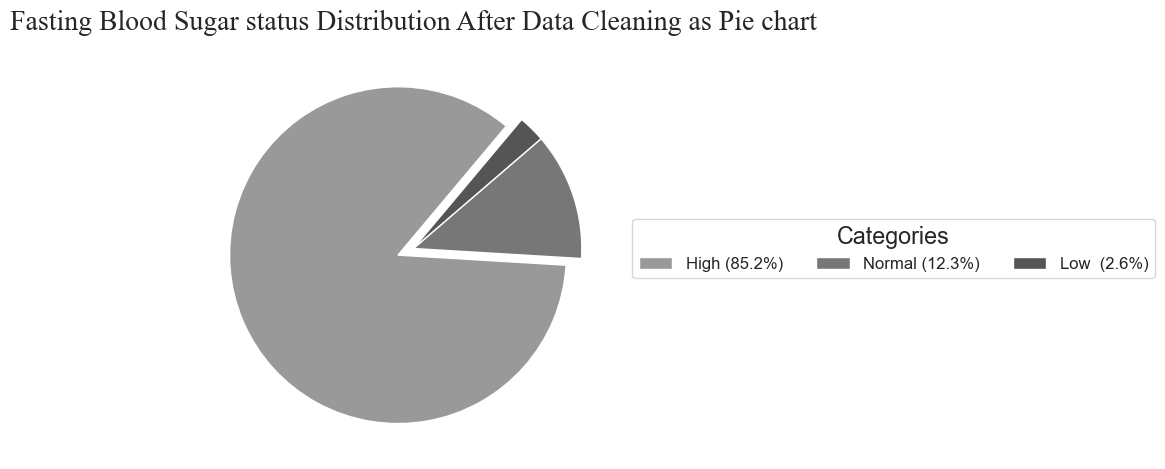

In [228]:
Keyword = [264, 38, 8]
Value = ['High', 'Normal', 'Low ']
Explode = [0.1, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555']
               
plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Fasting Blood Sugar status Distribution After Data Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Fasting Blood Sugar status Distribution After Data Cleaning as Pie chart- 309", dpi=300, bbox_inches='tight')
plt.show()

#### Hemoglobin A1C:

In [230]:
ModifiedDataFrame['Hb_A1c (mg/dL)'].isna().sum()

0

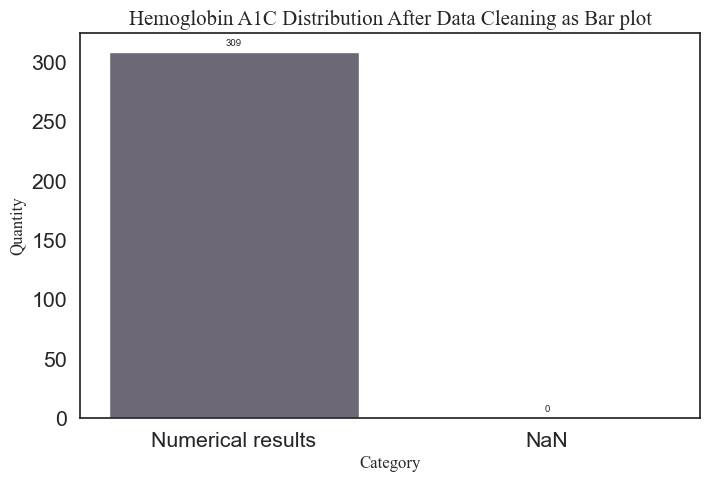

In [231]:
Keyword = [309, 0]
Value = ['Numerical results','NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681' ]

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)

plt.title('Hemoglobin A1C Distribution After Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity',fontname='Times New Roman', fontsize=12)
plt.savefig("Hemoglobin A1C Distribution After Data Cleaning as Bar plot", dpi=300)
plt.show()

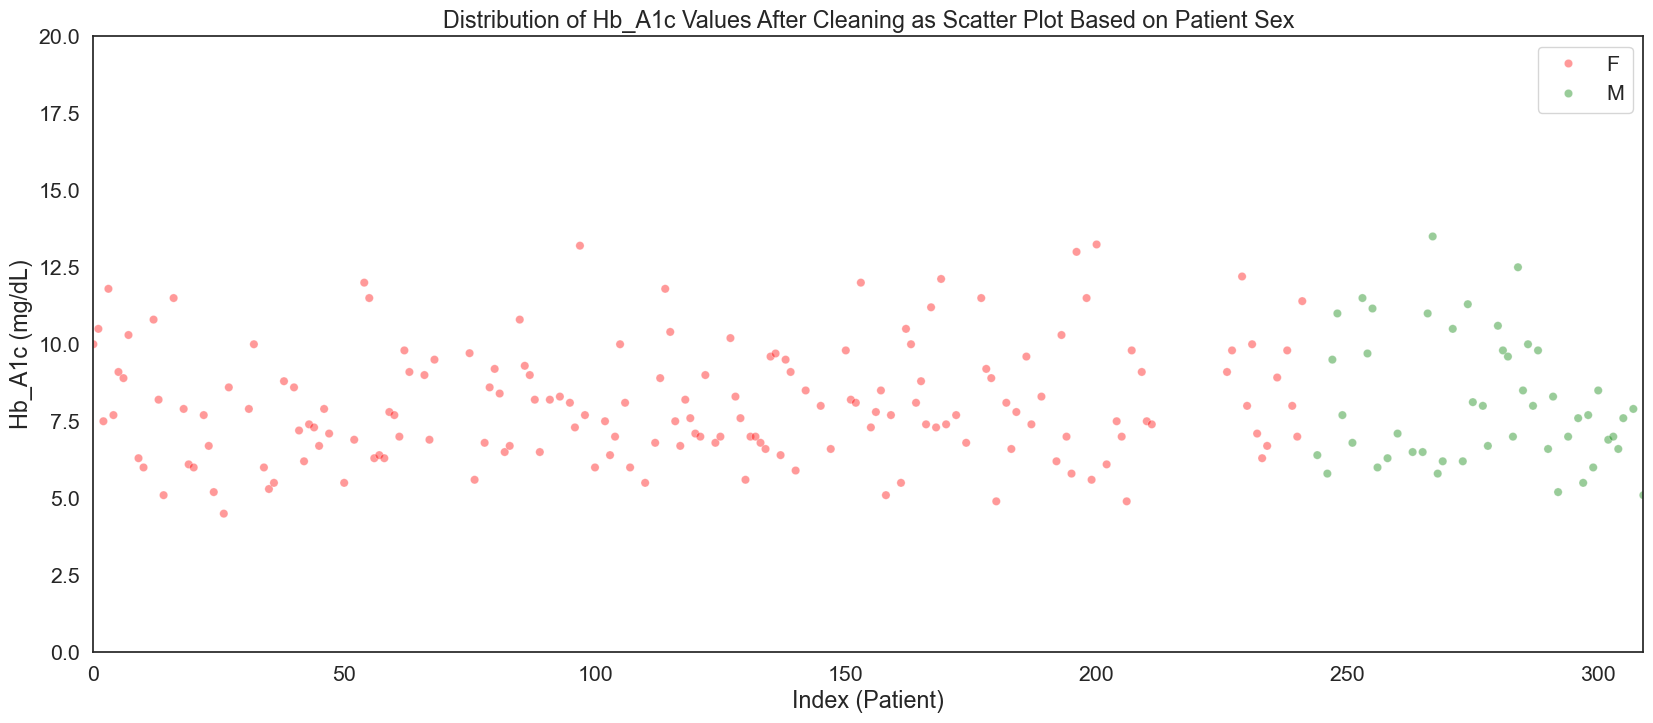

In [232]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))
index = len(ModifiedDataFrame) - 1

ax = sns.scatterplot(data=ModifiedDataFrame, x=ModifiedDataFrame.index, y='Hb_A1c (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of Hb_A1c Values After Cleaning as Scatter Plot Based on Patient Sex')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('Hb_A1c (mg/dL)')

plt.xlim([0, index])
plt.ylim(top=20, bottom=0)
plt.legend()
plt.savefig("Distribution of Hb_A1c Values After Cleaning as Scatter Plot Based on Patient Sex-309", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1825987770.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['Hb_A1c (mg/dL)'].apply(categorize_threshold)


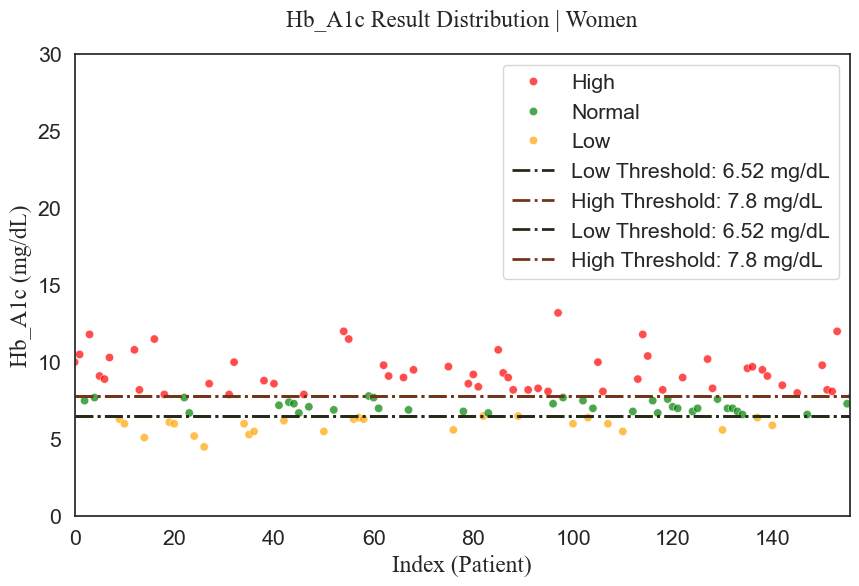

In [233]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = ((len(ModifiedDataFrame) + 1 )/ 2)

ModifiedDataFrame_FemalData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'F']

low_threshold = 6.52
high_threshold = 7.8

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['Hb_A1c (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=ModifiedDataFrame_FemalData, x=ModifiedDataFrame_FemalData.index, 
                     y='Hb_A1c (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')

ax.set_title('Hb_A1c Result Distribution | Women', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Hb_A1c (mg/dL)', fontname='Times New Roman')

plt.xlim([0, index])
plt.ylim([0, 30])  
plt.legend()
plt.savefig("Hb_A1c Result Distribution - Women310", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1393676471.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['Hb_A1c (mg/dL)'].apply(categorize_threshold)


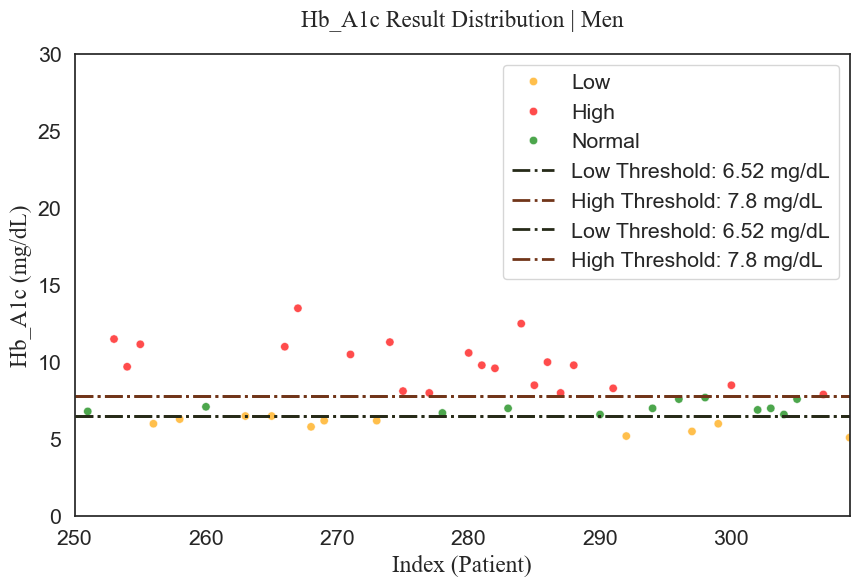

In [234]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(ModifiedDataFrame) - 1

ModifiedDataFrame_MenData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'M']

low_threshold = 6.52
high_threshold = 7.8

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['Hb_A1c (mg/dL)'].apply(categorize_threshold)
palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=ModifiedDataFrame_MenData, x=ModifiedDataFrame_MenData.index, 
                     y='Hb_A1c (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')

ax.set_title('Hb_A1c Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Hb_A1c (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim([0, 30])  
plt.legend()
plt.savefig("Hb_A1c Result Distribution - Men310", dpi=300)
plt.show()

Mean: 8.131903225806452
Variance: 3.8415546184361635


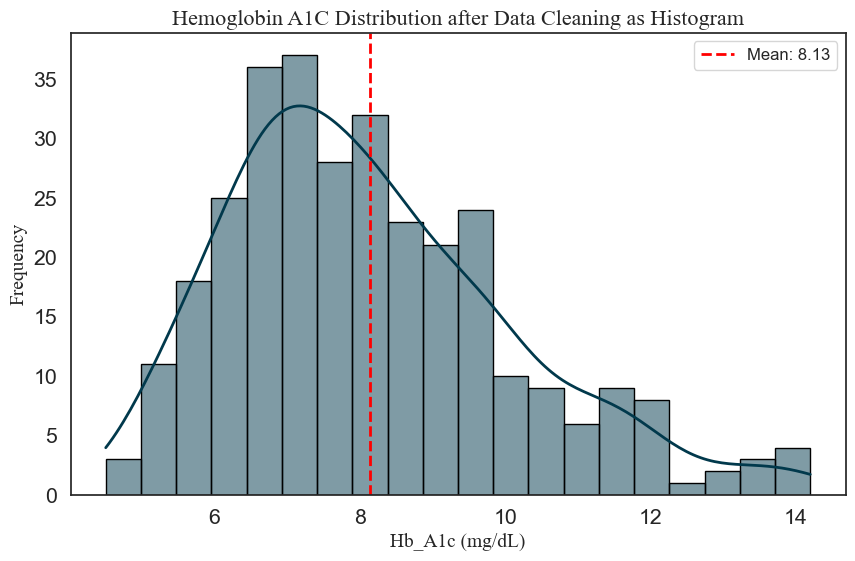

In [235]:
Series = pd.to_numeric(ModifiedDataFrame['Hb_A1c (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Hemoglobin A1C Distribution after Data Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('Hb_A1c (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Hemoglobin A1C Distribution after Data Cleaning as Histogram", dpi=300)

plt.show()

#### Hemoglobin A1C status:

In [237]:
print("Value counts for 'Hb_A1c status':")
print(ModifiedDataFrame['Hb_A1c status'].value_counts(dropna=False))

Value counts for 'Hb_A1c status':
Hb_A1c status
High      165
Normal    145
Name: count, dtype: int64


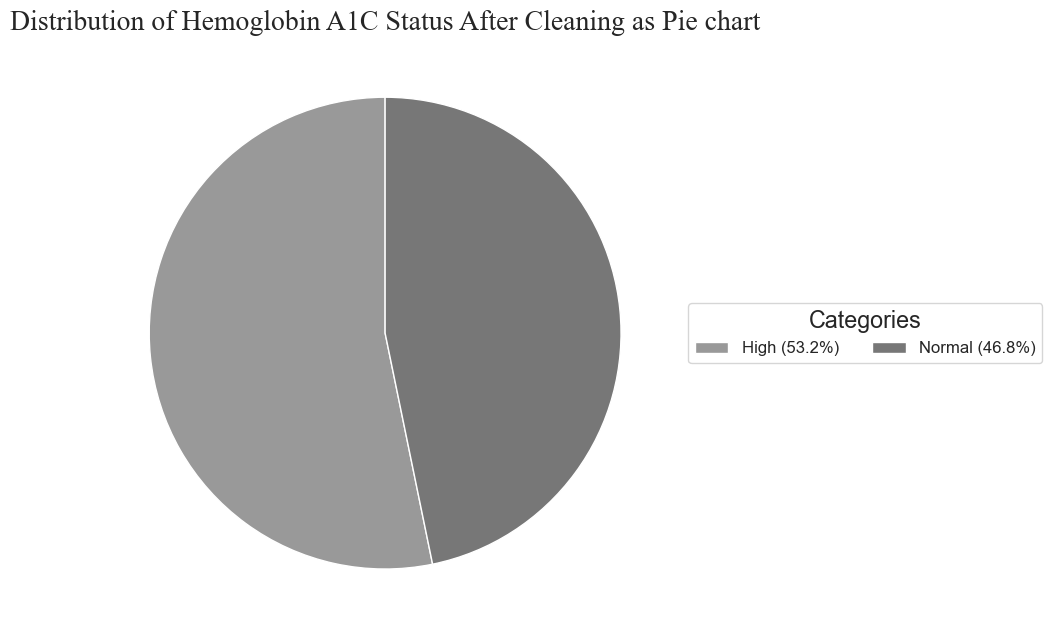

In [238]:
Keyword = [165, 145]
Value = ['High', 'Normal']
Explode = [0,0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]


legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  

Colors_list = ['#999999', '#777777']

plt.pie(Keyword, explode=Explode, startangle=90, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of Hemoglobin A1C Status After Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Hemoglobin A1C Status After Cleaning as Pie chart -309", dpi=300, bbox_inches='tight')

plt.show()

#### HDL: 

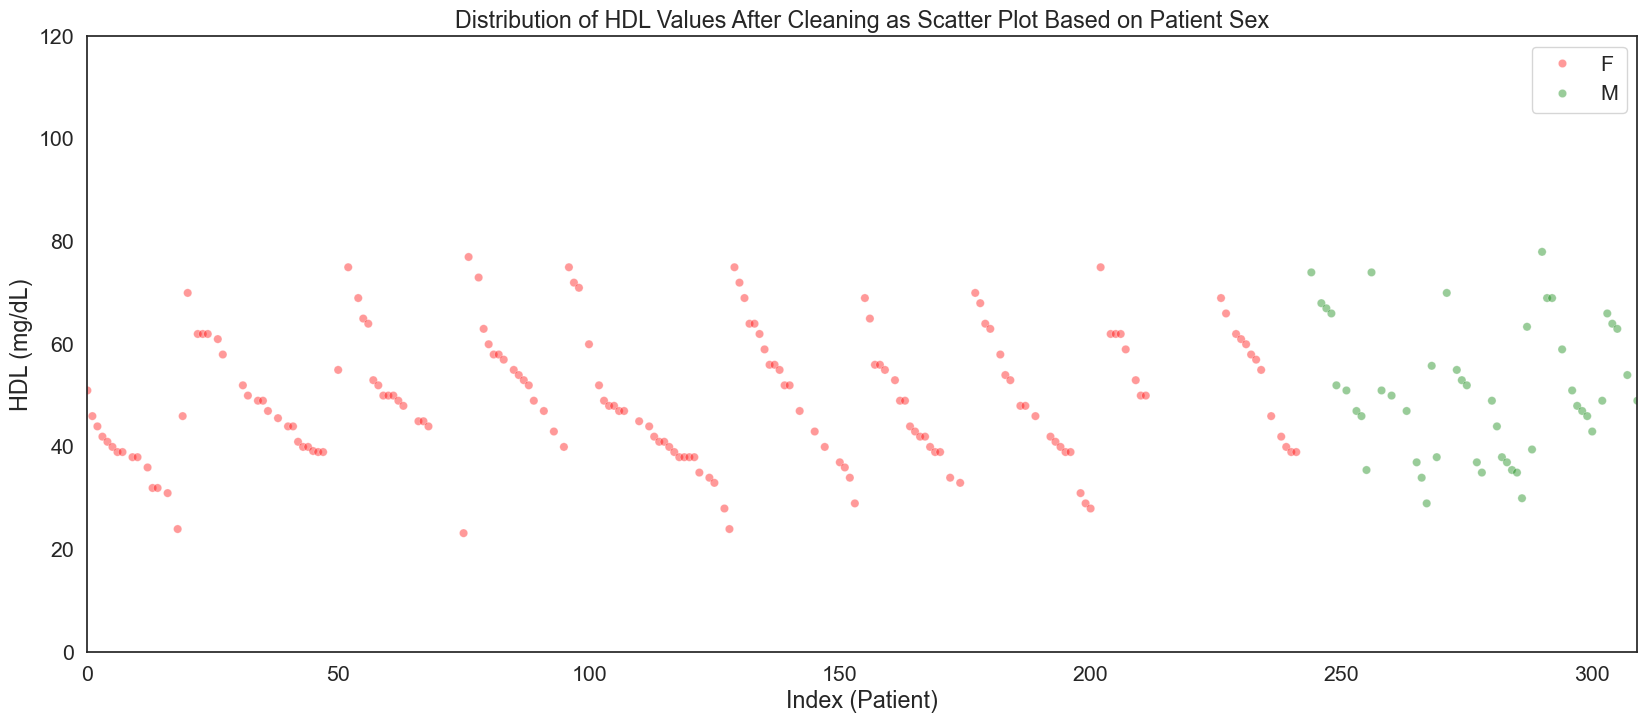

In [240]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))
index = len(ModifiedDataFrame) - 1

ax = sns.scatterplot(data=ModifiedDataFrame, x=ModifiedDataFrame.index, y='HDL (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of HDL Values After Cleaning as Scatter Plot Based on Patient Sex')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('HDL (mg/dL)')

plt.xlim([0, index])
plt.ylim(top=120, bottom=0)
plt.legend()
plt.savefig("Distribution of High-density lipoprotein cholesterol Values After Cleaning as Scatter Plot Based on Patient Sex -309", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\829659371.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['HDL (mg/dL)'].apply(categorize_threshold)


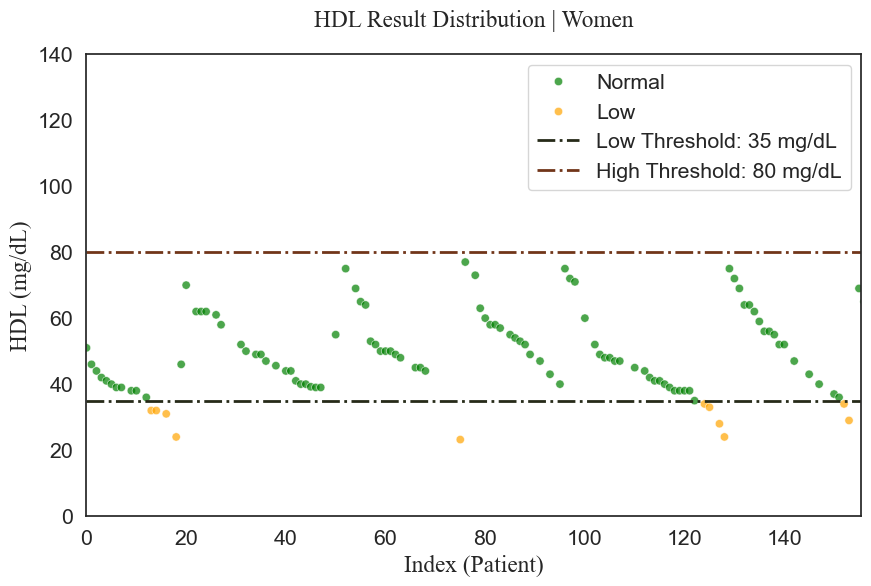

In [241]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = ((len(ModifiedDataFrame) + 1 )/ 2)

ModifiedDataFrame_FemalData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'F']

low_threshold = 35
high_threshold = 80

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['HDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'} 

ax = sns.scatterplot(data=ModifiedDataFrame_FemalData, x=ModifiedDataFrame_FemalData.index, 
                     y='HDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('HDL Result Distribution | Women', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('HDL (mg/dL)', fontname='Times New Roman')

plt.xlim([0, index])
plt.ylim(top= 140, bottom=0) 

# Add legend and save the plot
plt.legend()
plt.savefig("HDL Result Distribution - Women310", dpi=300)

# Show the plot
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1190527266.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['HDL (mg/dL)'].apply(categorize_threshold)


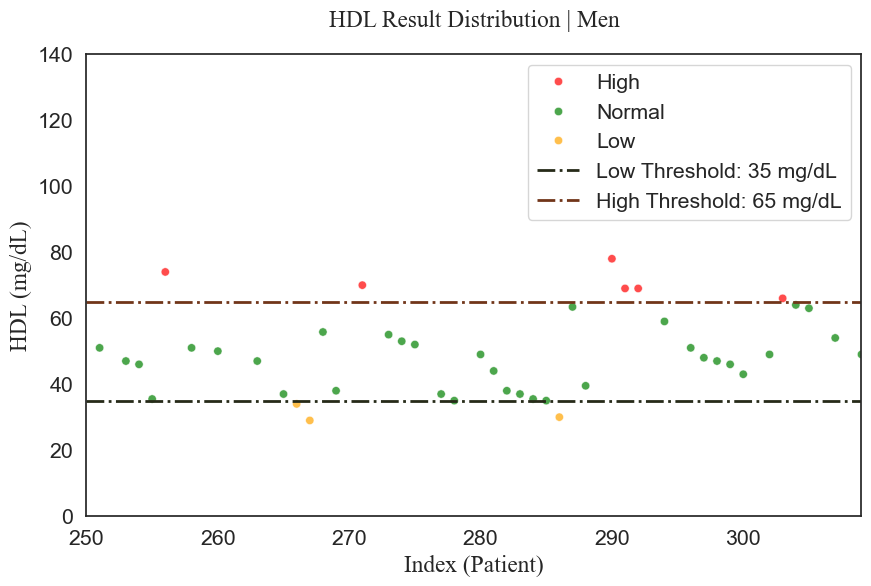

In [242]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(ModifiedDataFrame) - 1

ModifiedDataFrame_FemalData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'M']

low_threshold = 35
high_threshold = 65

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['HDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'} 

ax = sns.scatterplot(data=ModifiedDataFrame_MenData, x=ModifiedDataFrame_MenData.index, 
                     y='HDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('HDL Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('HDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 140, bottom=0) 
plt.legend()
plt.savefig("HDL Result Distribution - Men310", dpi=300)
plt.show()

Mean: 50.3716129032258
Variance: 150.76119803737333


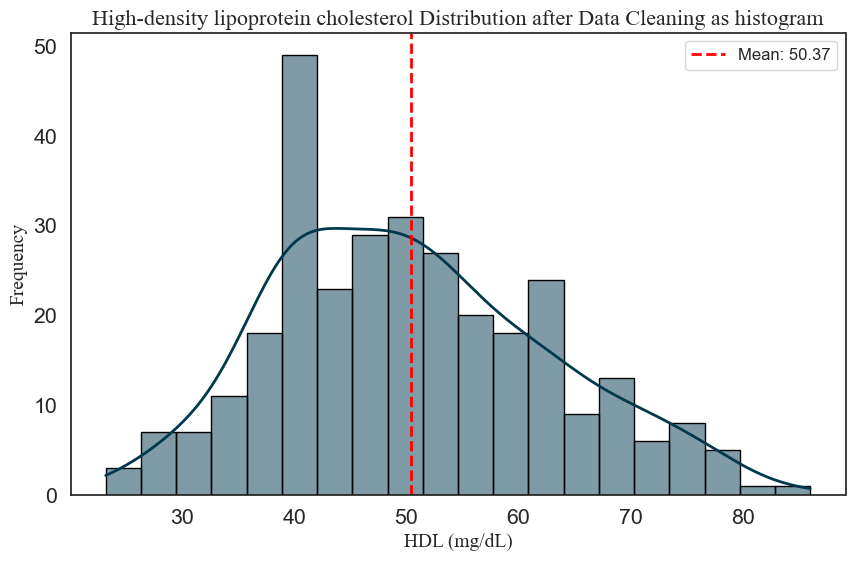

In [243]:
Series = pd.to_numeric(ModifiedDataFrame['HDL (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('High-density lipoprotein cholesterol Distribution after Data Cleaning as histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('HDL (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("High-density lipoprotein cholesterol Distribution after Data Cleaning as histogram", dpi=300)

plt.show()

In [244]:
ModifiedDataFrame['HDL (mg/dL)'].isna().sum()

0

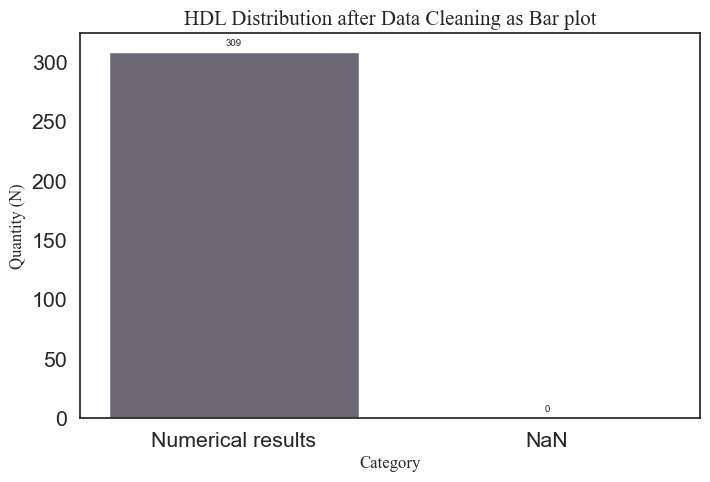

In [245]:
Keyword = [309, 0]
Value = ['Numerical results','NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 

plt.title('HDL Distribution after Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("HDL Distribution after Data Cleaning as Bar plot", dpi=300)

plt.show()

#### HDL status:

In [247]:
ModifiedDataFrame['HDL status'].value_counts()

HDL status
Normal    260
low        26
High       24
Name: count, dtype: int64

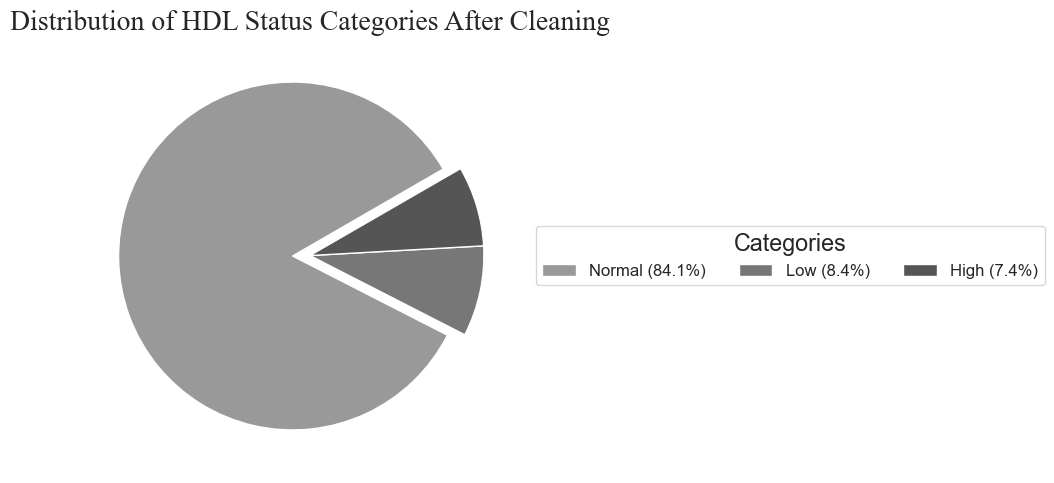

In [248]:
Keyword = [260, 26, 23]
Value = ['Normal', 'Low', 'High']
Explode = [0.1, 0,0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]


legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555', '#333333']
               

plt.pie(Keyword, explode=Explode, startangle=30, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of HDL Status Categories After Cleaning",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of HDL Status Categories After Cleaning -310", dpi=300, bbox_inches='tight')

plt.show()

#### LDL:

In [250]:
ModifiedDataFrame['LDL (mg/dL)'].isna().sum()

0

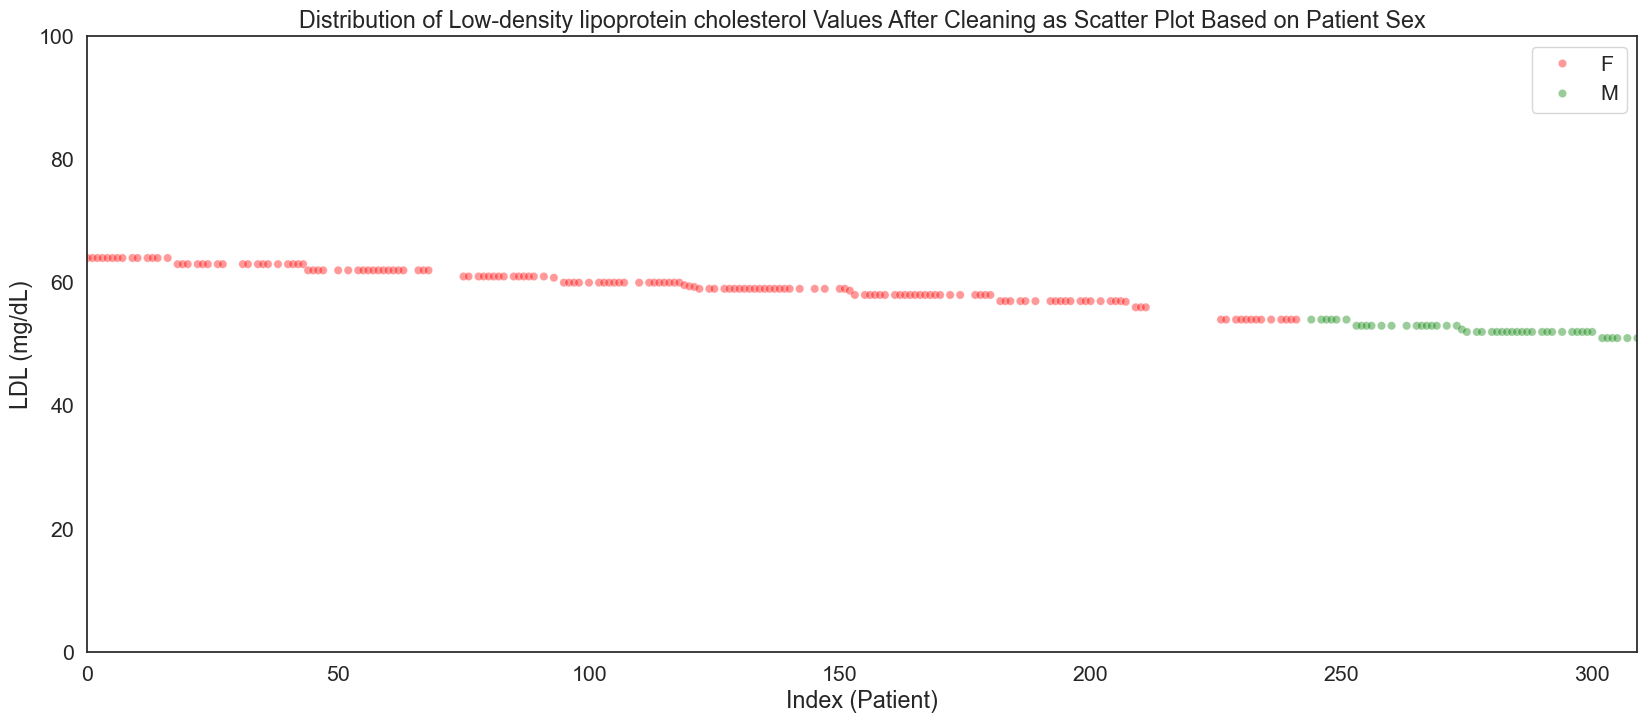

In [251]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))
index = len(ModifiedDataFrame) - 1
ax = sns.scatterplot(data=ModifiedDataFrame, x=ModifiedDataFrame.index, y='LDL (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of Low-density lipoprotein cholesterol Values After Cleaning as Scatter Plot Based on Patient Sex')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('LDL (mg/dL)')

plt.xlim([0, index])
plt.ylim(top=100, bottom=0)

plt.legend()
plt.savefig("Distribution of Low-density lipoprotein cholesterol Values After Cleaning as Scatter Plot Based on Patient Sex -309", dpi=300)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\4149672691.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['LDL (mg/dL)'].apply(categorize_threshold)


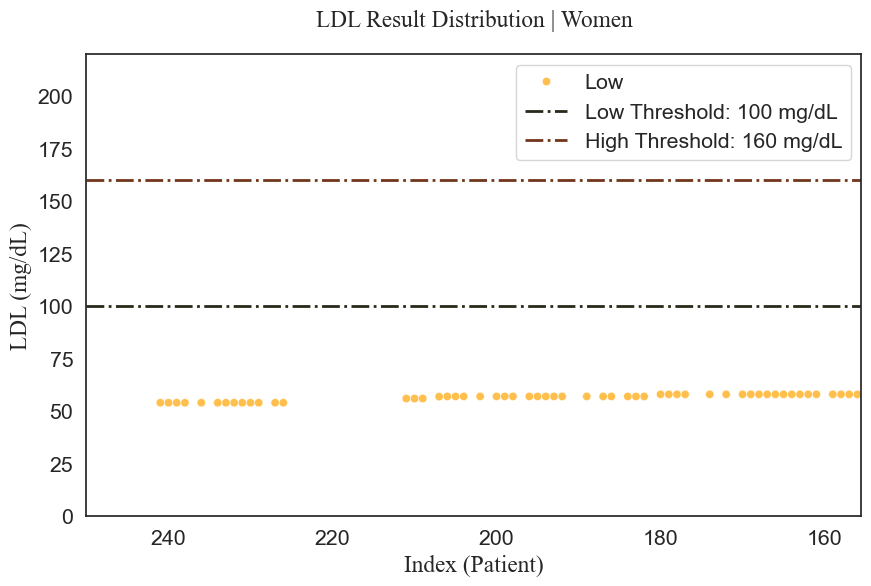

In [252]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = ((len(ModifiedDataFrame) + 1 )/ 2)

ModifiedDataFrame_FemalData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'F']

low_threshold = 100
high_threshold = 160

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_FemalData['Threshold'] = ModifiedDataFrame_FemalData['LDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'} 

ax = sns.scatterplot(data=ModifiedDataFrame_FemalData, x=ModifiedDataFrame_FemalData.index, 
                     y='LDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('LDL Result Distribution | Women', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('LDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 220, bottom=0) 

plt.legend()
plt.savefig("LDL Result Distribution - Women310", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3513942972.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['LDL (mg/dL)'].apply(categorize_threshold)


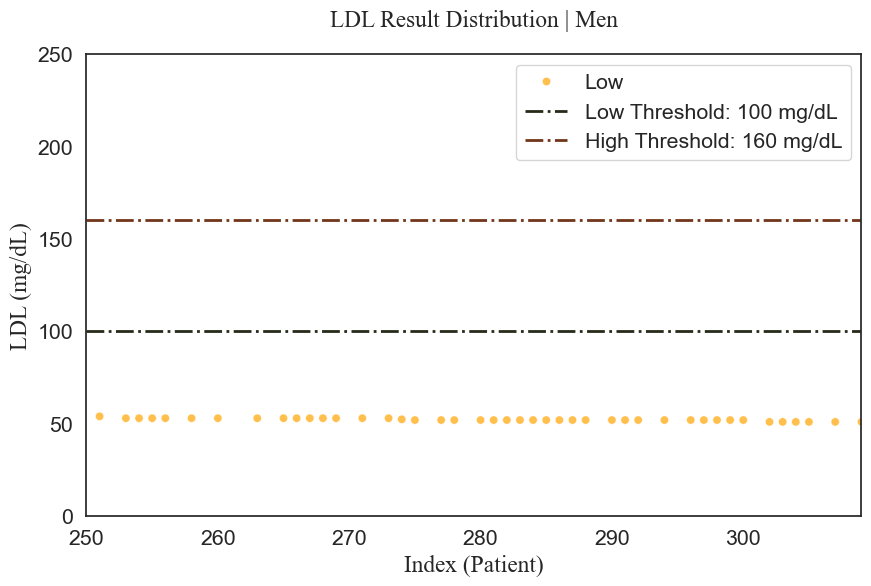

In [253]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(ModifiedDataFrame) - 1

ModifiedDataFrame_MenData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'M']

low_threshold = 100
high_threshold = 160

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

ModifiedDataFrame_MenData['Threshold'] = ModifiedDataFrame_MenData['LDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=ModifiedDataFrame_MenData, x=ModifiedDataFrame_MenData.index, 
                     y='LDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('LDL Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('LDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 250, bottom=0) 
plt.legend()
plt.savefig("LDL Result Distribution - Men310", dpi=300)
plt.show()

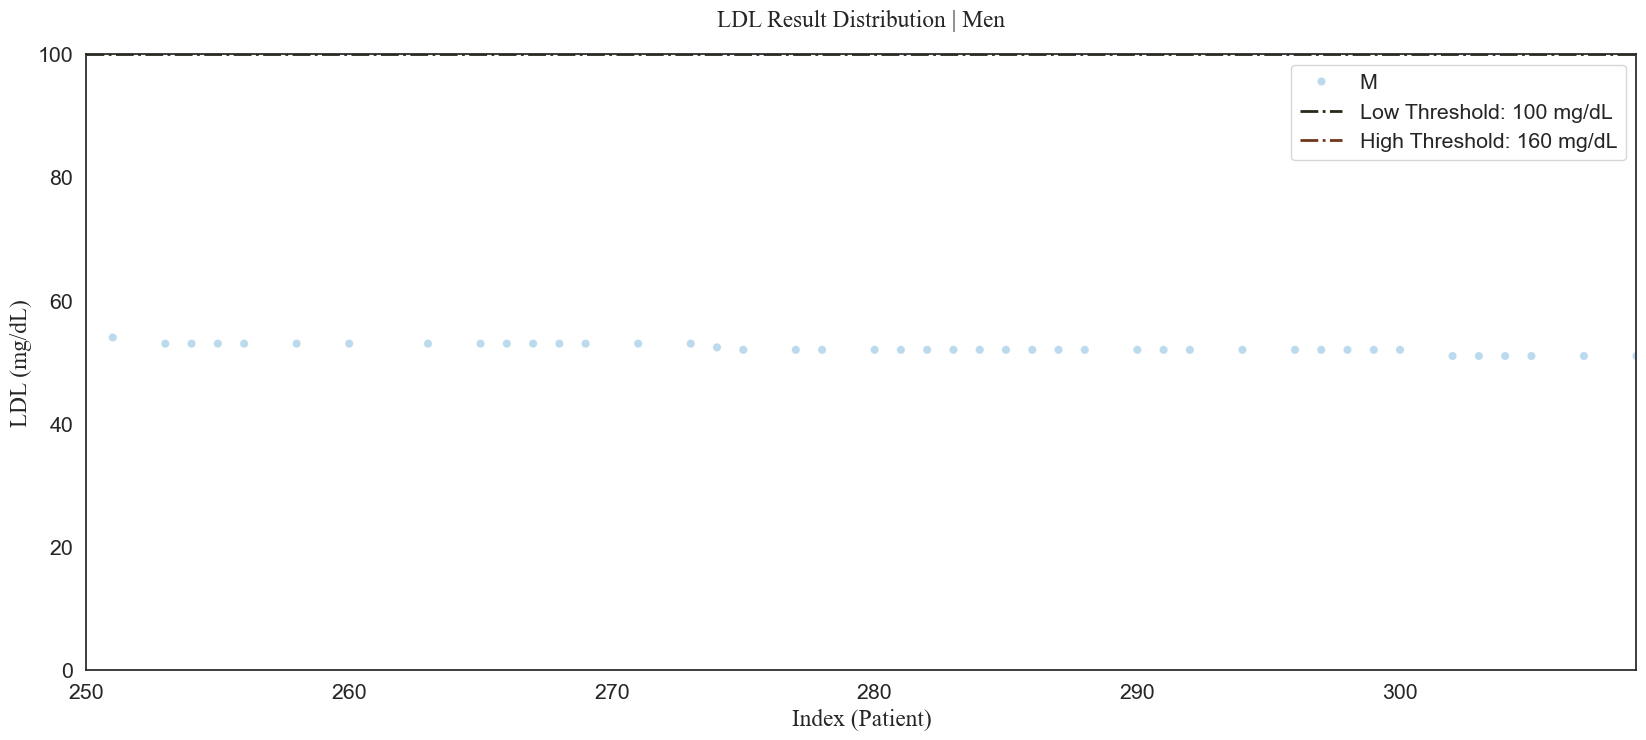

In [254]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))

ModifiedDataFrame_MenData = ModifiedDataFrame[ModifiedDataFrame['Sex'] == 'M']

low_threshold = 100
high_threshold = 160

ax = sns.scatterplot(data=ModifiedDataFrame_MenData, x=ModifiedDataFrame_MenData.index, y='LDL (mg/dL)',
                     hue='Sex', palette=dict(M="#56A3D4"), alpha=0.4)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')

ax.set_title('LDL Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('LDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 100, bottom=0)
plt.legend()
plt.show()

Mean: 55.13258064516128
Variance: 31.211200438459127


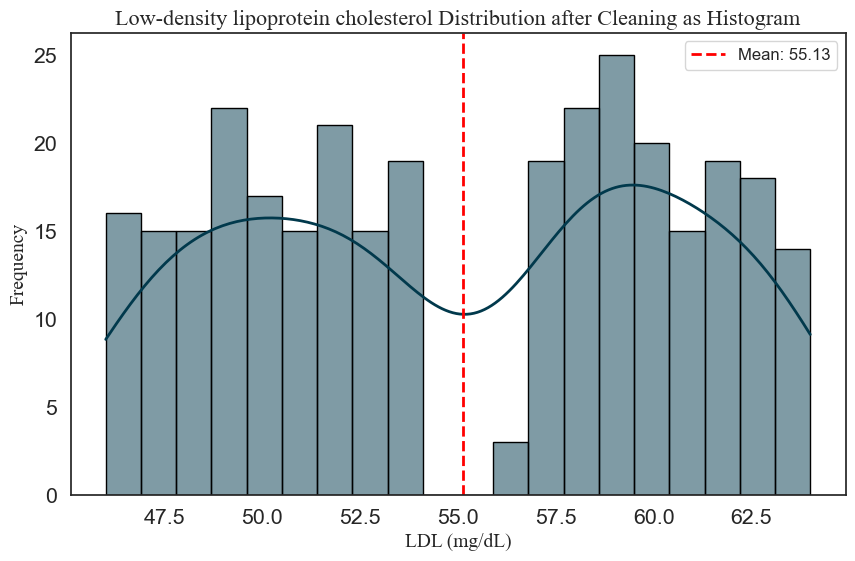

In [255]:
Series = pd.to_numeric(ModifiedDataFrame['LDL (mg/dL)'], errors='coerce').dropna()

Mean_Data = Series.mean()
Variance_Data = Series.var()
print("Mean:", Mean_Data)
print("Variance:", Variance_Data)

plt.figure(figsize=(10, 6))
sns.histplot(Series, kde=True, bins=20, color='#01394c', edgecolor='black')
plt.title('Low-density lipoprotein cholesterol Distribution after Cleaning as Histogram', fontsize=16, fontname='Times New Roman')
plt.xlabel('LDL (mg/dL)', fontsize=14, fontname='Times New Roman')
plt.ylabel('Frequency', fontsize=14, fontname='Times New Roman')
plt.axvline(Mean_Data, color='red', linestyle='--', label=f'Mean: {Mean_Data:.2f}')
plt.legend(fontsize=12)
plt.grid(visible=False)
plt.savefig("Low-density lipoprotein cholesterol Distribution after Cleaning as Histogram", dpi=300)

plt.show()

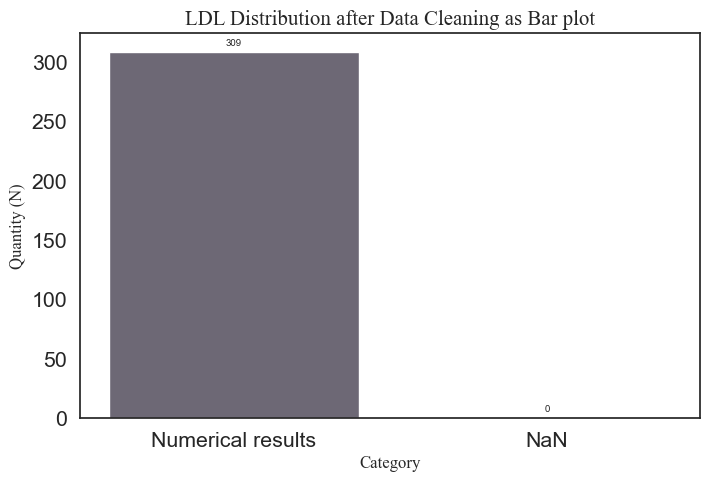

In [256]:
Keyword = [309, 0]
Value = ['Numerical results','NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('LDL Distribution after Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("LDL Distribution after Data Cleaning as Bar plot", dpi=300)

plt.show()

#### LDL status:

In [258]:
ModifiedDataFrame['LDL status'].value_counts()

LDL status
Normal    310
Name: count, dtype: int64

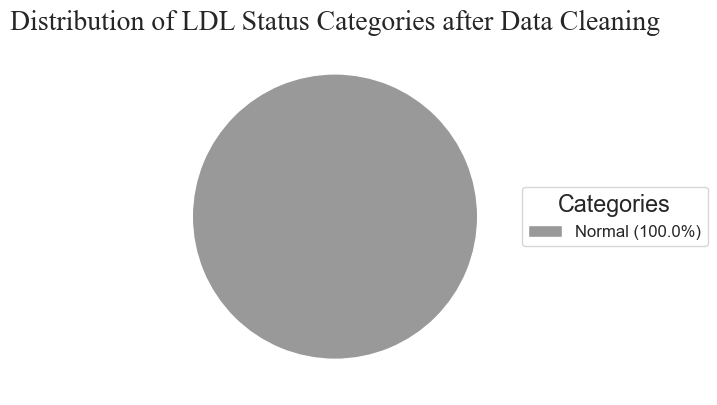

In [259]:
Keyword = [310]
Value = ['Normal']
Explode = [0]

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(6, 6))  

Colors_list = ['#999999']

plt.pie(Keyword, explode=Explode, startangle=40, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of LDL Status Categories after Data Cleaning",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of LDL Status Categories after Data Cleaning -310", dpi=300, bbox_inches='tight')

plt.show()

### Scenario 2_Exploratory Data Analysis:

 #### Sex:

In [262]:
print("Value counts for 'Sex':")
print(FullDataFrame['Sex'].value_counts(dropna=False))

Value counts for 'Sex':
Sex
F    255
M    241
Name: count, dtype: int64


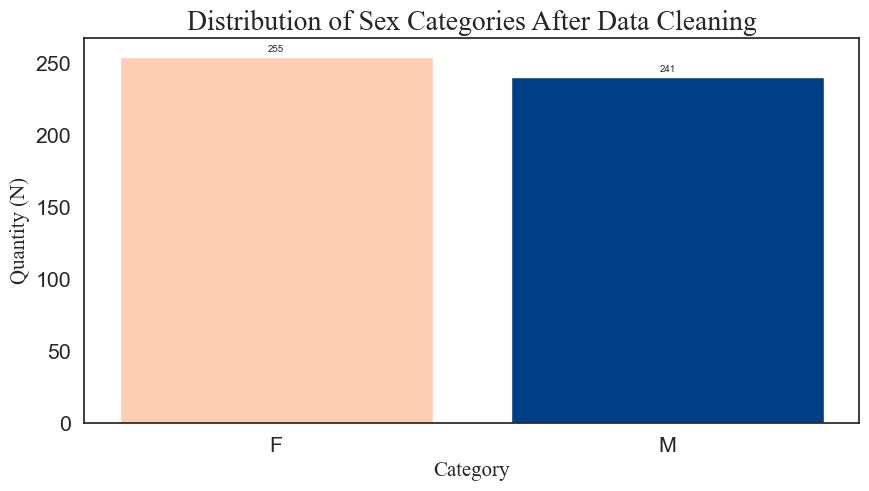

In [263]:
Keyword = [255, 241]
Value = ['F', 'M',]

plt.figure(figsize=(10, 5))
ColorGroup = ['#ffcdb2', '#003f88']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 3, str(value), ha='center', fontsize=7)
 

plt.title('Distribution of Sex Categories After Data Cleaning',fontname='Times New Roman', fontsize=20)
plt.xlabel('Category',fontname='Times New Roman', fontsize=15)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=15)
plt.savefig("Distribution of Sex Categories After Data Cleaning", dpi=300)

plt.show()

#### Marital status column:

In [265]:
print("Value counts for 'Marital status':")
print(FullDataFrame['Marital status'].value_counts(dropna=False))

Value counts for 'Marital status':
Marital status
M    433
W     51
S      8
D      4
Name: count, dtype: int64


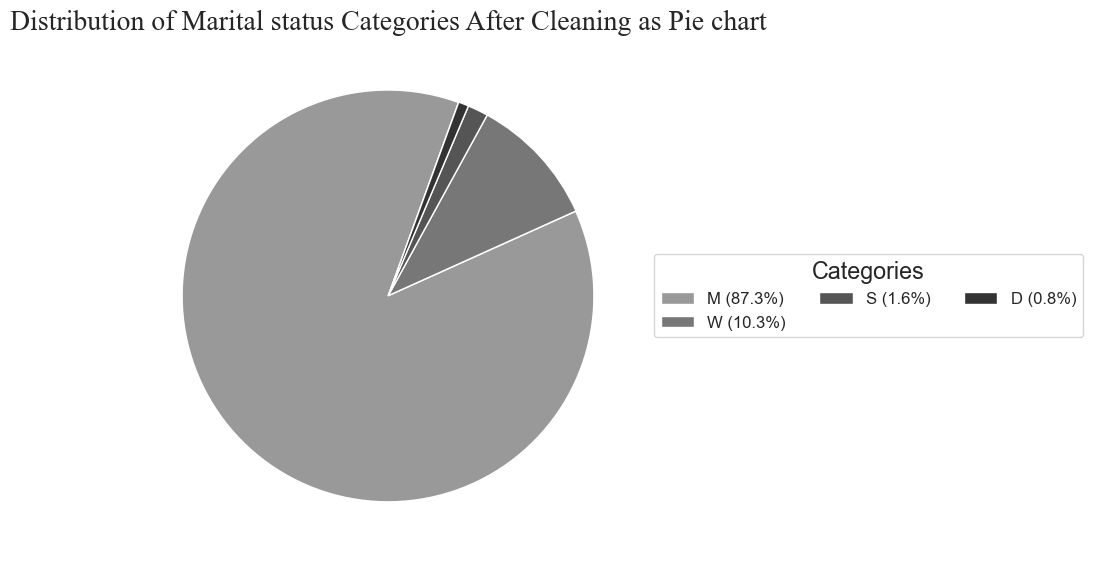

In [266]:
Keyword = [433, 51, 8, 4 ]
Value = ['M', 'W', 'S', 'D']
Explode = [0.002, 0, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555', '#333333']

plt.pie(Keyword, explode=Explode, startangle=70, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of Marital status Categories After Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Marital status Categories After Cleaning as Pie chart - 499", dpi=300, bbox_inches='tight')

plt.show()

#### Creatinine column:

In [268]:
print("Value counts for 'Creatinine (mg/dL)':")
print(FullDataFrame['Creatinine (mg/dL)'].head(5))

Value counts for 'Creatinine (mg/dL)':
0    1.038755
1    0.800000
2    0.600000
3    1.120000
4    0.240000
Name: Creatinine (mg/dL), dtype: float64


In [269]:
FullDataFrame['Creatinine (mg/dL)'].isna().sum()

0

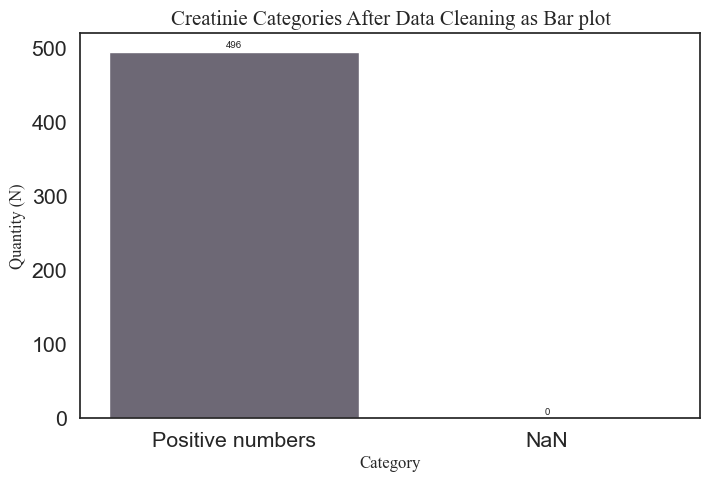

In [270]:
Keyword = [496, 0]
Value = ['Positive numbers', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('Creatinie Categories After Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("Creatinie Categories After Data Cleaning as Bar plot", dpi=300)

plt.show()

In [271]:
FullDataFrame.index

RangeIndex(start=0, stop=496, step=1)

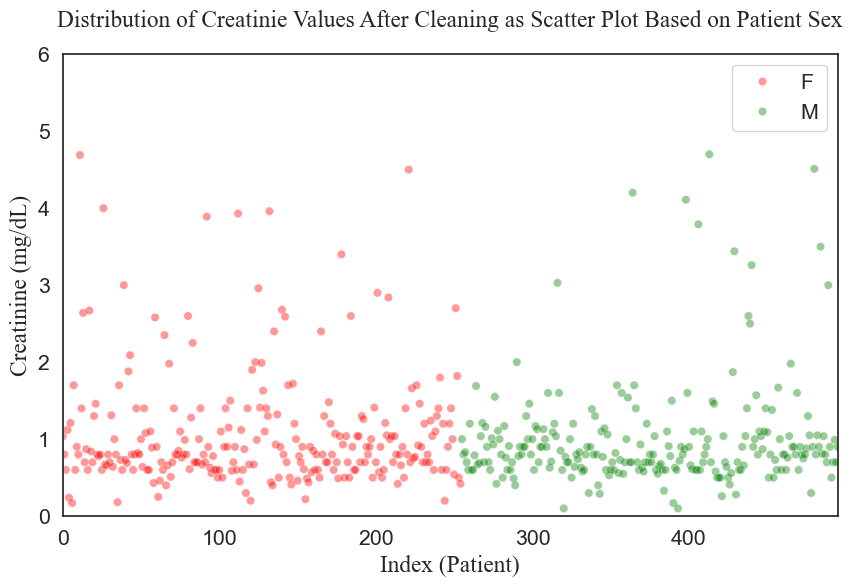

In [272]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame) - 1

ax = sns.scatterplot(data=FullDataFrame, x=FullDataFrame.index, y='Creatinine (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of Creatinie Values After Cleaning as Scatter Plot Based on Patient Sex', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Creatinine (mg/dL)', fontname='Times New Roman')

plt.xlim([0, index])
plt.ylim(top=6, bottom=0)

plt.legend()
plt.savefig("Distribution of Creatinie Values After Cleaning as Scatter Plot Based on Patient Sex - 499", dpi=300)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1403951149.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['Creatinine (mg/dL)'].apply(categorize_threshold)


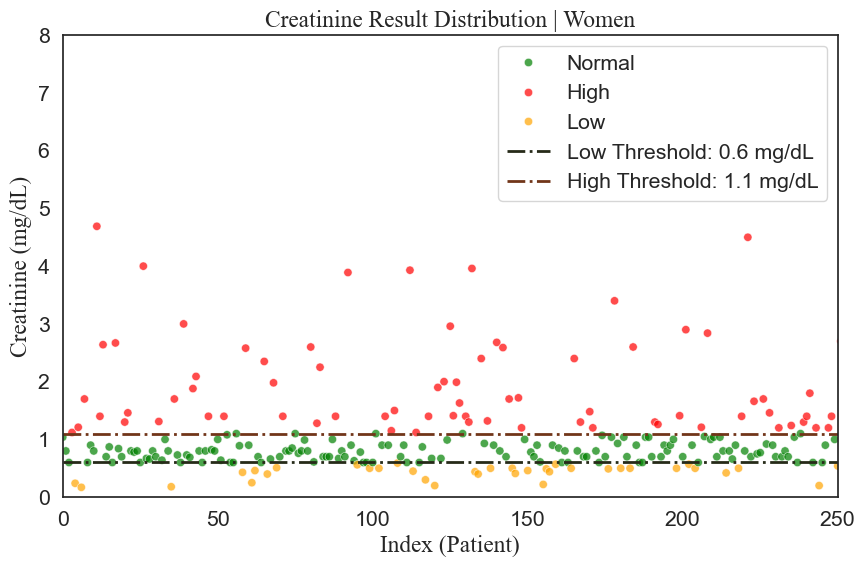

In [273]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

FullDataFrame_FemalData = FullDataFrame[FullDataFrame['Sex'] == 'F']
index = len(FullDataFrame_FemalData) - 1

low_threshold = 0.6
high_threshold = 1.1

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['Creatinine (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_FemalData, x=FullDataFrame_FemalData.index, 
                     y='Creatinine (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('Creatinine Result Distribution | Women', fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Creatinine (mg/dL)', fontname='Times New Roman')

plt.xlim([0, 250])
plt.ylim(top= 8, bottom=0)
plt.legend()
plt.savefig("Creatinine Result Distribution - Women496", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1471442941.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['Creatinine (mg/dL)'].apply(categorize_threshold)


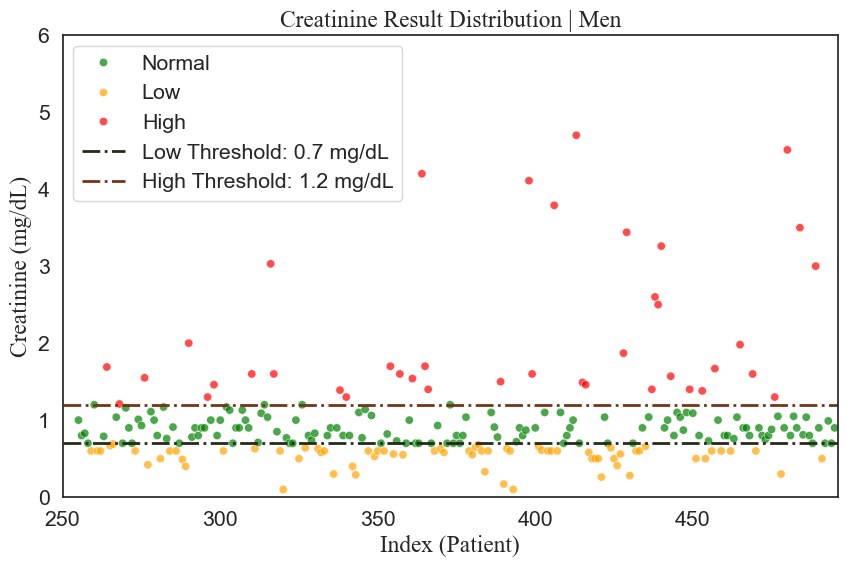

In [274]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

FullDataFrame_MenData = FullDataFrame[FullDataFrame['Sex'] == 'M']
index = len(FullDataFrame_MenData) - 1

low_threshold = 0.7
high_threshold = 1.2

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['Creatinine (mg/dL)'].apply(categorize_threshold)


palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_MenData, x=FullDataFrame_MenData.index, 
                     y='Creatinine (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('Creatinine Result Distribution | Men', fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Creatinine (mg/dL)', fontname='Times New Roman')

plt.xlim([250, 496])
plt.ylim(top= 6, bottom=0)
plt.legend()
plt.savefig("Creatinine Result Distribution - Men496", dpi=300)
plt.show()

In [275]:
print("Value counts for 'Creatinine status':")
print(FullDataFrame['Creatinine status'].value_counts(dropna=False))

Value counts for 'Creatinine status':
Creatinine status
Normal    216
High      156
Low       124
Name: count, dtype: int64


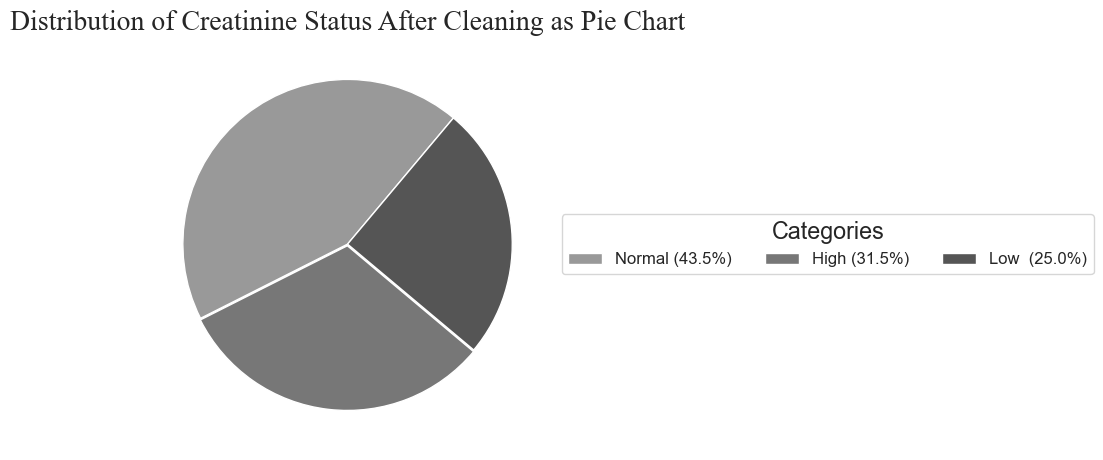

In [276]:
Keyword = [216, 156, 124]
Value = ['Normal', 'High', 'Low ']
Explode = [0, 0.01, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]


legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555']
               

plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of Creatinine Status After Cleaning as Pie Chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Creatinine Status After Cleaning as Pie Chart -496", dpi=300, bbox_inches='tight')

plt.show()

#### Fasting Blood Sugar:

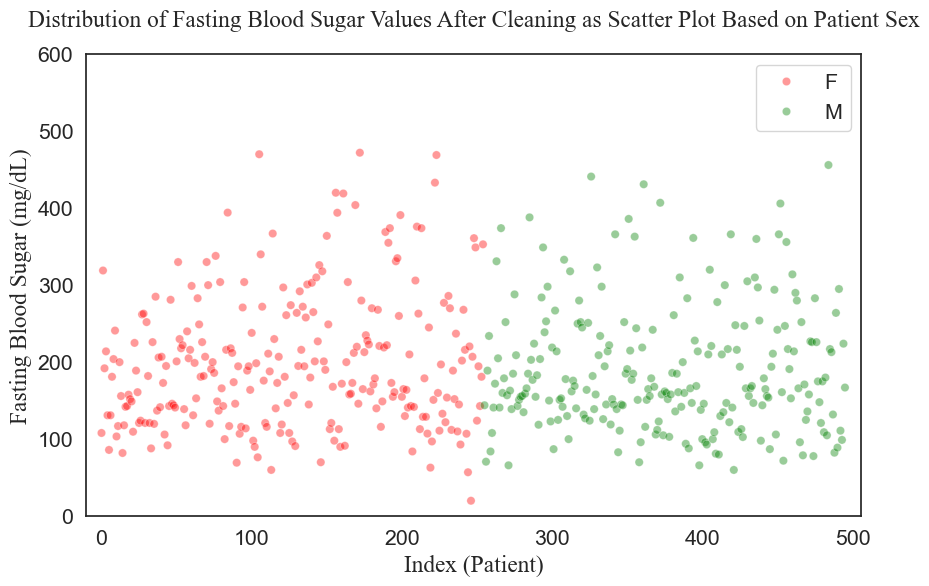

In [278]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(data=FullDataFrame, x=FullDataFrame.index, y='Fasting Blood Sugar (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of Fasting Blood Sugar Values After Cleaning as Scatter Plot Based on Patient Sex', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Fasting Blood Sugar (mg/dL)', fontname='Times New Roman')

plt.xlim([-10, len(FullDataFrame) + 10])
plt.ylim(top=600, bottom=0)

plt.legend()
plt.savefig("Distribution of Fasting Blood Sugar Values After Cleaning as Scatter Plot Based on Patient Sex-409", dpi=300)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\2709166876.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)


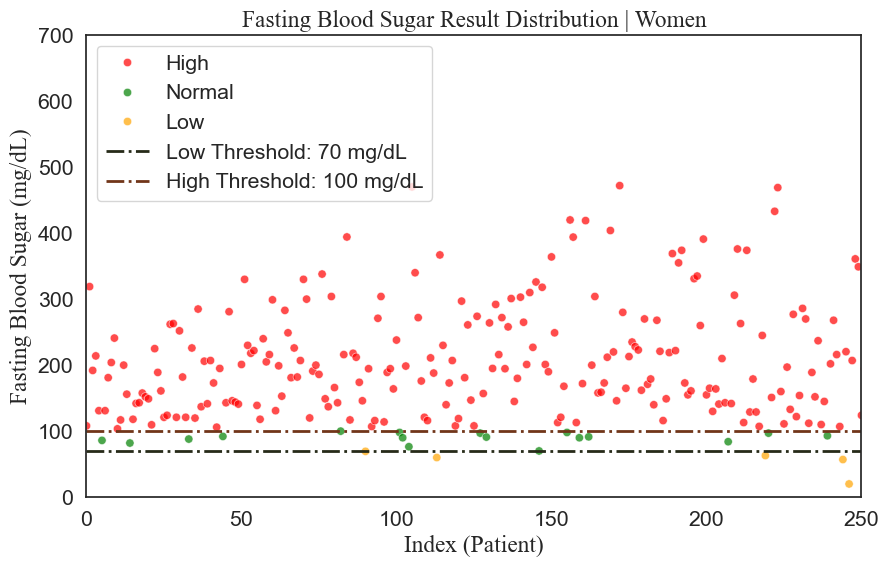

In [279]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame_FemalData) - 1

FullDataFrame_FemalData = FullDataFrame[FullDataFrame['Sex'] == 'F']

low_threshold = 70
high_threshold = 100

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'} 

ax = sns.scatterplot(data=FullDataFrame_FemalData, x=FullDataFrame_FemalData.index, 
                     y='Fasting Blood Sugar (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL') 

ax.set_title('Fasting Blood Sugar Result Distribution | Women', fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Fasting Blood Sugar (mg/dL)', fontname='Times New Roman')

plt.xlim([0, 250])
plt.ylim(top= 700, bottom=0)
plt.legend()
plt.savefig("FBS Result Distribution - Women496", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1423444093.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)


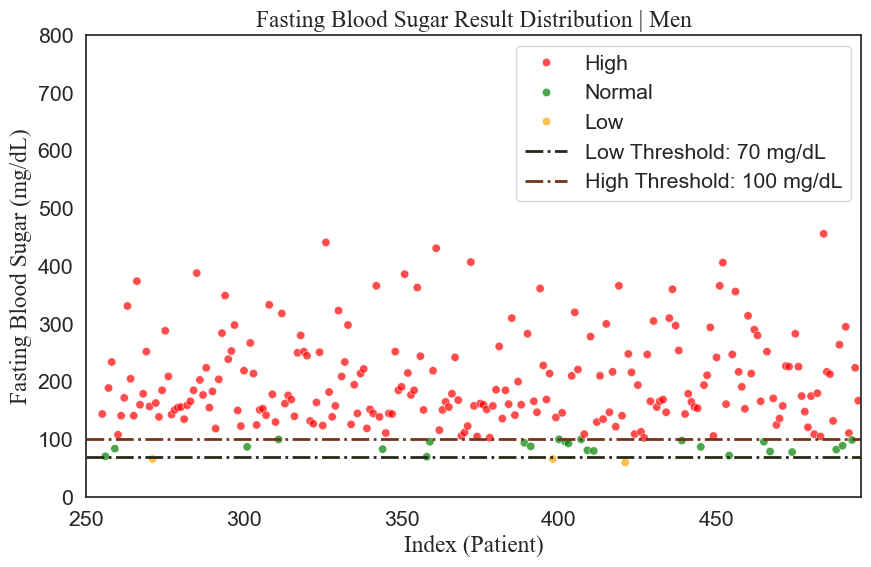

In [280]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame_MenData) - 1

FullDataFrame_MenData = FullDataFrame[FullDataFrame['Sex'] == 'M']

low_threshold = 70
high_threshold = 100

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['Fasting Blood Sugar (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}

ax = sns.scatterplot(data=FullDataFrame_MenData, x=FullDataFrame_MenData.index, 
                     y='Fasting Blood Sugar (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('Fasting Blood Sugar Result Distribution | Men', fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Fasting Blood Sugar (mg/dL)', fontname='Times New Roman')

plt.xlim([250, 496])
plt.ylim(top= 800, bottom=0)
plt.legend()
plt.savefig("FBS Result Distribution - Men496", dpi=300)
plt.show()

In [281]:
print("Value counts for 'FBS status':")
print(FullDataFrame['FBS status'].value_counts(dropna=False))

Value counts for 'FBS status':
FBS status
High      423
Normal     61
Low        12
Name: count, dtype: int64


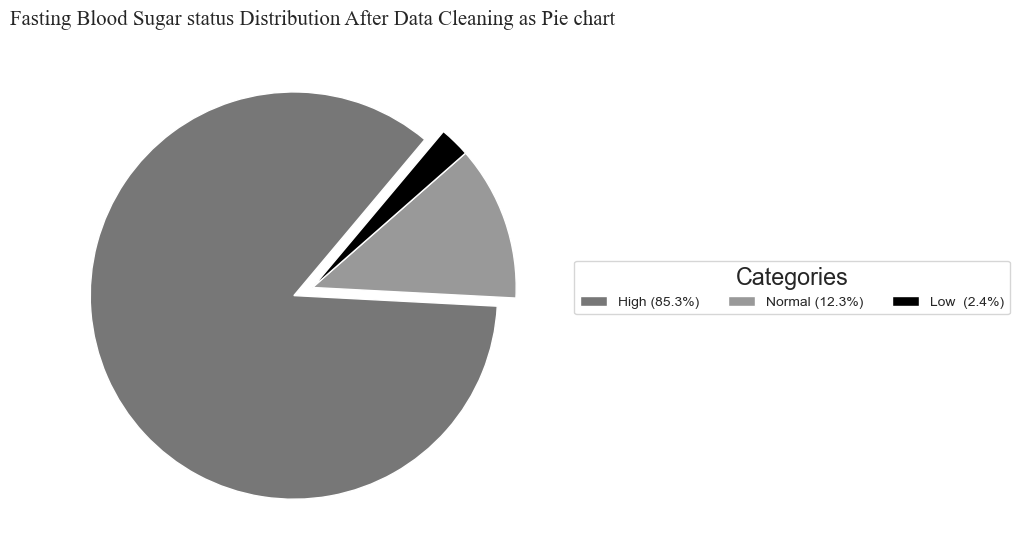

In [282]:
Keyword = [423, 61, 12]
Value = ['High', 'Normal', 'Low ']
Explode = [0.1, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#777777', '#999999', '#000000']
               
plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 7}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10, ncol=3)
plt.title("Fasting Blood Sugar status Distribution After Data Cleaning as Pie chart",fontname='Times New Roman', fontsize=15)
plt.tight_layout() 
plt.savefig("Fasting Blood Sugar status Distribution After Data Cleaning as Pie chart -409", dpi=300, bbox_inches='tight')
plt.show()

#### Hemoglobin A1C column:

In [284]:
FullDataFrame['Hb_A1c (mg/dL)'].isna().sum()

0

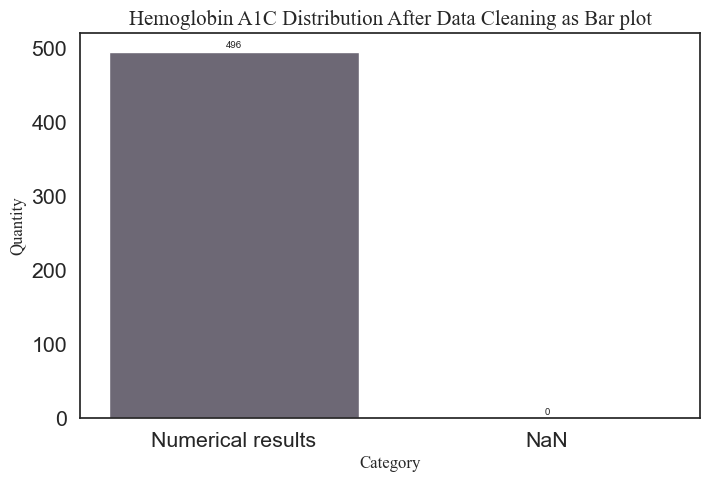

In [285]:
Keyword = [496, 0]
Value = ['Numerical results', 'NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 

plt.title('Hemoglobin A1C Distribution After Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity',fontname='Times New Roman', fontsize=12)
plt.savefig("Hemoglobin A1C Distribution After Data Cleaning as Bar plot", dpi=300)

plt.show()

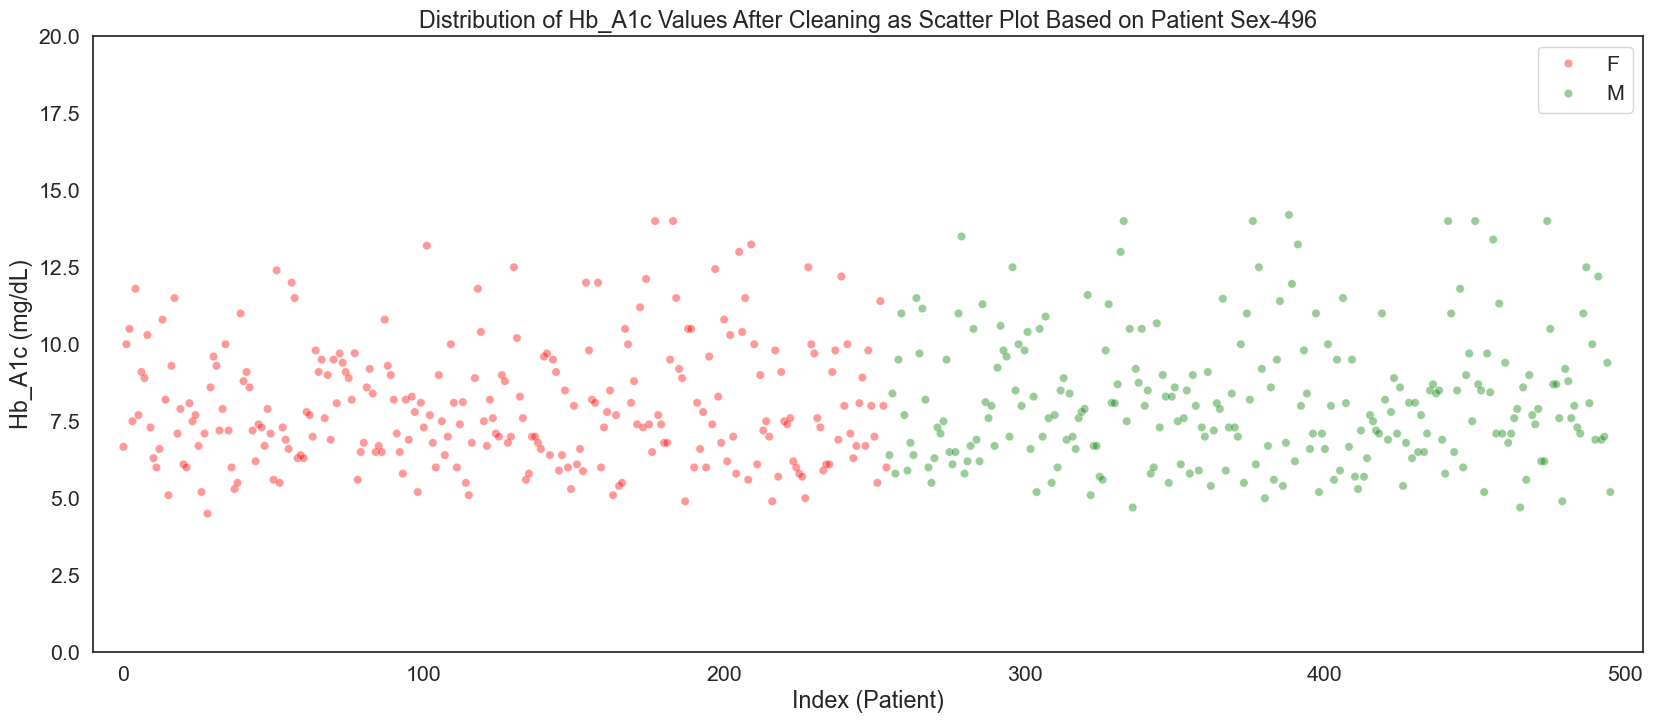

In [286]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))

ax = sns.scatterplot(data=FullDataFrame, x=FullDataFrame.index, y='Hb_A1c (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of Hb_A1c Values After Cleaning as Scatter Plot Based on Patient Sex-496')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('Hb_A1c (mg/dL)')

plt.xlim([-10, len(FullDataFrame) + 10])
plt.ylim(top=20, bottom=0)

plt.legend()
plt.savefig("Distribution of Hb_A1c Values After Cleaning as Scatter Plot Based on Patient Sex", dpi=300)

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1095941936.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['Hb_A1c (mg/dL)'].apply(categorize_threshold)


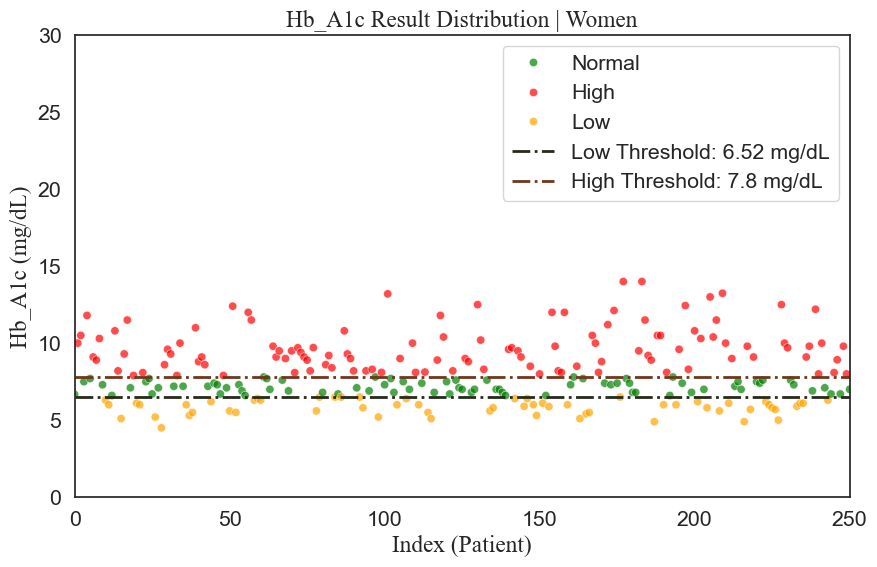

In [287]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame_FemalData) - 1

FullDataFrame_FemalData = FullDataFrame[FullDataFrame['Sex'] == 'F']

low_threshold = 6.52 
high_threshold = 7.8 

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['Hb_A1c (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_FemalData, x=FullDataFrame_FemalData.index, 
                     y='Hb_A1c (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL') 

ax.set_title('Hb_A1c Result Distribution | Women', fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('Hb_A1c (mg/dL)', fontname='Times New Roman')

plt.xlim([0, 250])
plt.ylim(top= 30, bottom=0)
plt.legend()
plt.savefig("Hb_A1c Result Distribution - Women496", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\947329956.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['Hb_A1c (mg/dL)'].apply(categorize_threshold)


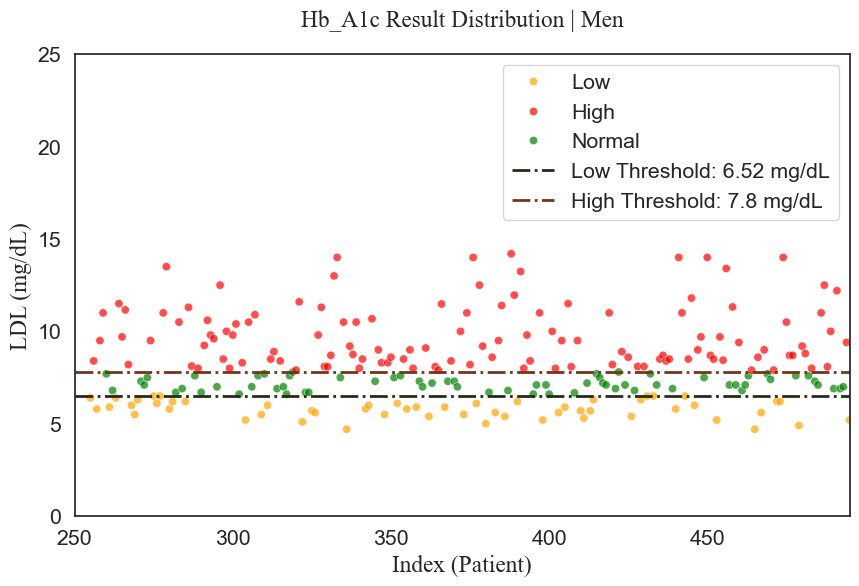

In [288]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame) - 1

FullDataFrame_MenData = FullDataFrame[FullDataFrame['Sex'] == 'M']

low_threshold = 6.52 
high_threshold = 7.8 

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['Hb_A1c (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_MenData, x=FullDataFrame_MenData.index, 
                     y='Hb_A1c (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('Hb_A1c Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('LDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 25, bottom=0)
plt.legend()
plt.savefig("Hb_A1c Result Distribution - Men496", dpi=300)
plt.show()

In [289]:
print("Value counts for 'Hb_A1c status':")
print(FullDataFrame['Hb_A1c status'].value_counts(dropna=False))

Value counts for 'Hb_A1c status':
Hb_A1c status
Normal    250
High      246
Name: count, dtype: int64


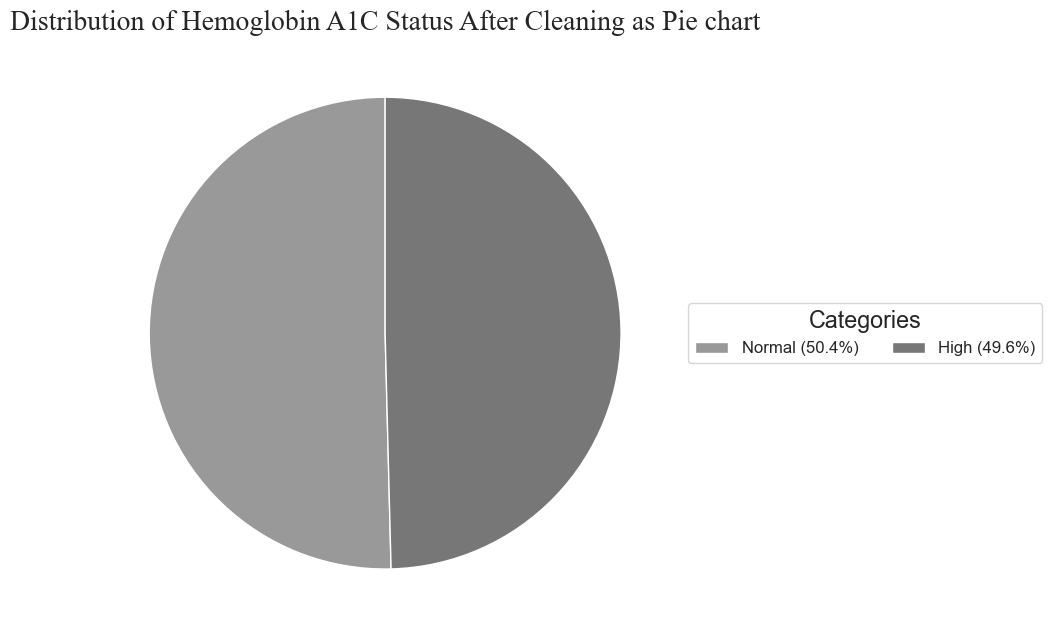

In [290]:
Keyword = [250, 246]
Value = ['Normal', 'High']
Explode = [0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  

Colors_list = ['#999999', '#777777']

plt.pie(Keyword, explode=Explode, startangle=90, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)
plt.title("Distribution of Hemoglobin A1C Status After Cleaning as Pie chart",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of Hemoglobin A1C Status After Cleaning as Pie chart -406", dpi=300, bbox_inches='tight')
plt.show()

#### HDL column: 

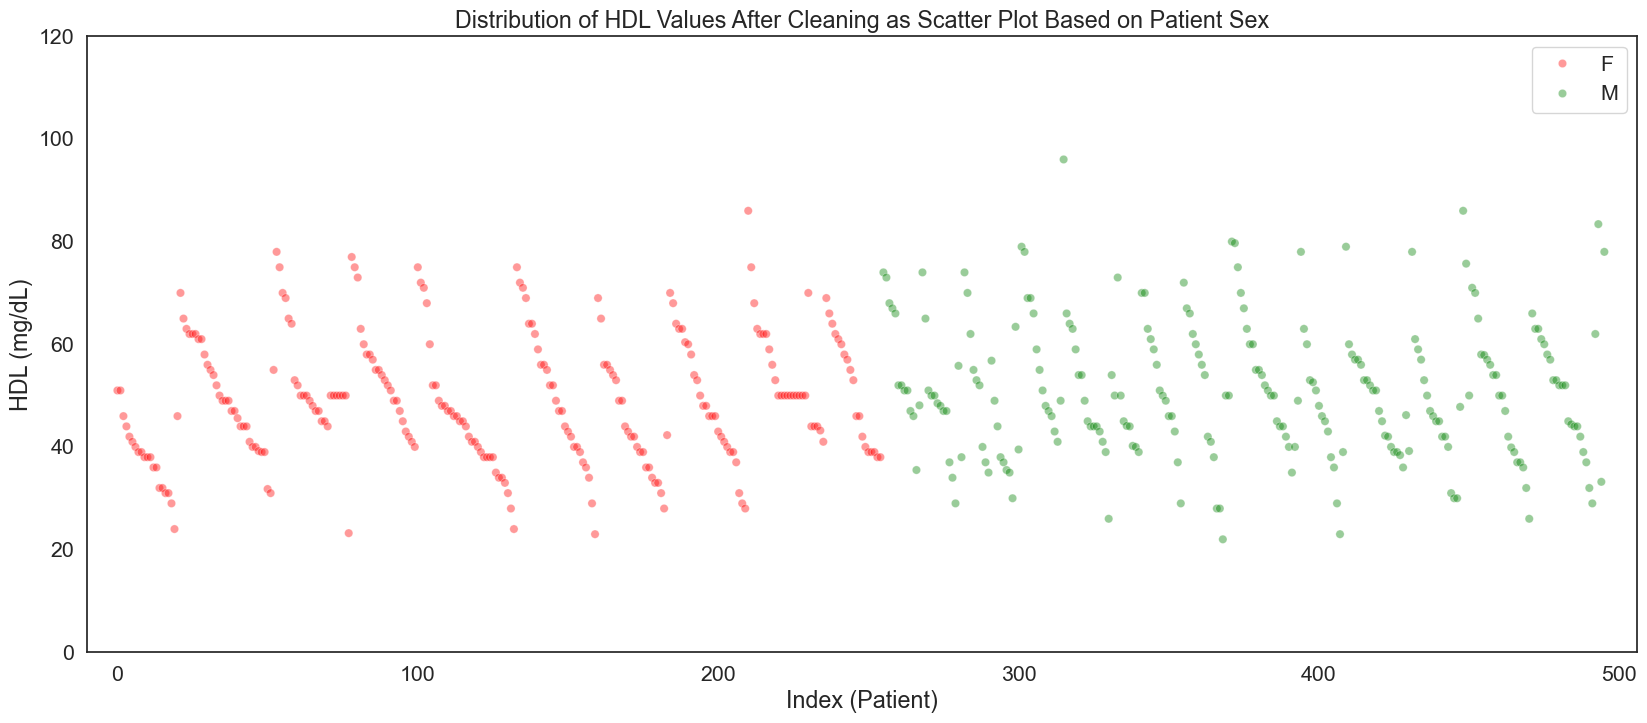

In [292]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))

ax = sns.scatterplot(data=FullDataFrame, x=FullDataFrame.index, y='HDL (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of HDL Values After Cleaning as Scatter Plot Based on Patient Sex')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('HDL (mg/dL)')

plt.xlim([-10, len(FullDataFrame) + 10])
plt.ylim(top=120, bottom=0)
plt.legend()
plt.savefig("Distribution of High-density lipoprotein cholesterol Values After Cleaning as Scatter Plot Based on Patient Sex -496", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\2763277026.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['HDL (mg/dL)'].apply(categorize_threshold)


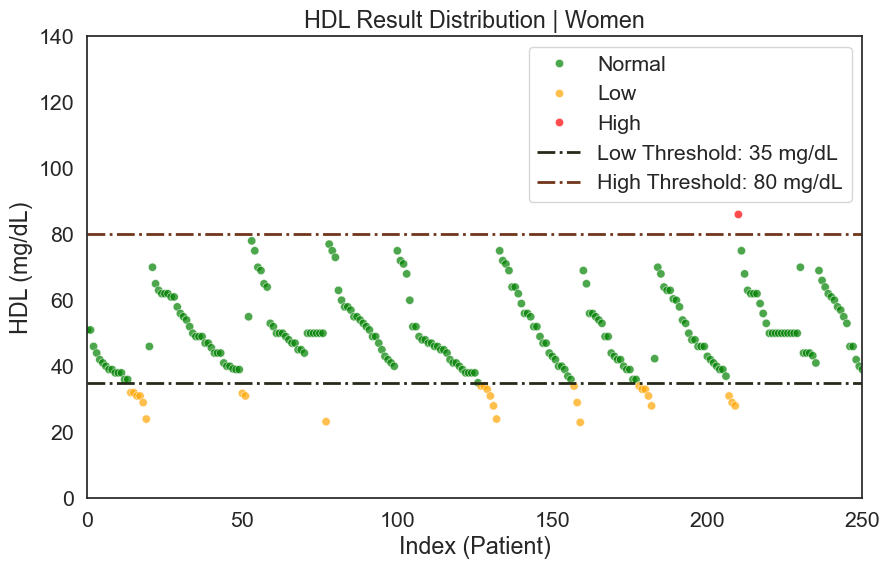

In [293]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame_FemalData) - 1

FullDataFrame_FemalData = FullDataFrame[FullDataFrame['Sex'] == 'F']

low_threshold = 35
high_threshold = 80

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['HDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'} 

ax = sns.scatterplot(data=FullDataFrame_FemalData, x=FullDataFrame_FemalData.index, 
                     y='HDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL') 

ax.set_title('HDL Result Distribution | Women')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('HDL (mg/dL)')

plt.xlim([0, 250])
plt.ylim(top= 140, bottom=0)
plt.legend()
plt.savefig("HDL Result Distribution - Women496", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\2399086563.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['HDL (mg/dL)'].apply(categorize_threshold)


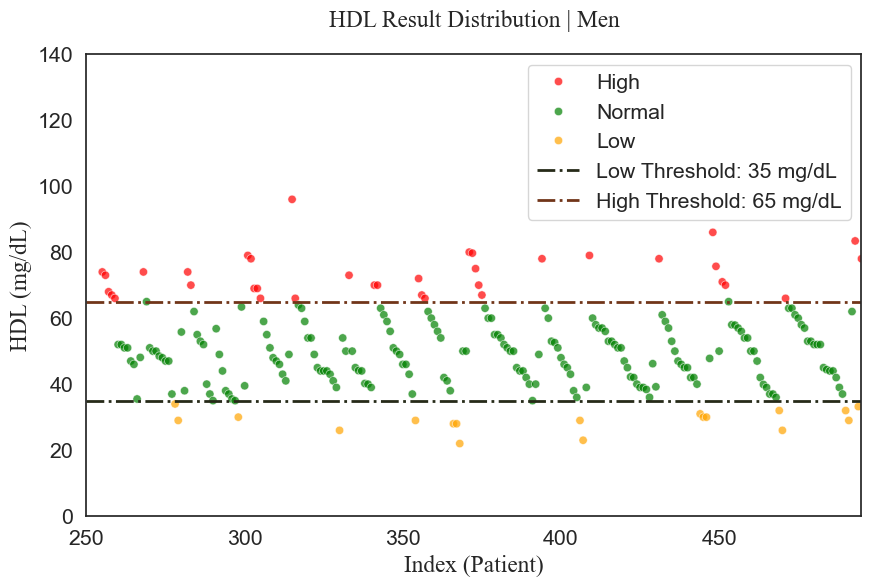

In [294]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame) - 1

FullDataFrame_MenData = FullDataFrame[FullDataFrame['Sex'] == 'M']

low_threshold = 35
high_threshold = 65

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['HDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_MenData, x=FullDataFrame_MenData.index, 
                     y='HDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL')  
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL')  

ax.set_title('HDL Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('HDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 140, bottom=0)
plt.legend()
plt.savefig("HDL Result Distribution - Men496", dpi=300)
plt.show()

In [295]:
FullDataFrame['HDL (mg/dL)'].isna().sum()

0

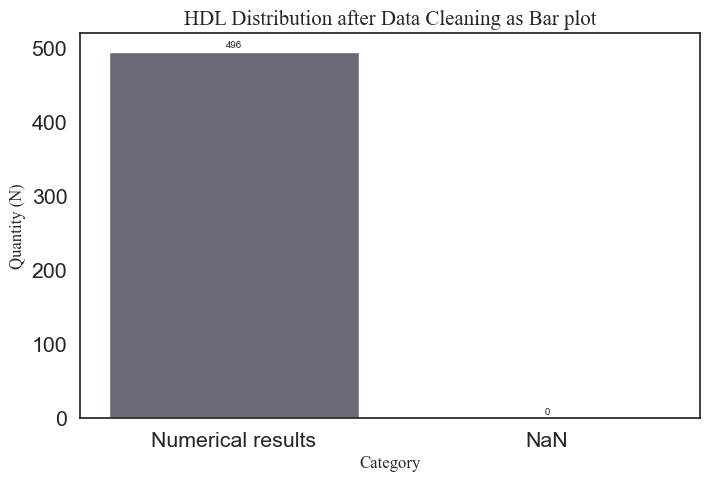

In [296]:
Keyword = [496, 0]
Value = ['Numerical results','NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681']

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 
plt.title('HDL Distribution after Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("Distribution of HDL Values After Cleaning as Scatter Plot Based on Patient Sex -496.png")

plt.show()

In [297]:
print("Value counts for 'HDL: status':")
print(FullDataFrame['HDL status'].value_counts(dropna=False))

Value counts for 'HDL: status':
HDL status
Normal    409
low        48
High       39
Name: count, dtype: int64


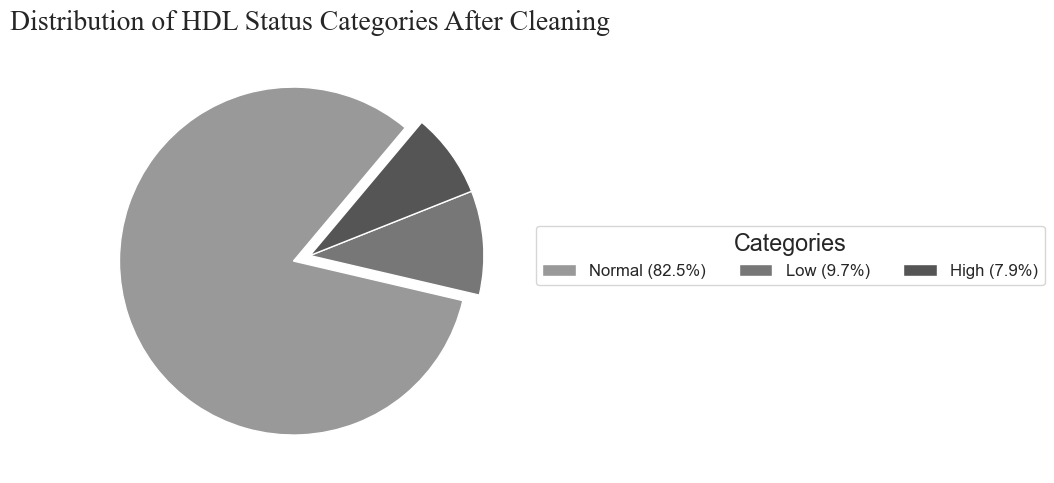

In [298]:
Keyword = [409, 48, 39]
Value = ['Normal', 'Low', 'High']
Explode = [0.1, 0, 0]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]


legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  
Colors_list = ['#999999',  '#777777',  '#555555', '#333333']
               
plt.pie(Keyword, explode=Explode, startangle=50, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of HDL Status Categories After Cleaning",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of HDL Status Categories After Cleaning -409", dpi=300, bbox_inches='tight')

plt.show()

#### LDL column:

In [300]:
FullDataFrame['LDL (mg/dL)'].isna().sum()

0

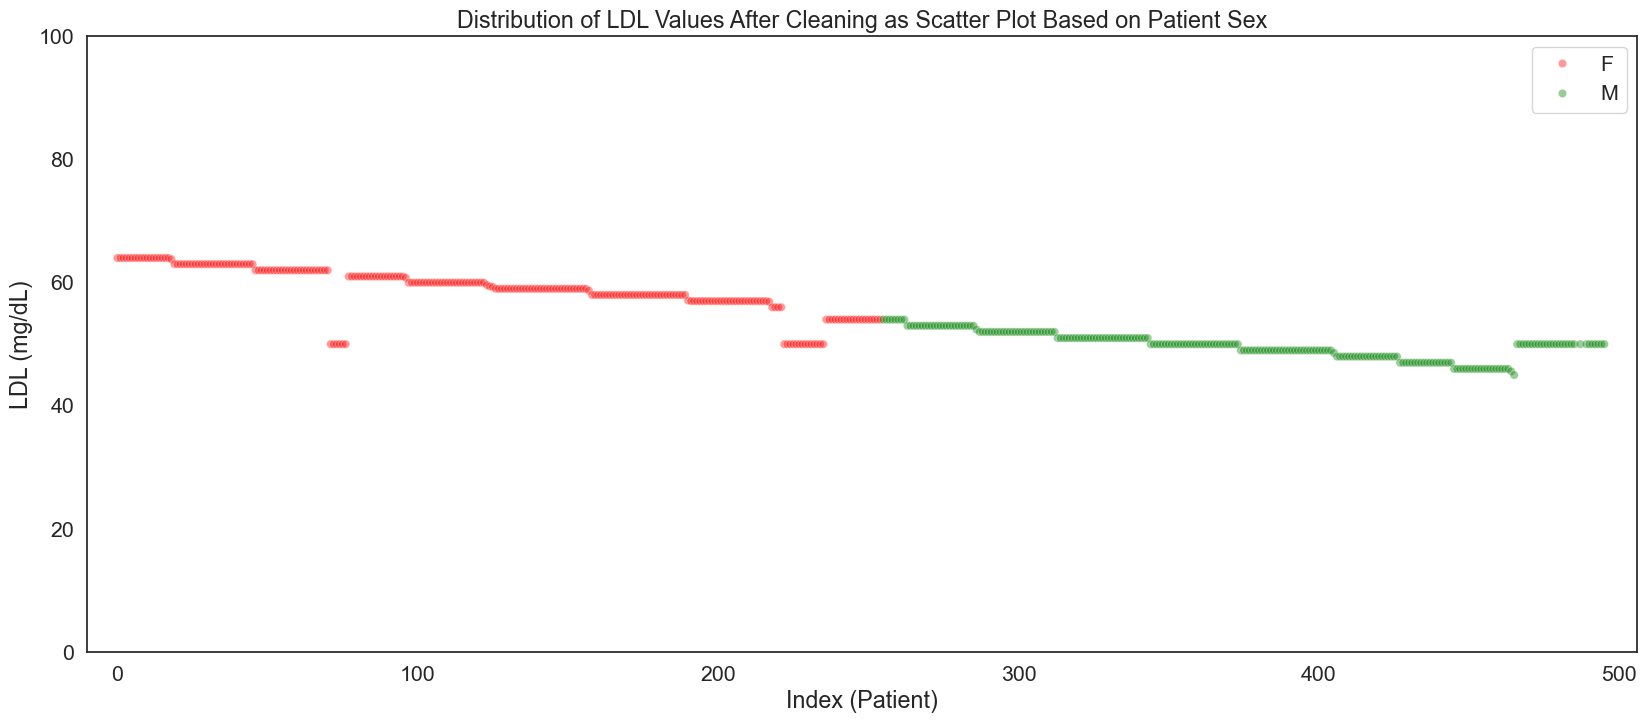

In [301]:
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(20, 8))

ax = sns.scatterplot(data=FullDataFrame, x=FullDataFrame.index, y='LDL (mg/dL)',
                     hue='Sex', palette=dict(M="green", F="red"), alpha=0.4)

ax.set_title('Distribution of LDL Values After Cleaning as Scatter Plot Based on Patient Sex')
ax.set_xlabel('Index (Patient)')
ax.set_ylabel('LDL (mg/dL)')

plt.xlim([-10, len(FullDataFrame) + 10])
plt.ylim(top=100, bottom=0)

plt.legend()
plt.savefig("Distribution of LDL Values After Cleaning as Scatter Plot Based on Patient Sex -496", dpi=300, bbox_inches='tight')

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3248101905.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['LDL (mg/dL)'].apply(categorize_threshold)


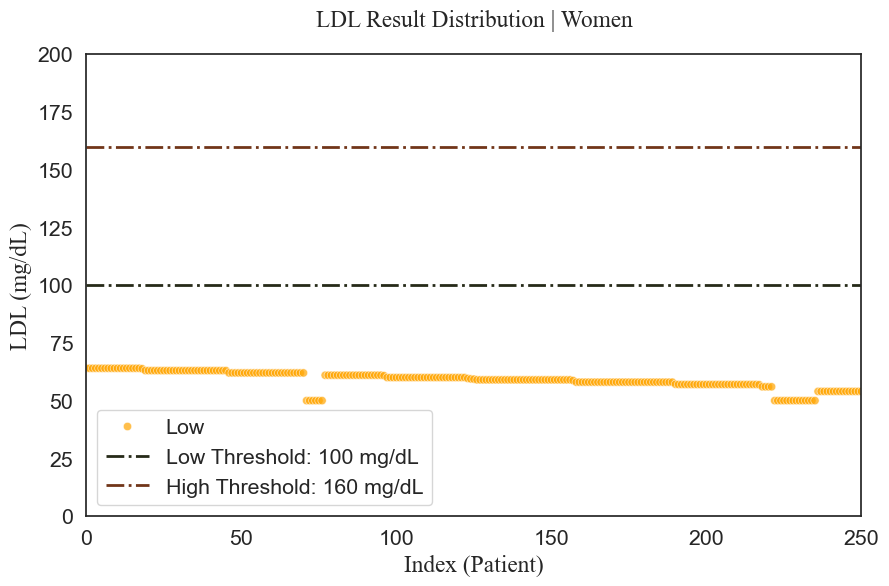

In [302]:
# Set theme
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame_FemalData) - 1

FullDataFrame_FemalData = FullDataFrame[FullDataFrame['Sex'] == 'F']

low_threshold = 100
high_threshold = 160

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_FemalData['Threshold'] = FullDataFrame_FemalData['LDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_FemalData, x=FullDataFrame_FemalData.index, 
                     y='LDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL') 

ax.set_title('LDL Result Distribution | Women', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('LDL (mg/dL)', fontname='Times New Roman')

plt.xlim([0, 250])
plt.ylim(top= 200, bottom=0)
plt.legend()
plt.savefig("LDL Result Distribution - Women496", dpi=300)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\1755223462.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['LDL (mg/dL)'].apply(categorize_threshold)


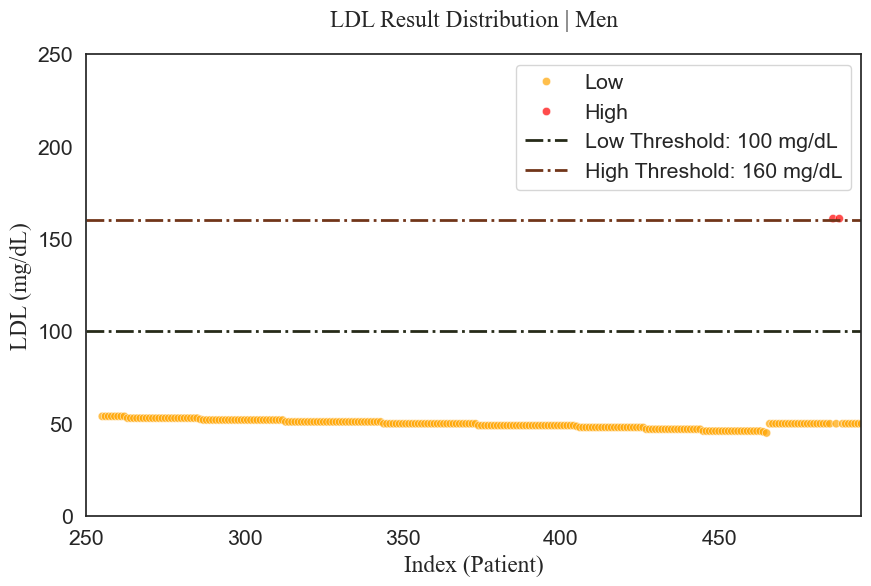

In [303]:
# Set theme
sns.set_theme(style="white", color_codes=True, font_scale=1.4, rc={"lines.linewidth": 2})
plt.subplots(figsize=(10, 6))
index = len(FullDataFrame) - 1

FullDataFrame_MenData = FullDataFrame[FullDataFrame['Sex'] == 'M']

low_threshold = 100
high_threshold = 160

def categorize_threshold(value):
    if value < low_threshold:
        return 'Low'
    elif value > high_threshold:
        return 'High'
    else:
        return 'Normal'

FullDataFrame_MenData['Threshold'] = FullDataFrame_MenData['LDL (mg/dL)'].apply(categorize_threshold)

palette = {'Low': '#FFA500', 'Normal': '#008000', 'High': '#FF0000'}  

ax = sns.scatterplot(data=FullDataFrame_MenData, x=FullDataFrame_MenData.index, 
                     y='LDL (mg/dL)', hue='Threshold', palette=palette, alpha=0.7)

plt.axhline(y=low_threshold, color='#262A18', linestyle='dashdot', linewidth=2, label=f'Low Threshold: {low_threshold} mg/dL') 
plt.axhline(y=high_threshold, color='#713519', linestyle='dashdot', linewidth=2, label=f'High Threshold: {high_threshold} mg/dL') 

ax.set_title('LDL Result Distribution | Men', pad=20, fontname='Times New Roman')
ax.set_xlabel('Index (Patient)', fontname='Times New Roman')
ax.set_ylabel('LDL (mg/dL)', fontname='Times New Roman')

plt.xlim([250, index])
plt.ylim(top= 250, bottom=0) 
plt.legend()
plt.savefig("LDL Result Distribution - Men496", dpi=300)
plt.show()

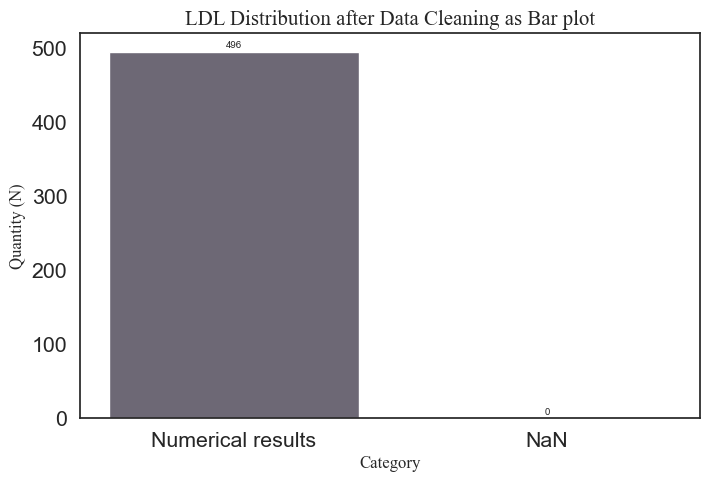

In [304]:
Keyword = [496, 0]
Value = ['Numerical results','NaN']

plt.figure(figsize=(8, 5))
ColorGroup = ['#6d6875', '#917681' ]

plt.bar(Value, Keyword, color = ColorGroup)

for i, value in enumerate(Keyword):
    plt.text(i, value + 5, str(value), ha='center', fontsize=7)
 

plt.title('LDL Distribution after Data Cleaning as Bar plot',fontname='Times New Roman', fontsize=15)
plt.xlabel('Category',fontname='Times New Roman', fontsize=12)
plt.ylabel('Quantity (N)',fontname='Times New Roman', fontsize=12)
plt.savefig("LDL Distribution after Data Cleaning as Bar plot")

plt.show()

In [305]:
print("Value counts for 'LDL: status':")
print(FullDataFrame['LDL status'].value_counts(dropna=False))

Value counts for 'LDL: status':
LDL status
Normal    494
High        2
Name: count, dtype: int64


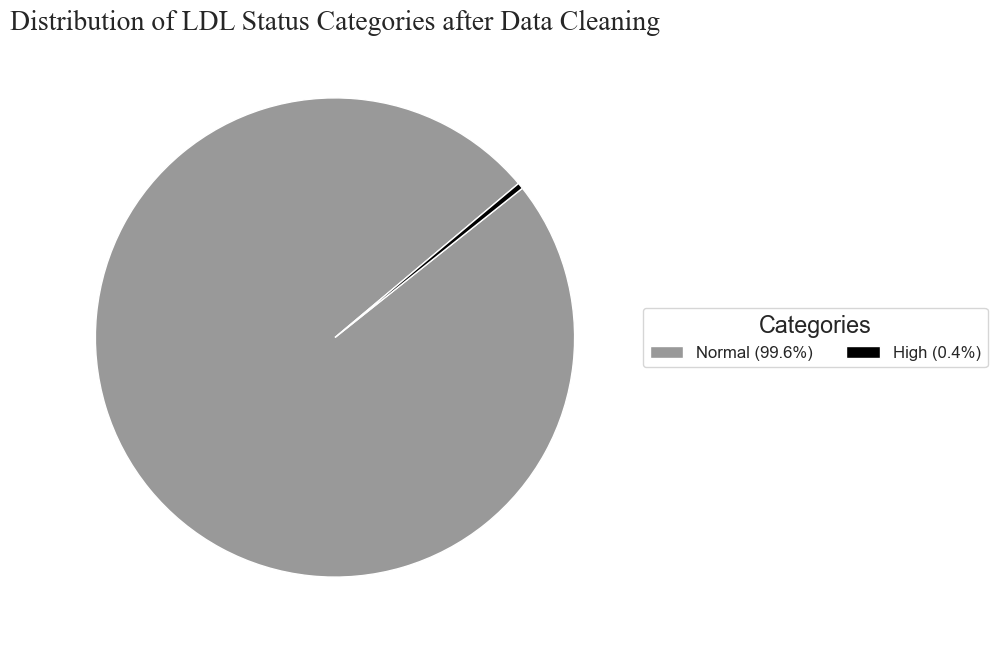

In [306]:
Keyword = [494, 2]
Value = ['Normal', 'High']
Explode = [0, 0]

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))  

Colors_list = ['#999999',  '#000000']

plt.pie(Keyword, explode=Explode, startangle=40, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)

plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, ncol=3)

plt.title("Distribution of LDL Status Categories after Data Cleaning",fontname='Times New Roman', fontsize=20)
plt.tight_layout() 
plt.savefig("Distribution of LDL Status Categories after Data Cleaning -496", dpi=300, bbox_inches='tight')

plt.show()

In [307]:
FullDataFrame.reset_index(drop=True).head(10)

ID  \
0  20240   
1  20241   
2  20242   
3  20243   
4  20244   
5  20245   
6  20246   
7  20247   
8  20248   
9  20249   

  Sex  \
0   F   
1   F   
2   F   
3   F   
4   F   
5   F   
6   F   
7   F   
8   F   
9   F   

  Marital status  \
0              M   
1              S   
2              W   
3              W   
4              M   
5              M   
6              W   
7              W   
8              M   
9              M   

   Creatinine (mg/dL)  \
0            1.038755   
1            0.800000   
2            0.600000   
3            1.120000   
4            0.240000   
5            1.210000   
6            0.170000   
7            1.700000   
8            0.600000   
9            0.900000   

  Creatinine status  \
0            Normal   
1            Normal   
2            Normal   
3              High   
4               Low   
5              High   
6               Low   
7              High   
8            Normal   
9              High   

   Fasting Blood Sugar (mg/dL)  \
0                        108.0   
1                        319.0   
2                        192.0   
3                        214.0   
4                        131.0   
5                         86.0   
6                        131.0   
7                        181.0   
8                        204.0   
9                        241.0   

  FBS status  \
0     Normal   
1       High   
2       High   
3       High   
4       High   
5     Normal   
6       High   
7       High   
8       High   
9       High   

   Hb_A1c (mg/dL)  \
0            6.67   
1           10.00   
2           10.50   
3            7.50   
4           11.80   
5            7.70   
6            9.10   
7            8.90   
8           10.30   
9            7.30   

  Hb_A1c status  \
0        Normal   
1          High   
2          High   
3        Normal   
4          High   
5          High   
6          High   
7          High   
8          High   
9        Normal   

   HDL (mg/dL)  \
0         51.0   
1         51.0   
2         46.0   
3         44.0   
4         42.0   
5         41.0   
6         40.0   
7         39.0   
8         39.0   
9         38.0   

  HDL status  \
0     Normal   
1     Normal   
2     Normal   
3     Normal   
4     Normal   
5     Normal   
6     Normal   
7     Normal   
8     Normal   
9     Normal   

   LDL (mg/dL)  \
0         64.0   
1         64.0   
2         64.0   
3         64.0   
4         64.0   
5         64.0   
6         64.0   
7         64.0   
8         64.0   
9         64.0   

  LDL status  
0     Normal  
1     Normal  
2     Normal  
3     Normal  
4     Normal  
5     Normal  
6     Normal  
7     Normal  
8     Normal  
9     Normal

In [308]:
FullDataFrame.shape

(496, 13)

## Modeling:

### Masking categorical features: 

#### Sex:

In [312]:
ModifiedDataFrame.replace(to_replace = ["M"], value = 1,inplace=True)
ModifiedDataFrame.replace(to_replace = ["F"], value = 0,inplace=True)

FullDataFrame.replace(to_replace = ["M"], value = 1,inplace=True)
FullDataFrame.replace(to_replace = ["F"], value = 0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3981154961.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ModifiedDataFrame.replace(to_replace = ["F"], value = 0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3981154961.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  FullDataFrame.replace(to_replace = ["F"], value = 0,inplace=True)


#### Marital status:

In [314]:
ModifiedDataFrame.replace(to_replace = ["W"], value = 3,inplace=True)
ModifiedDataFrame.replace(to_replace = ["D"], value = 2,inplace=True)
ModifiedDataFrame.replace(to_replace = ["M"], value = 1,inplace=True)
ModifiedDataFrame.replace(to_replace = ["S"], value = 0,inplace=True)

FullDataFrame.replace(to_replace = ["W"], value = 3,inplace=True)
FullDataFrame.replace(to_replace = ["D"], value = 2,inplace=True)
FullDataFrame.replace(to_replace = ["M"], value = 1,inplace=True)
FullDataFrame.replace(to_replace = ["S"], value = 0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3769610966.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ModifiedDataFrame.replace(to_replace = ["S"], value = 0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3769610966.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  FullDataFrame.replace(to_replace = ["S"], value = 0,inplace=True)


#### Status: 

In [316]:
ModifiedDataFrame.replace(to_replace = ["High"], value = 3,inplace=True)
ModifiedDataFrame.replace(to_replace = ["high"], value = 3,inplace=True)
ModifiedDataFrame.replace(to_replace = ["Normal"], value = 2,inplace=True)
ModifiedDataFrame.replace(to_replace = ["normal"], value = 2,inplace=True)
ModifiedDataFrame.replace(to_replace = ["Low"], value = 1,inplace=True)
ModifiedDataFrame.replace(to_replace = ["low"], value = 1,inplace=True)

FullDataFrame.replace(to_replace = ["High"], value = 3,inplace=True)
FullDataFrame.replace(to_replace = ["Normal"], value = 2,inplace=True)
FullDataFrame.replace(to_replace = ["Low"], value = 1,inplace=True)
FullDataFrame.replace(to_replace = ["high"], value = 3,inplace=True)
FullDataFrame.replace(to_replace = ["normal"], value = 2,inplace=True)
FullDataFrame.replace(to_replace = ["low"], value = 1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\2841565098.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ModifiedDataFrame.replace(to_replace = ["Normal"], value = 2,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\2841565098.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ModifiedDataFrame.replace(to_replace = ["Low"], value = 1,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\2841565098.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future v

In [317]:
ModifiedDataFrame.reset_index(drop=True, inplace=True)
FullDataFrame.reset_index(drop=True, inplace=True)

In [318]:
ModifiedDataFrame.head()

ID  \
0  20241   
1  20242   
2  20243   
3  20244   
4  20245   

   Sex  \
0    0   
1    0   
2    0   
3    0   
4    0   

   Marital status  \
0               0   
1               3   
2               3   
3               1   
4               1   

   Creatinine (mg/dL)  \
0                0.80   
1                0.60   
2                1.12   
3                0.24   
4                1.21   

   Creatinine status  \
0                  2   
1                  2   
2                  3   
3                  1   
4                  3   

   Fasting Blood Sugar (mg/dL)  \
0                        319.0   
1                        192.0   
2                        214.0   
3                        131.0   
4                         86.0   

   FBS status  \
0           3   
1           3   
2           3   
3           3   
4           2   

   Hb_A1c (mg/dL)  \
0            10.0   
1            10.5   
2             7.5   
3            11.8   
4             7.7   

   Hb_A1c status  \
0              3   
1              3   
2              2   
3              3   
4              3   

   HDL (mg/dL)  \
0         51.0   
1         46.0   
2         44.0   
3         42.0   
4         41.0   

   HDL status  \
0           2   
1           2   
2           2   
3           2   
4           2   

   LDL (mg/dL)  \
0         64.0   
1         64.0   
2         64.0   
3         64.0   
4         64.0   

   LDL status  
0           2  
1           2  
2           2  
3           2  
4           2

In [319]:
FullDataFrame.head()

ID  \
0  20240   
1  20241   
2  20242   
3  20243   
4  20244   

   Sex  \
0    0   
1    0   
2    0   
3    0   
4    0   

   Marital status  \
0               1   
1               0   
2               3   
3               3   
4               1   

   Creatinine (mg/dL)  \
0            1.038755   
1            0.800000   
2            0.600000   
3            1.120000   
4            0.240000   

   Creatinine status  \
0                  2   
1                  2   
2                  2   
3                  3   
4                  1   

   Fasting Blood Sugar (mg/dL)  \
0                        108.0   
1                        319.0   
2                        192.0   
3                        214.0   
4                        131.0   

   FBS status  \
0           2   
1           3   
2           3   
3           3   
4           3   

   Hb_A1c (mg/dL)  \
0            6.67   
1           10.00   
2           10.50   
3            7.50   
4           11.80   

   Hb_A1c status  \
0              2   
1              3   
2              3   
3              2   
4              3   

   HDL (mg/dL)  \
0         51.0   
1         51.0   
2         46.0   
3         44.0   
4         42.0   

   HDL status  \
0           2   
1           2   
2           2   
3           2   
4           2   

   LDL (mg/dL)  \
0         64.0   
1         64.0   
2         64.0   
3         64.0   
4         64.0   

   LDL status  
0           2  
1           2  
2           2  
3           2  
4           2

In [320]:
print(FullDataFrame.dtypes)

ID                              object
Sex                              int64
Marital status                   int64
Creatinine (mg/dL)             float64
Creatinine status                int64
Fasting Blood Sugar (mg/dL)    float64
FBS status                       int64
Hb_A1c (mg/dL)                 float64
Hb_A1c status                    int64
HDL (mg/dL)                    float64
HDL status                       int64
LDL (mg/dL)                    float64
LDL status                       int64
dtype: object


In [321]:
print(ModifiedDataFrame.dtypes)

ID                              object
Sex                              int64
Marital status                   int64
Creatinine (mg/dL)             float64
Creatinine status                int64
Fasting Blood Sugar (mg/dL)    float64
FBS status                       int64
Hb_A1c (mg/dL)                 float64
Hb_A1c status                    int64
HDL (mg/dL)                    float64
HDL status                       int64
LDL (mg/dL)                    float64
LDL status                       int64
dtype: object


### Adding the Chronic Kidney Infection column:

In [323]:
FullDataFrame.isna().sum()

ID                             0
Sex                            0
Marital status                 0
Creatinine (mg/dL)             0
Creatinine status              0
Fasting Blood Sugar (mg/dL)    0
FBS status                     0
Hb_A1c (mg/dL)                 0
Hb_A1c status                  0
HDL (mg/dL)                    0
HDL status                     0
LDL (mg/dL)                    0
LDL status                     0
dtype: int64

In [324]:
ModifiedDataFrame.isna().sum()

ID                             0
Sex                            0
Marital status                 0
Creatinine (mg/dL)             0
Creatinine status              0
Fasting Blood Sugar (mg/dL)    0
FBS status                     0
Hb_A1c (mg/dL)                 0
Hb_A1c status                  0
HDL (mg/dL)                    0
HDL status                     0
LDL (mg/dL)                    0
LDL status                     0
dtype: int64

In [325]:
ModifiedDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           310 non-null    object 
 1   Sex                          310 non-null    int64  
 2   Marital status               310 non-null    int64  
 3   Creatinine (mg/dL)           310 non-null    float64
 4   Creatinine status            310 non-null    int64  
 5   Fasting Blood Sugar (mg/dL)  310 non-null    float64
 6   FBS status                   310 non-null    int64  
 7   Hb_A1c (mg/dL)               310 non-null    float64
 8   Hb_A1c status                310 non-null    int64  
 9   HDL (mg/dL)                  310 non-null    float64
 10  HDL status                   310 non-null    int64  
 11  LDL (mg/dL)                  310 non-null    float64
 12  LDL status                   310 non-null    int64  
dtypes: float64(5), int64

In [326]:
FullDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           496 non-null    object 
 1   Sex                          496 non-null    int64  
 2   Marital status               496 non-null    int64  
 3   Creatinine (mg/dL)           496 non-null    float64
 4   Creatinine status            496 non-null    int64  
 5   Fasting Blood Sugar (mg/dL)  496 non-null    float64
 6   FBS status                   496 non-null    int64  
 7   Hb_A1c (mg/dL)               496 non-null    float64
 8   Hb_A1c status                496 non-null    int64  
 9   HDL (mg/dL)                  496 non-null    float64
 10  HDL status                   496 non-null    int64  
 11  LDL (mg/dL)                  496 non-null    float64
 12  LDL status                   496 non-null    int64  
dtypes: float64(5), int64

In [327]:
def classify_ckd(row):
    Gender_male = row['Sex'] 
    if Gender_male == 1:
        creatinine_threshold = 1.3  
        hdl_threshold = 65 
    else:
        creatinine_threshold = 1.1
        hdl_threshold = 80
        
    high_creatinine = row['Creatinine (mg/dL)'] > creatinine_threshold
    high_fbs = row['Fasting Blood Sugar (mg/dL)'] > 180
    high_hba1c = row['Hb_A1c (mg/dL)'] > 7.8
    low_hdl = row['HDL (mg/dL)'] < hdl_threshold
    high_ldl = row['LDL (mg/dL)'] > 160
    
    Condition = sum([high_creatinine, high_fbs, high_hba1c, low_hdl, high_ldl])

    if Condition >= 2: 
        return 1
    
    if Condition <2: 
        return 0

ModifiedDataFrame['Chronic Kidney Infection'] = ModifiedDataFrame.apply(classify_ckd, axis=1)
FullDataFrame['Chronic Kidney Infection'] = FullDataFrame.apply(classify_ckd, axis=1)

FinalDataFrameNoNull = ModifiedDataFrame.copy().dropna()
FinalDataFrameWithNull = FullDataFrame.copy()

print("No null frame:")
print(FinalDataFrameNoNull['Chronic Kidney Infection'].value_counts())

print("With null frame:")
print(FinalDataFrameWithNull['Chronic Kidney Infection'].value_counts())

No null frame:
Chronic Kidney Infection
1    229
0     81
Name: count, dtype: int64
With null frame:
Chronic Kidney Infection
1    365
0    131
Name: count, dtype: int64


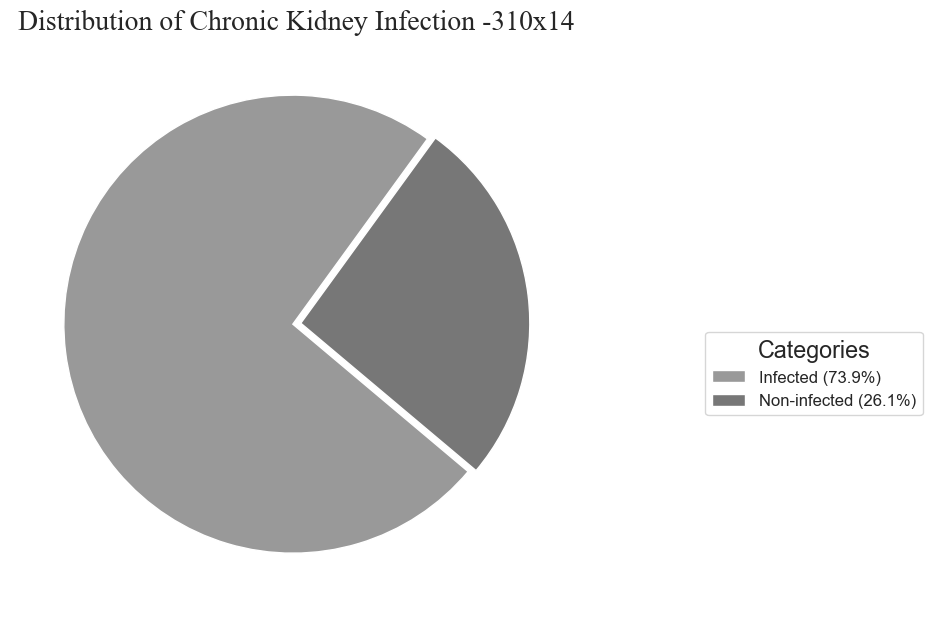

In [328]:
Keyword = [229, 81]
Value = ['Infected', 'Non-infected']
Explode = [0.015, 0.02]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))

Colors_list = ['#999999',  '#777777' ] 

plt.pie(Keyword, explode=Explode, startangle=54, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
    
plt.legend(legend_labels, title="Categories", loc="upper left", bbox_to_anchor=(1.2, 0.5), fontsize=12, ncol=1)
    
plt.title("Distribution of Chronic Kidney Infection -310x14", fontname='Times New Roman', fontsize=20)
    
plt.tight_layout()

plt.savefig("Distribution_of_Chronic_Kidney_Infection_310x14.png", dpi=300, bbox_inches='tight')

plt.show()

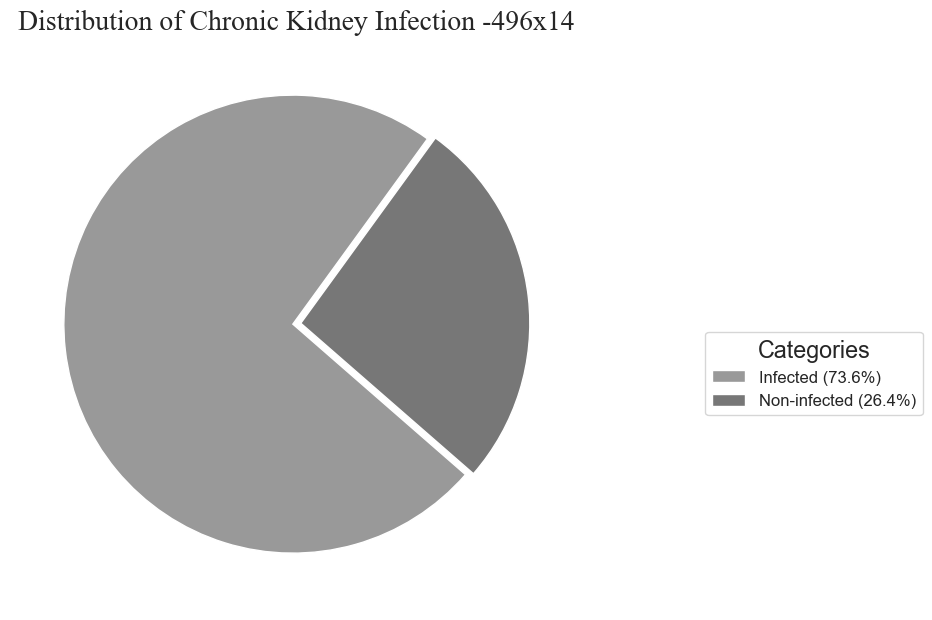

In [329]:
Keyword = [365, 131]
Value = ['Infected', 'Non-infected']
Explode = [0.015, 0.02]  

total = sum(Keyword)
percentages = [round((K / total) * 100, 1) for K in Keyword]

legend_labels = [f"{label} ({percent}%)" for label, percent in zip(Value, percentages)]

plt.figure(figsize=(10, 10))

Colors_list = ['#999999',  '#777777' ] 

plt.pie(Keyword, explode=Explode, startangle=54, textprops={'fontsize': 12}, colors=Colors_list, pctdistance=0.85)
    
plt.legend(legend_labels, title="Categories", loc="upper left", bbox_to_anchor=(1.2, 0.5), fontsize=12, ncol=1)
    
plt.title("Distribution of Chronic Kidney Infection -496x14", fontname='Times New Roman', fontsize=20)
    
plt.tight_layout()

plt.savefig("Distribution_of_Chronic_Kidney_Infection_496x14.png", dpi=300, bbox_inches='tight')

plt.show()

In [330]:
infection_by_gender_no_null = FinalDataFrameNoNull.groupby(['Sex', 'Chronic Kidney Infection']).size().unstack(fill_value=0)
print("Infection distribution by gender (No null frame):")
print(infection_by_gender_no_null)

Infection distribution by gender (No null frame):
Chronic Kidney Infection   0  \
Sex                            
0                         33   
1                         48   

Chronic Kidney Infection    1  
Sex                            
0                         135  
1                          94  


In [331]:
infection_by_gender_with_null = FinalDataFrameWithNull.groupby(['Sex', 'Chronic Kidney Infection']).size().unstack(fill_value=0)
print("Infection distribution by gender (With null frame):")
print(infection_by_gender_with_null)

Infection distribution by gender (With null frame):
Chronic Kidney Infection   0  \
Sex                            
0                         50   
1                         81   

Chronic Kidney Infection    1  
Sex                            
0                         205  
1                         160  


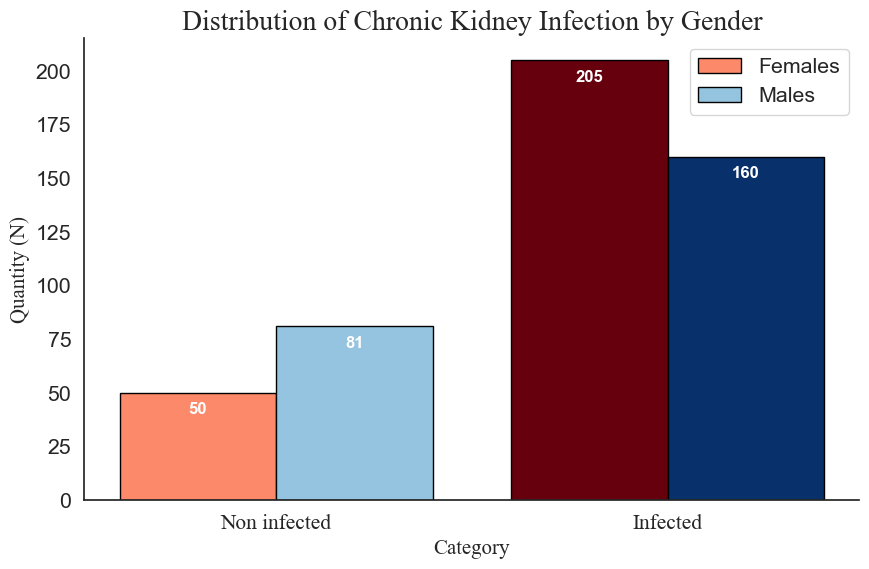

In [332]:

categories = ['Non infected females', 'Infected females', 'Non infected males', 'Infected males']
females = [50, 205]  
males = [81, 160]  

x = np.arange(2) 

female_colors = plt.cm.Reds(np.linspace(0.4, 1, 2)) 
male_colors = plt.cm.Blues(np.linspace(0.4, 1, 2))

bar_width = 0.4  

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, females, bar_width, color=female_colors, edgecolor="black", label="Females")
plt.bar(x + bar_width/2, males, bar_width, color=male_colors, edgecolor="black", label="Males")

for i in range(2):
    plt.text(x[i] - bar_width/2, females[i] - 10, f"{females[i]}", ha='center', fontsize=12, fontweight='bold', color='white')
    plt.text(x[i] + bar_width/2, males[i] - 10 , f"{males[i]}", ha='center', fontsize=12, fontweight='bold', color='white')

plt.title("Distribution of Chronic Kidney Infection by Gender", fontsize=20 ,fontname='Times New Roman')
plt.xlabel("Category", fontsize = 15 ,fontname='Times New Roman')
plt.ylabel("Quantity (N)", fontsize = 15,fontname='Times New Roman')
plt.xticks(x, ['Non infected', 'Infected'],fontname='Times New Roman')  # Group labels
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("Distribution_of_Chronic_Kidney_Infectio_as_Bar_plot_496x14.png", dpi=300)
plt.show()

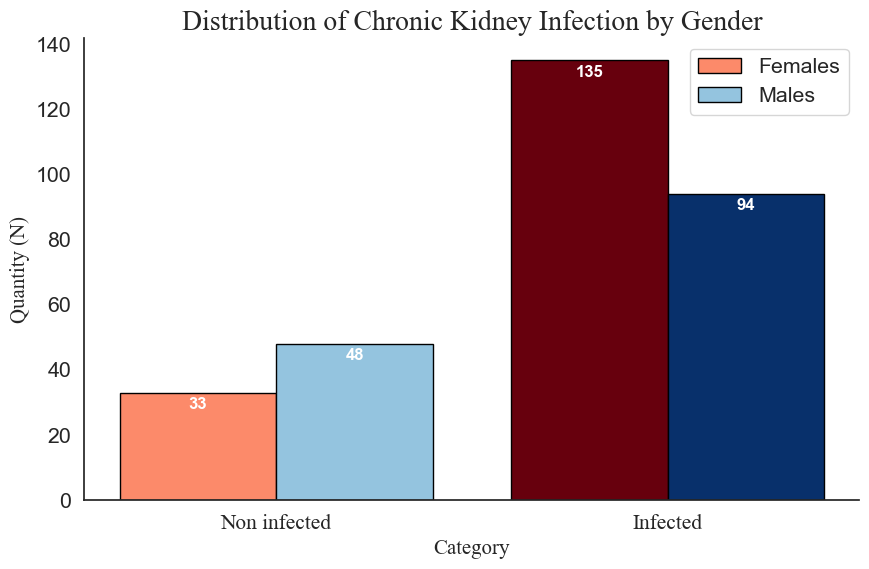

In [333]:
categories = ['Non infected females', 'Infected females', 'Non infected males', 'Infected males']
females = [33, 135]  
males = [48, 94] 

x = np.arange(2)

female_colors = plt.cm.Reds(np.linspace(0.4, 1, 2))
male_colors = plt.cm.Blues(np.linspace(0.4, 1, 2)) 

bar_width = 0.4  

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, females, bar_width, color=female_colors, edgecolor="black", label="Females")
plt.bar(x + bar_width/2, males, bar_width, color=male_colors, edgecolor="black", label="Males")

for i in range(2):
    plt.text(x[i] - bar_width/2, females[i] - 5, f"{females[i]}", ha='center', fontsize=12, fontweight='bold', color='white')
    plt.text(x[i] + bar_width/2, males[i] - 5, f"{males[i]}", ha='center', fontsize=12, fontweight='bold', color='white')

plt.title("Distribution of Chronic Kidney Infection by Gender", fontsize=20 ,fontname='Times New Roman')
plt.xlabel("Category", fontsize = 15 ,fontname='Times New Roman')
plt.ylabel("Quantity (N)", fontsize = 15,fontname='Times New Roman')
plt.xticks(x, ['Non infected', 'Infected'],fontname='Times New Roman')  # Group labels
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("Distribution_of_Chronic_Kidney_Infectio_as_Bar_plot_310x14.png", dpi=300)
plt.show()

In [334]:
FinalDataFrameNoNullExport = FinalDataFrameNoNull.head()
dfi.export(FinalDataFrameNoNullExport, "NoNullDataFrame.png", table_conversion="matplotlib", dpi=300)

In [335]:
FinalDataFrameWithNullExport = FinalDataFrameWithNull.head()
dfi.export(FinalDataFrameWithNullExport, "WithNullDataFrame.png", table_conversion="matplotlib", dpi=300)

In [336]:
ShapeWithNull = FullDataFrame.shape
ShapeNoNull =  ModifiedDataFrame.shape
print("No Null: " + str(ShapeNoNull))
print("With Null: " + str(ShapeWithNull))

No Null: (310, 14)
With Null: (496, 14)


## Scenario _1 Model:

### KNN model: 

### Data splitting: 

In [340]:
FeatureColumnsModel1 = FinalDataFrameNoNull.iloc[:, 1:13]
TargetColumnModel1 = FinalDataFrameNoNull.iloc[:, 13]
X_trainModel1, X_testModel1, Y_trainModel1, Y_testModel1 = train_test_split(FeatureColumnsModel1, TargetColumnModel1, test_size=0.2, random_state= 42)    

In [341]:
TargetColumnModel1 = FinalDataFrameNoNull['Chronic Kidney Infection']

### Data Scalling:

In [343]:
sc_X = StandardScaler()  
X_trainModel1 = sc_X.fit_transform(X_trainModel1)
X_testModel1 = sc_X.transform(X_testModel1)

### model importing and defining:

In [345]:
print("Len: " + str(math.sqrt(len(Y_testModel1))))
Model1 = KNeighborsClassifier(n_neighbors=15, p=3, metric="euclidean")
Model1.fit(X_trainModel1, Y_trainModel1.ravel())

Len: 7.874007874011811


C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\3679675099.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Model1.fit(X_trainModel1, Y_trainModel1.ravel())


KNeighborsClassifier(metric='euclidean', n_neighbors=15, p=3)

### Results predicting: 

In [347]:
Y_predictedModel1 = Model1.predict(X_testModel1)

### Model evaluation:

In [349]:
Matrix = confusion_matrix(Y_testModel1,Y_predictedModel1)
print(Matrix)

[[10  5]
 [ 4 43]]


### Model score: 

In [351]:
Score = f1_score(Y_testModel1, Y_predictedModel1)
print(f"Score: {Score * 100:.2f}%")

Score: 90.53%


### Model accuracy: 

In [353]:
AccuracyModel1 = accuracy_score(Y_testModel1, Y_predictedModel1)
print("Model one Accuracy: " + str((AccuracyModel1*100))+ "%")

Model one Accuracy: 85.48387096774194%


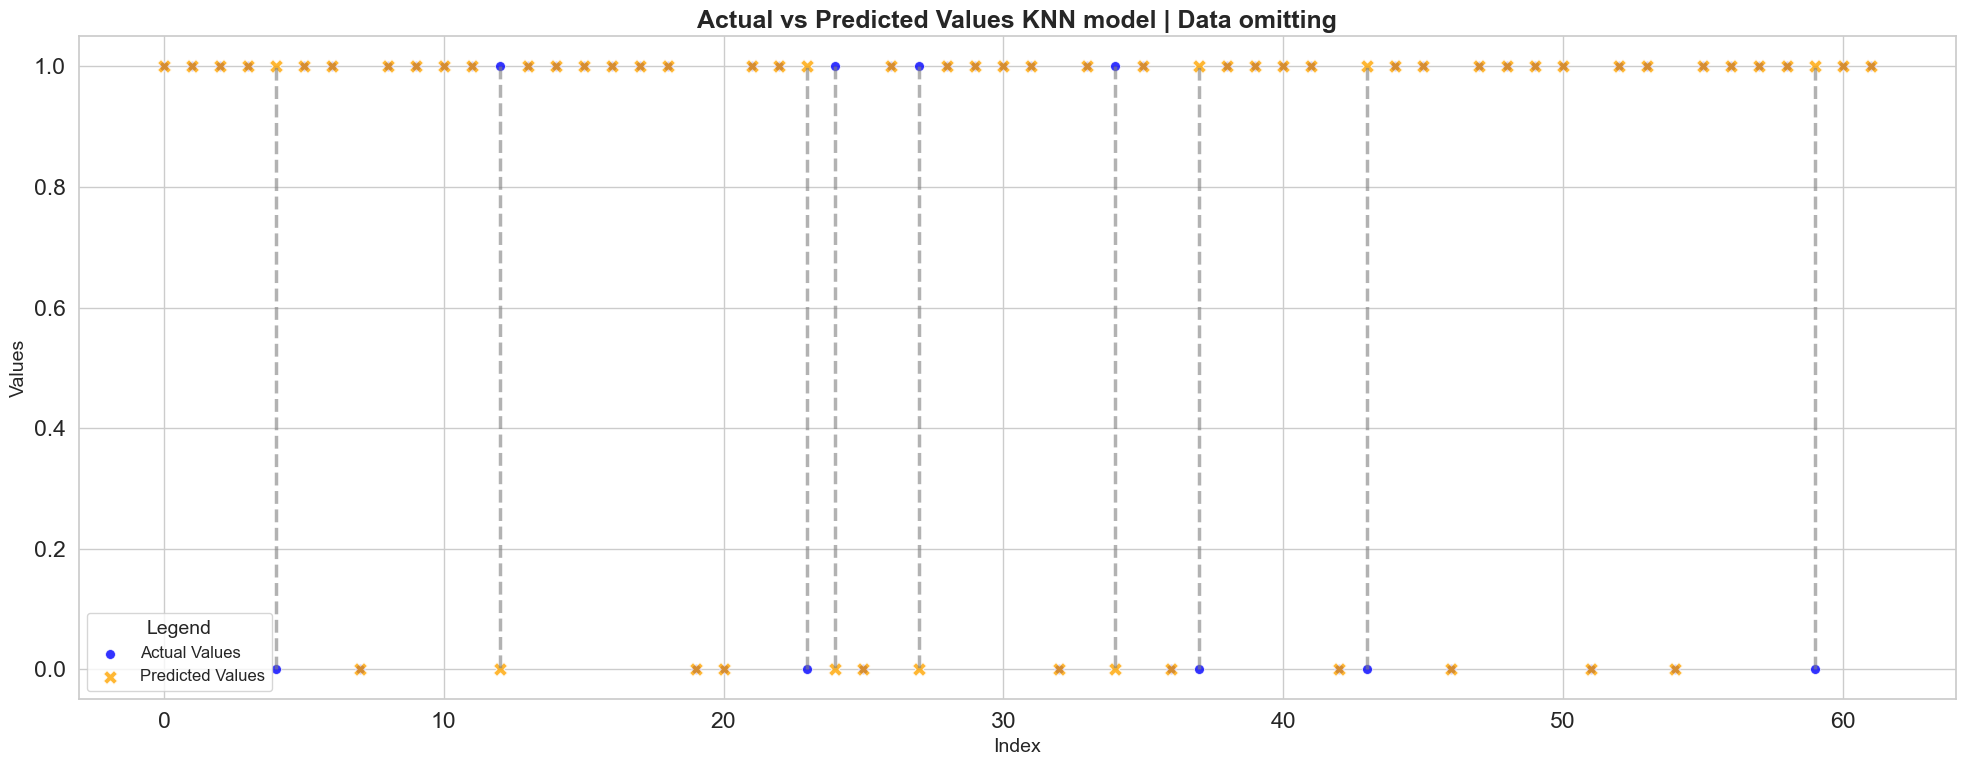

In [354]:
PlotingDataModel1 = pd.DataFrame({'Actual': Y_testModel1, 'Predicted': Y_predictedModel1}).reset_index(drop=True)

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.figure(figsize=(20, 8))
scatter = sns.scatterplot(x=PlotingDataModel1.index, y=PlotingDataModel1['Actual'], 
                          label="Actual Values", color="blue", s=50, marker="o", alpha=0.8)
sns.scatterplot(x=PlotingDataModel1.index, y=PlotingDataModel1['Predicted'], 
                label="Predicted Values", color="orange", s=100, marker="X", alpha=0.8)

for i in range(len(PlotingDataModel1)):
    plt.plot([PlotingDataModel1.index[i], PlotingDataModel1.index[i]], 
             [PlotingDataModel1['Actual'][i], PlotingDataModel1['Predicted'][i]], 
             color="gray", linestyle="--", alpha=0.6)

plt.title("Actual vs Predicted Values KNN model | Data omitting", fontsize=18, weight="bold")
plt.xlabel("Index", fontsize=14)
plt.ylabel("Values", fontsize=14)

plt.legend(loc="best", fontsize=12, title="Legend", title_fontsize=14, fancybox=True)

plt.tight_layout()
plt.savefig("Actual vs Predicted Values KNN model - Data omitting", dpi=300)

plt.show()

### Random forest:

In [356]:
FeatureColumnsModel = FinalDataFrameNoNull.iloc[:, 1:13]
TargetColumnModel = FinalDataFrameNoNull.iloc[:, 13]

In [357]:
X_trainModel, X_testModel, Y_trainModel, Y_testModel = train_test_split(FeatureColumnsModel, TargetColumnModel, test_size=0.2, random_state=42)

### Data Scalling:

In [359]:
sc_X = StandardScaler()
X_trainModel = sc_X.fit_transform(X_trainModel) 
X_testModel = sc_X.transform(X_testModel) 

### model importing and defining:

In [361]:
Model = RandomForestClassifier(n_estimators=100, random_state=42)  
Model.fit(X_trainModel, Y_trainModel.ravel()) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\992524620.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Model.fit(X_trainModel, Y_trainModel.ravel())


RandomForestClassifier(random_state=42)

### Results predicting:

In [363]:
Y_predictedModel = Model.predict(X_testModel)

### Model evaluation:

In [365]:
Matrix = confusion_matrix(Y_testModel, Y_predictedModel)
Accuracy = accuracy_score(Y_testModel, Y_predictedModel)
                          
print("Confusion matrix:\n", Matrix)
print(f"Accuracy: {Accuracy * 100:.2f}%")

Confusion matrix:
 [[14  1]
 [ 0 47]]
Accuracy: 98.39%


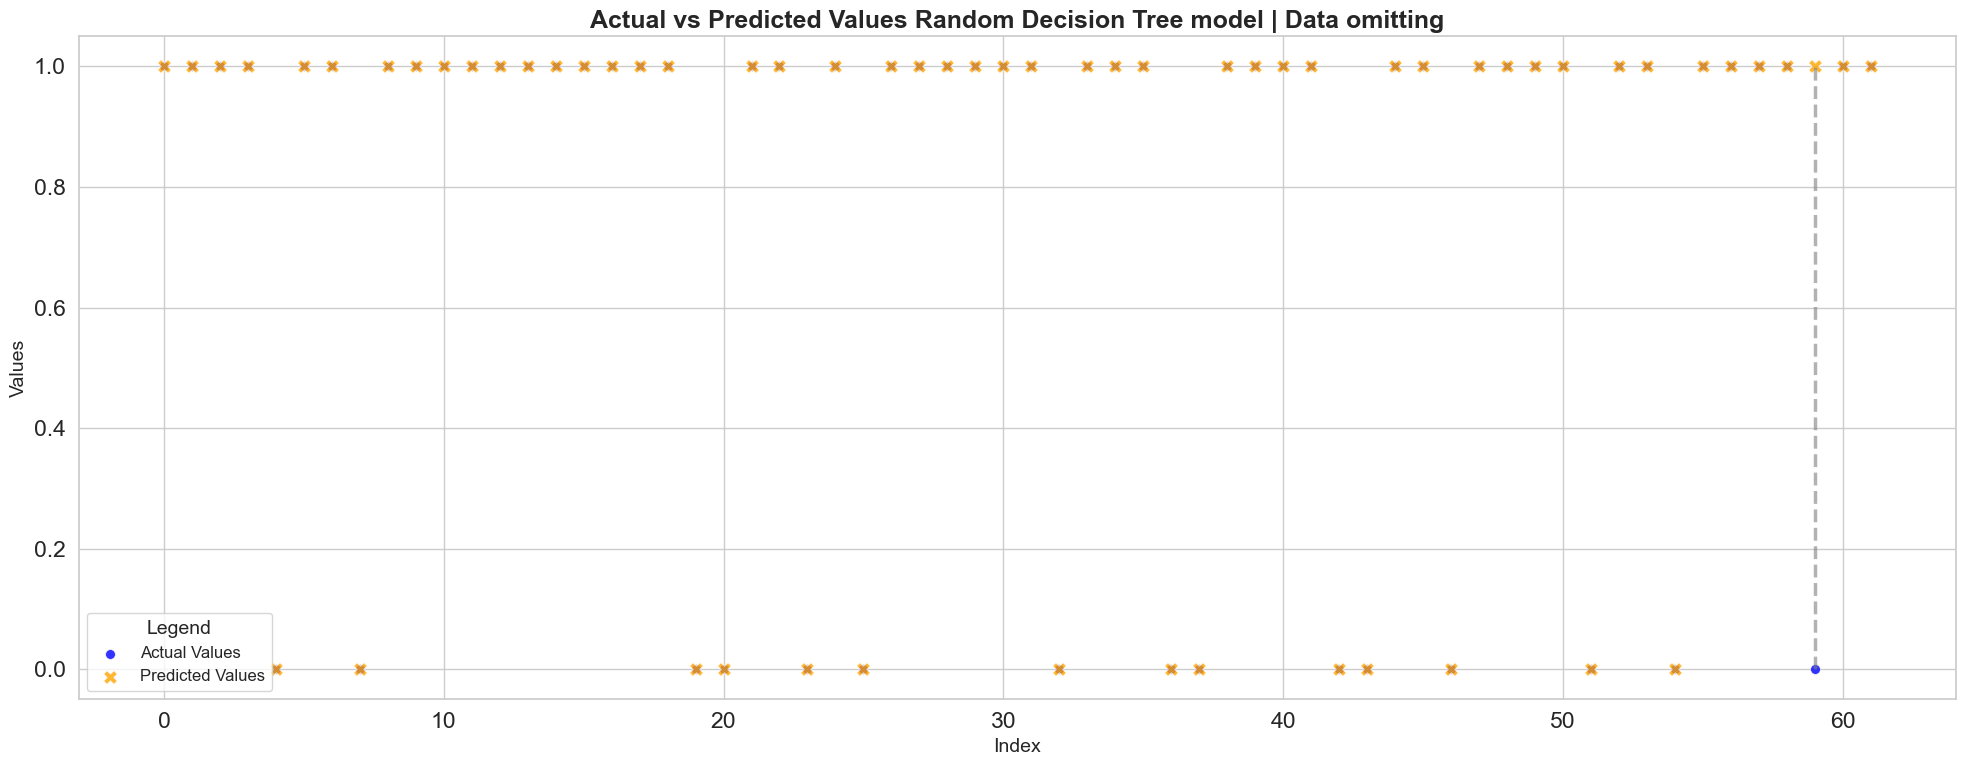

In [366]:
PlotingDataModel = pd.DataFrame({'Actual': Y_testModel, 'Predicted': Y_predictedModel}).reset_index(drop=True)

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.figure(figsize=(20, 8))
scatter = sns.scatterplot(x=PlotingDataModel.index, y=PlotingDataModel['Actual'], 
                          label="Actual Values", color="blue", s=50, marker="o", alpha=0.8)
sns.scatterplot(x=PlotingDataModel.index, y=PlotingDataModel['Predicted'], 
                label="Predicted Values", color="orange", s=100, marker="X", alpha=0.8)

for i in range(len(PlotingDataModel)):
    plt.plot([PlotingDataModel.index[i], PlotingDataModel.index[i]], 
             [PlotingDataModel['Actual'][i], PlotingDataModel['Predicted'][i]], 
             color="gray", linestyle="--", alpha=0.6)

plt.title("Actual vs Predicted Values Random Decision Tree model | Data omitting", fontsize=18, weight="bold")
plt.xlabel("Index", fontsize=14)
plt.ylabel("Values", fontsize=14)

plt.legend(loc="best", fontsize=12, title="Legend", title_fontsize=14, fancybox=True)
plt.tight_layout()
plt.savefig("Actual vs Predicted Values Random Decision Tree model - Data omitting", dpi=300)

plt.show()

## Scenario _2 Model:

### KNN model:

### Data splitting: 

In [370]:
FeatureColumnsModel2 = FinalDataFrameWithNull.iloc[:, 1:13]
TargetColumnModel2 = FinalDataFrameWithNull.iloc[:, 13]
X_trainModel2, X_testModel2, Y_trainModel2, Y_testModel2 = train_test_split(FeatureColumnsModel2, TargetColumnModel2, test_size=0.2, random_state= 42)    

In [371]:
FinalDataFrameWithNull.isna().sum()

ID                             0
Sex                            0
Marital status                 0
Creatinine (mg/dL)             0
Creatinine status              0
Fasting Blood Sugar (mg/dL)    0
FBS status                     0
Hb_A1c (mg/dL)                 0
Hb_A1c status                  0
HDL (mg/dL)                    0
HDL status                     0
LDL (mg/dL)                    0
LDL status                     0
Chronic Kidney Infection       0
dtype: int64

### Data Scalling:

In [373]:
sc_X = StandardScaler()  
X_trainModel2 = sc_X.fit_transform(X_trainModel2)  
X_testModel2 = sc_X.transform(X_testModel2)

### Model importing and defining:

In [375]:
math.sqrt(len(Y_testModel2))

Model2 = KNeighborsClassifier(n_neighbors = 15, p = 3 , metric = 'euclidean')
Model2.fit(X_trainModel2, Y_trainModel2)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, p=3)

### Results predicting: 

In [377]:
Y_predictedModel2= Model2.predict(X_testModel2)

### Model evaluation:

In [379]:
Matrix = confusion_matrix(Y_testModel2,Y_predictedModel2)
print(Matrix)

[[19  6]
 [ 1 74]]


### Model score: 

In [381]:
Score = f1_score(Y_testModel2, Y_predictedModel2)
print(f"Score: {Score * 100:.2f}%")

Score: 95.48%


### Model accuracy: 

In [383]:
Accuracy = accuracy_score(Y_testModel2, Y_predictedModel2)
print("Model two Accuracy: " + str((Accuracy*100))+ "%")

Model two Accuracy: 93.0%


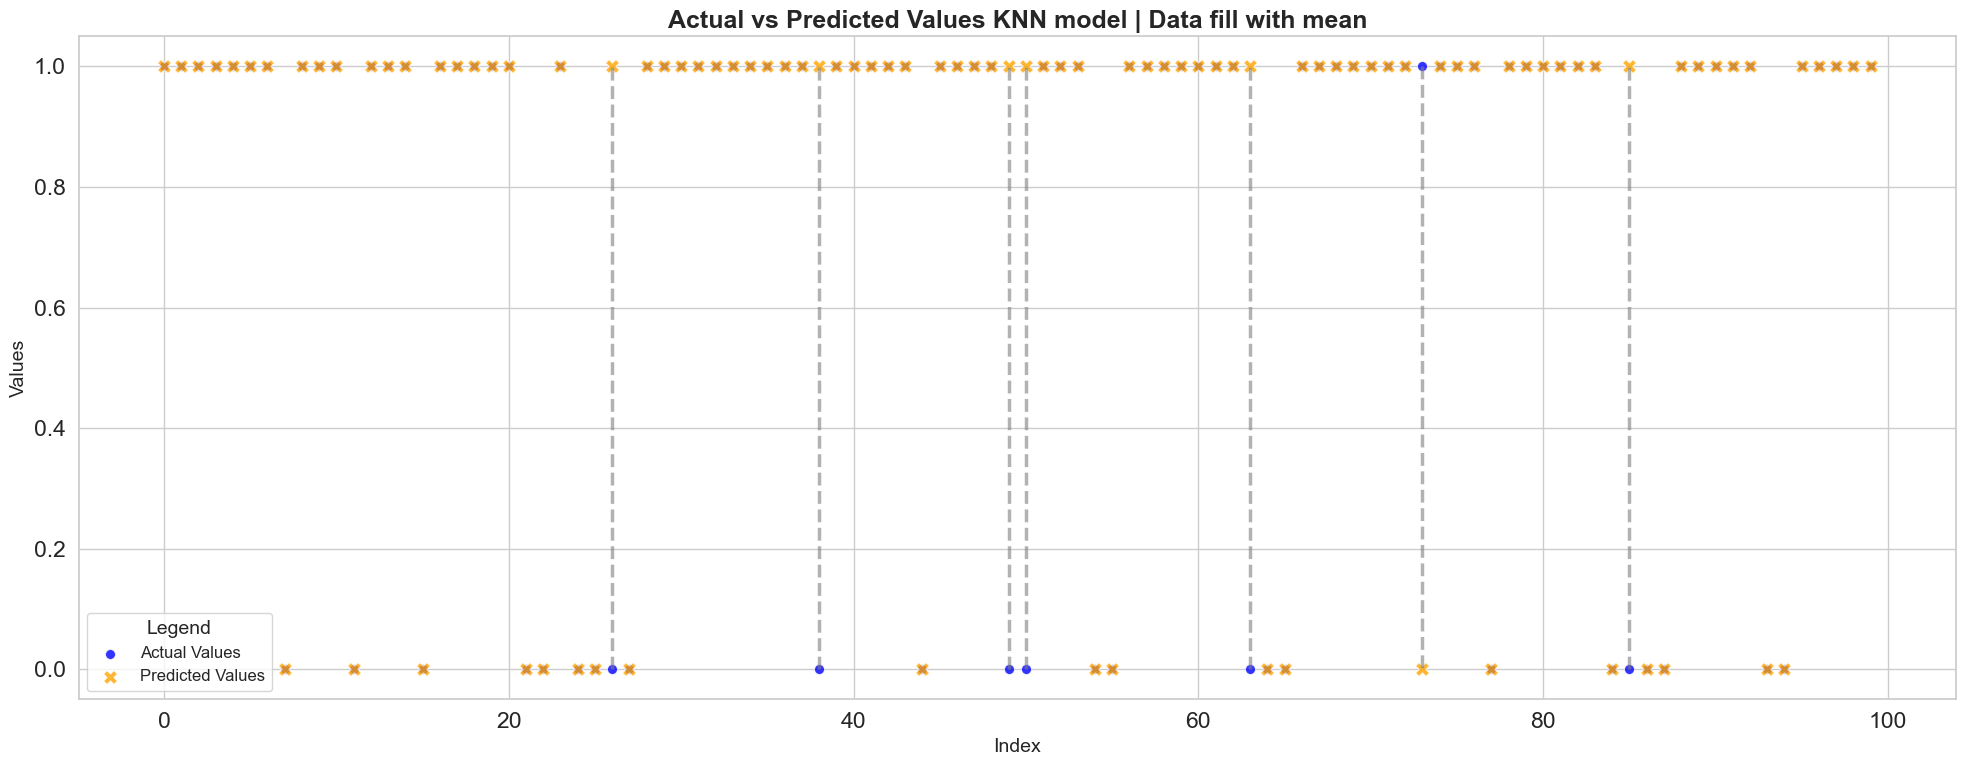

In [384]:
PlotingDataModel2 = pd.DataFrame({'Actual': Y_testModel2, 'Predicted': Y_predictedModel2}).reset_index(drop=True)

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.figure(figsize=(20, 8))
scatter = sns.scatterplot(x=PlotingDataModel2.index, y=PlotingDataModel2['Actual'], 
                          label="Actual Values", color="blue", s=50, marker="o", alpha=0.8)
sns.scatterplot(x=PlotingDataModel2.index, y=PlotingDataModel2['Predicted'], 
                label="Predicted Values", color="orange", s=100, marker="X", alpha=0.8)

for i in range(len(PlotingDataModel2)):
    plt.plot([PlotingDataModel2.index[i], PlotingDataModel2.index[i]], 
             [PlotingDataModel2['Actual'][i], PlotingDataModel2['Predicted'][i]], 
             color="gray", linestyle="--", alpha=0.6)

plt.title("Actual vs Predicted Values KNN model | Data fill with mean", fontsize=18, weight="bold")
plt.xlabel("Index", fontsize=14)
plt.ylabel("Values", fontsize=14)

plt.legend(loc="best", fontsize=12, title="Legend", title_fontsize=14, fancybox=True)
plt.tight_layout()
plt.savefig("Actual vs Predicted Values KNN model - Data fill with mean")

plt.show()

### Random forest:

### Data splitting:

In [387]:
FeatureColumnsModel2 = FinalDataFrameWithNull.iloc[:, 1:13]
TargetColumnModel2 = FinalDataFrameWithNull.iloc[:, 13]
X_trainModel, X_testModel, Y_trainModel, Y_testModel = train_test_split(FeatureColumnsModel, TargetColumnModel, test_size=0.2, random_state=42)

### Data Scalling:

In [389]:
sc_X = StandardScaler()
X_trainModel = sc_X.fit_transform(X_trainModel) 
X_testModel = sc_X.transform(X_testModel) 

### Model importing and defining:

In [391]:
Model = RandomForestClassifier(n_estimators=100, random_state=42)  
Model.fit(X_trainModel, Y_trainModel.ravel()) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_20636\992524620.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  Model.fit(X_trainModel, Y_trainModel.ravel())


RandomForestClassifier(random_state=42)

### Results predicting:

In [393]:
Y_predictedModel = Model.predict(X_testModel)

### Model evaluation:

In [395]:
Matrix = confusion_matrix(Y_testModel, Y_predictedModel)
Accuracy = accuracy_score(Y_testModel, Y_predictedModel)
                          
print("Confusion matrix:\n", Matrix)
print(f"Accuracy: {Accuracy * 100:.2f}%")

Confusion matrix:
 [[14  1]
 [ 0 47]]
Accuracy: 98.39%


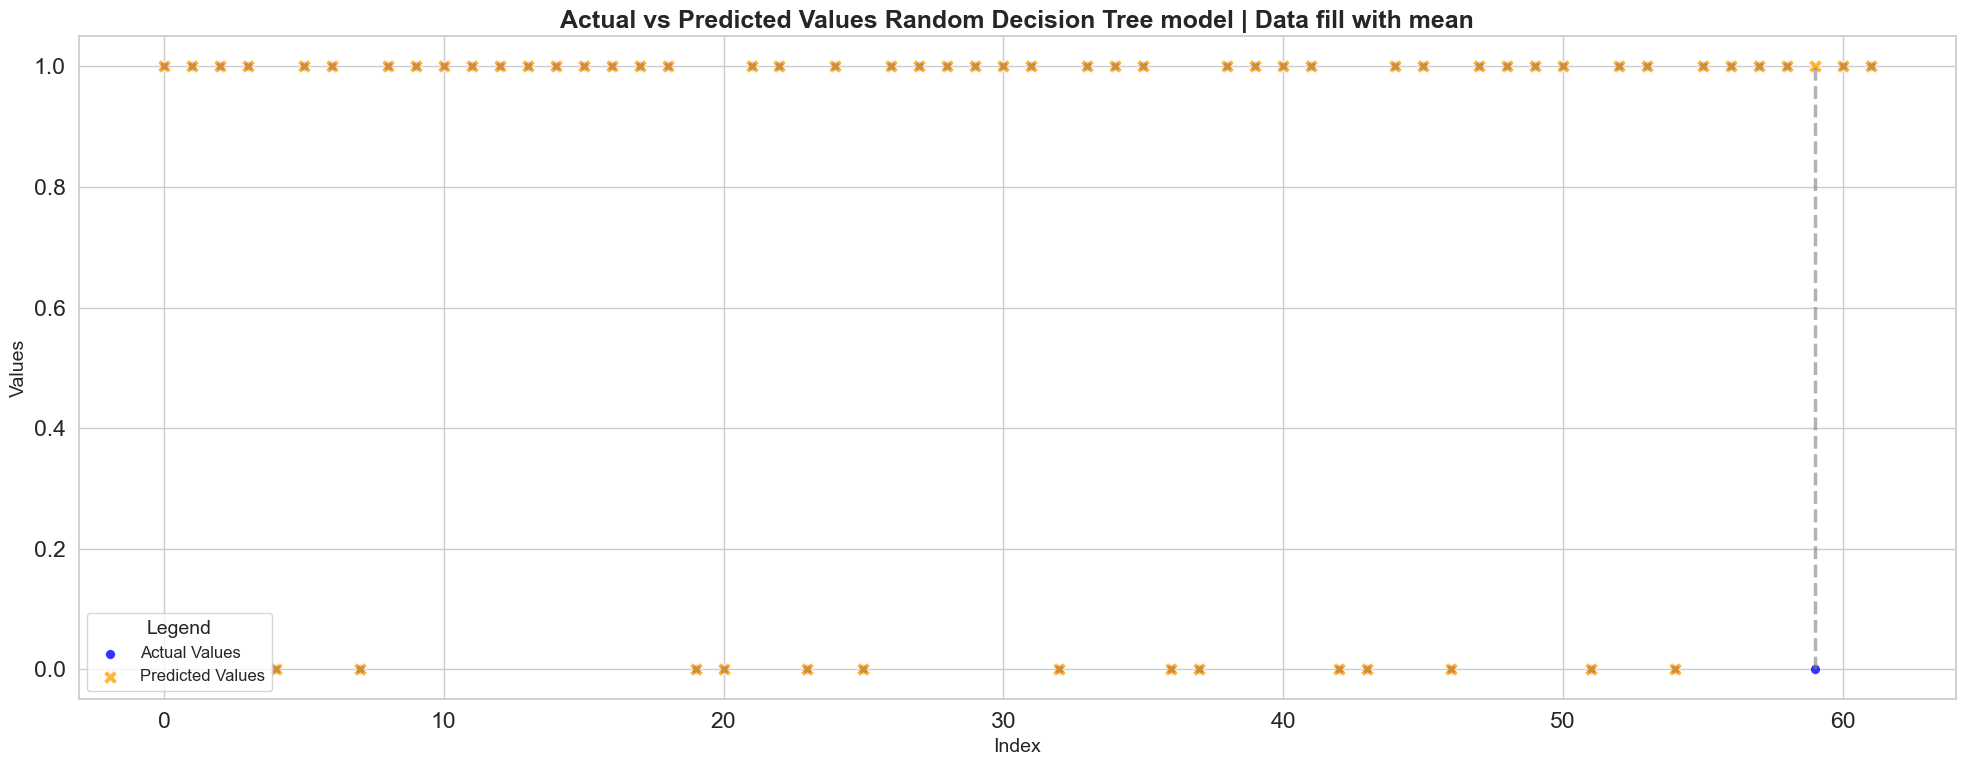

In [396]:
PlotingDataModel = pd.DataFrame({'Actual': Y_testModel, 'Predicted': Y_predictedModel}).reset_index(drop=True)

sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.figure(figsize=(20, 8))
scatter = sns.scatterplot(x=PlotingDataModel.index, y=PlotingDataModel['Actual'], 
                          label="Actual Values", color="blue", s=50, marker="o", alpha=0.8)
sns.scatterplot(x=PlotingDataModel.index, y=PlotingDataModel['Predicted'], 
                label="Predicted Values", color="orange", s=100, marker="X", alpha=0.8)

for i in range(len(PlotingDataModel)):
    plt.plot([PlotingDataModel.index[i], PlotingDataModel.index[i]], 
             [PlotingDataModel['Actual'][i], PlotingDataModel['Predicted'][i]], 
             color="gray", linestyle="--", alpha=0.6)

plt.title("Actual vs Predicted Values Random Decision Tree model | Data fill with mean", fontsize=18, weight="bold")
plt.xlabel("Index", fontsize=14)
plt.ylabel("Values", fontsize=14)

plt.legend(loc="best", fontsize=12, title="Legend", title_fontsize=14, fancybox=True)
plt.tight_layout()
plt.savefig("Actual vs Predicted Values Random Decision Tree model - Data fill with mean")

plt.show()

In [397]:
FinalDataFrameWithNull['Sex'].value_counts(dropna=False)

Sex
0    255
1    241
Name: count, dtype: int64

In [398]:
FinalDataFrameNoNull['Sex'].value_counts(dropna=False)

Sex
0    168
1    142
Name: count, dtype: int64

In [399]:
print("Value counts for 'Creatinine status' sorted by gender:")
print(FinalDataFrameWithNull.groupby("Sex")["Creatinine status"].value_counts(dropna=False))

Value counts for 'Creatinine status' sorted by gender:
Sex  Creatinine status
0    3                    112
     2                    111
     1                     32
1    2                    105
     1                     92
     3                     44
Name: count, dtype: int64


In [400]:
print("Value counts for 'Creatinine status' sorted by gender:")
print(FinalDataFrameNoNull.groupby("Sex")["Creatinine status"].value_counts(dropna=False))

Value counts for 'Creatinine status' sorted by gender:
Sex  Creatinine status
0    3                    78
     2                    67
     1                    23
1    1                    59
     2                    55
     3                    28
Name: count, dtype: int64


In [401]:
print("Value counts for 'FBS status' sorted by gender:")
print(FinalDataFrameWithNull.groupby("Sex")["FBS status"].value_counts(dropna=False))

Value counts for 'FBS status' sorted by gender:
Sex  FBS status
0    3             220
     2              29
     1               6
1    3             203
     2              32
     1               6
Name: count, dtype: int64


In [402]:
print("Value counts for 'FBS status' sorted by gender:")
print(FinalDataFrameNoNull.groupby("Sex")["FBS status"].value_counts(dropna=False))

Value counts for 'FBS status' sorted by gender:
Sex  FBS status
0    3             142
     2              22
     1               4
1    3             122
     2              16
     1               4
Name: count, dtype: int64


In [403]:
print("Value counts for 'Hb_A1c status' sorted by gender:")
print(FinalDataFrameWithNull.groupby("Sex")["Hb_A1c status"].value_counts(dropna=False))

Value counts for 'Hb_A1c status' sorted by gender:
Sex  Hb_A1c status
0    2                133
     3                122
1    3                124
     2                117
Name: count, dtype: int64


In [404]:
print("Value counts for 'Hb_A1c status' sorted by gender:")
print(FinalDataFrameNoNull.groupby("Sex")["Hb_A1c status"].value_counts(dropna=False))

Value counts for 'Hb_A1c status' sorted by gender:
Sex  Hb_A1c status
0    3                90
     2                78
1    3                75
     2                67
Name: count, dtype: int64


In [405]:
print("Value counts for 'LDL status' sorted by gender:")
print(FinalDataFrameWithNull.groupby("Sex")["LDL status"].value_counts(dropna=False))

Value counts for 'LDL status' sorted by gender:
Sex  LDL status
0    2             255
1    2             239
     3               2
Name: count, dtype: int64


In [406]:
print("Value counts for 'LDL status' sorted by gender:")
print(FinalDataFrameNoNull.groupby("Sex")["LDL status"].value_counts(dropna=False))

Value counts for 'LDL status' sorted by gender:
Sex  LDL status
0    2             168
1    2             142
Name: count, dtype: int64


In [407]:
print("Value counts for 'HDL status' sorted by gender:")
print(FinalDataFrameWithNull.groupby("Sex")["HDL status"].value_counts(dropna=False))

Value counts for 'HDL status' sorted by gender:
Sex  HDL status
0    2             227
     1              27
     3               1
1    2             182
     3              38
     1              21
Name: count, dtype: int64


In [408]:
print("Value counts for 'HDL status' sorted by gender:")
print(FinalDataFrameNoNull.groupby("Sex")["HDL status"].value_counts(dropna=False))

Value counts for 'HDL status' sorted by gender:
Sex  HDL status
0    2             151
     1              17
1    2             109
     3              24
     1               9
Name: count, dtype: int64
